In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
dataset_path = 'C:\\Users\\DWQE\\LinuxFiles\\MachineLearning2020\\PersonalProject\\Dataset\\'
df = pd.read_csv(dataset_path + 'train.csv')

def date2age(df):
    year = int(df['birth_date'].split('/')[-1])
    return 2020 - (year + 1900 if year != 0 else year + 2000)

def level2int(df, attribute):
    levels = {'Low': 1, 'Medium': 2, 'High':3}
    return levels[df[attribute]]

df['birth_date'] = df.apply(date2age, axis=1)
df['work_rate_att'] = df.apply(level2int, args=('work_rate_att',), axis = 1)
df['work_rate_def'] = df.apply(level2int, args=('work_rate_def',), axis = 1)

df_ngk = df.loc[df['rw'] .notnull()].dropna(axis=1)
df_ngk = df_ngk.drop(['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'],axis=1)
df_ngk.to_csv(dataset_path + 'train_ngk.csv', index=False)
ngk_cor = df_ngk.corr()
ngk_headers = list(df_ngk.columns.values)

df_gk = df.loc[df['gk'] .notnull()].dropna(axis=1)
df_gk = df_gk.drop(['skill_moves', 'work_rate_att','work_rate_def'],axis=1)
df_gk.to_csv(dataset_path + 'train_gk.csv', index=False)
gk_cor = df_gk.corr()
gk_headers = list(df_gk.columns.values)

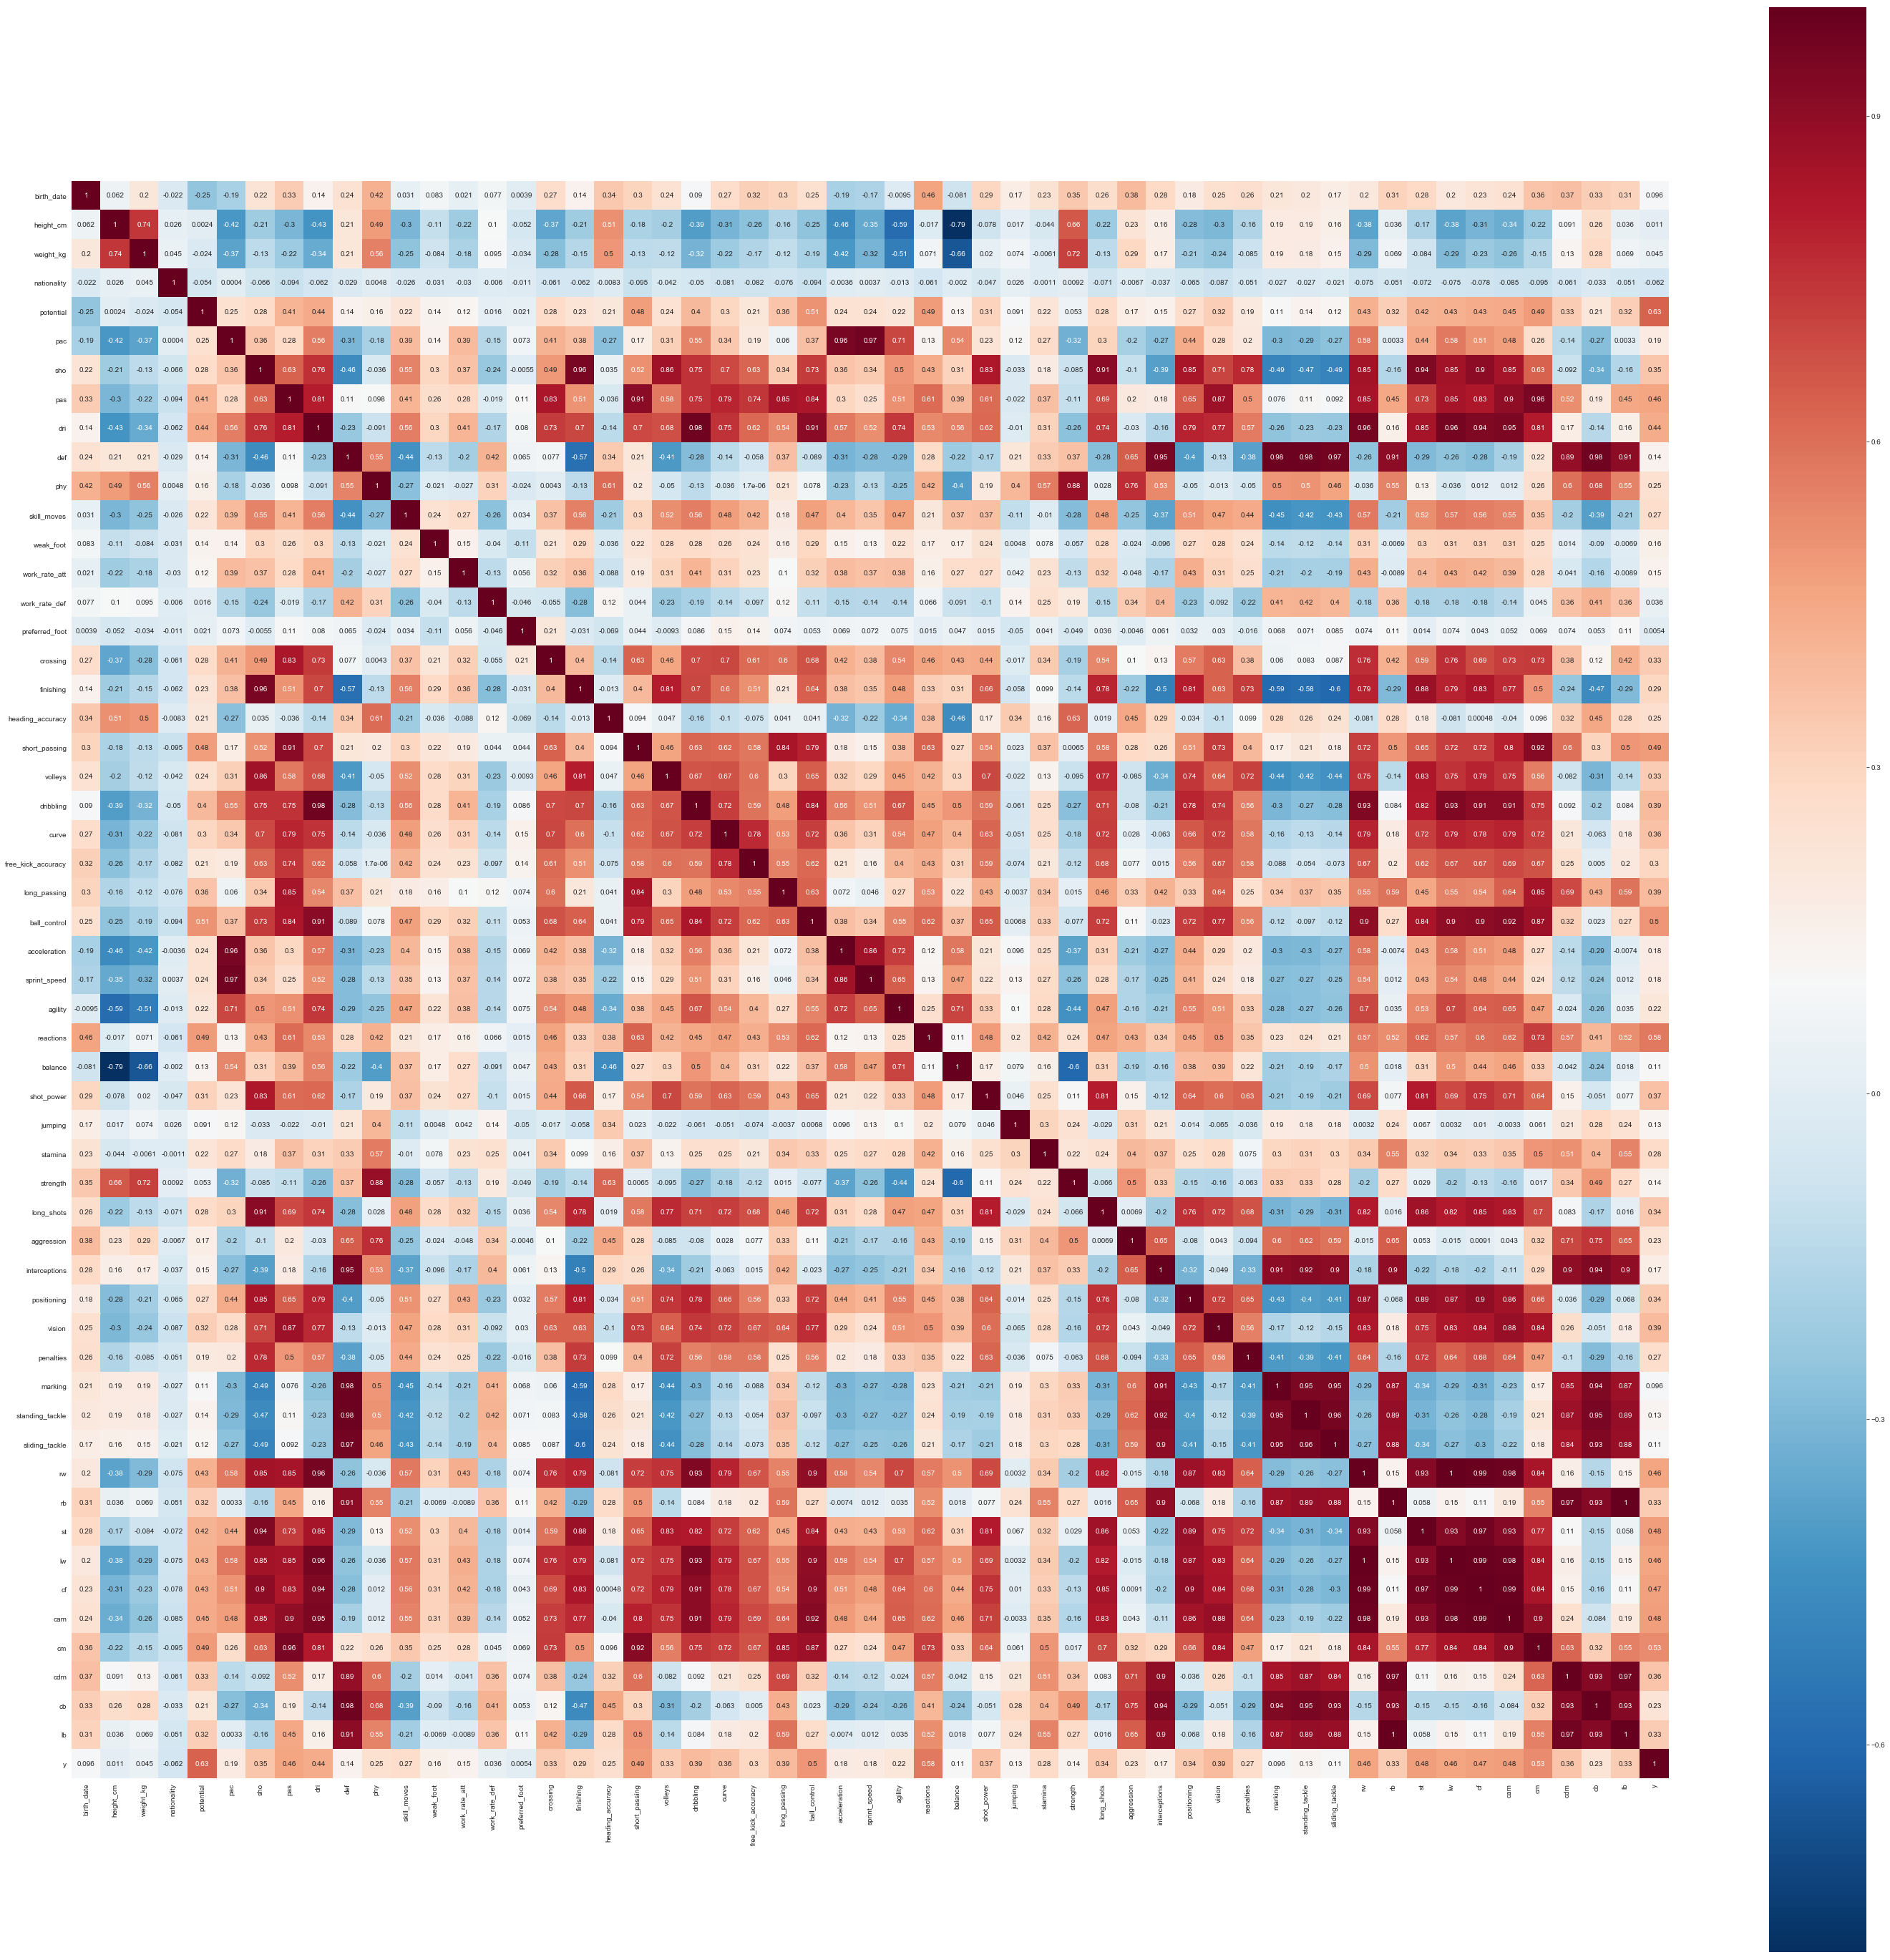

In [29]:
plt.subplots(figsize=(50,50))
sns.heatmap(ngk_cor, xticklabels= True, yticklabels= True,annot=True, vmax=1, square=True, cmap="RdBu_r")
plt.savefig(dataset_path + 'ngk\\ngk_corr.jpg', dpi=100)

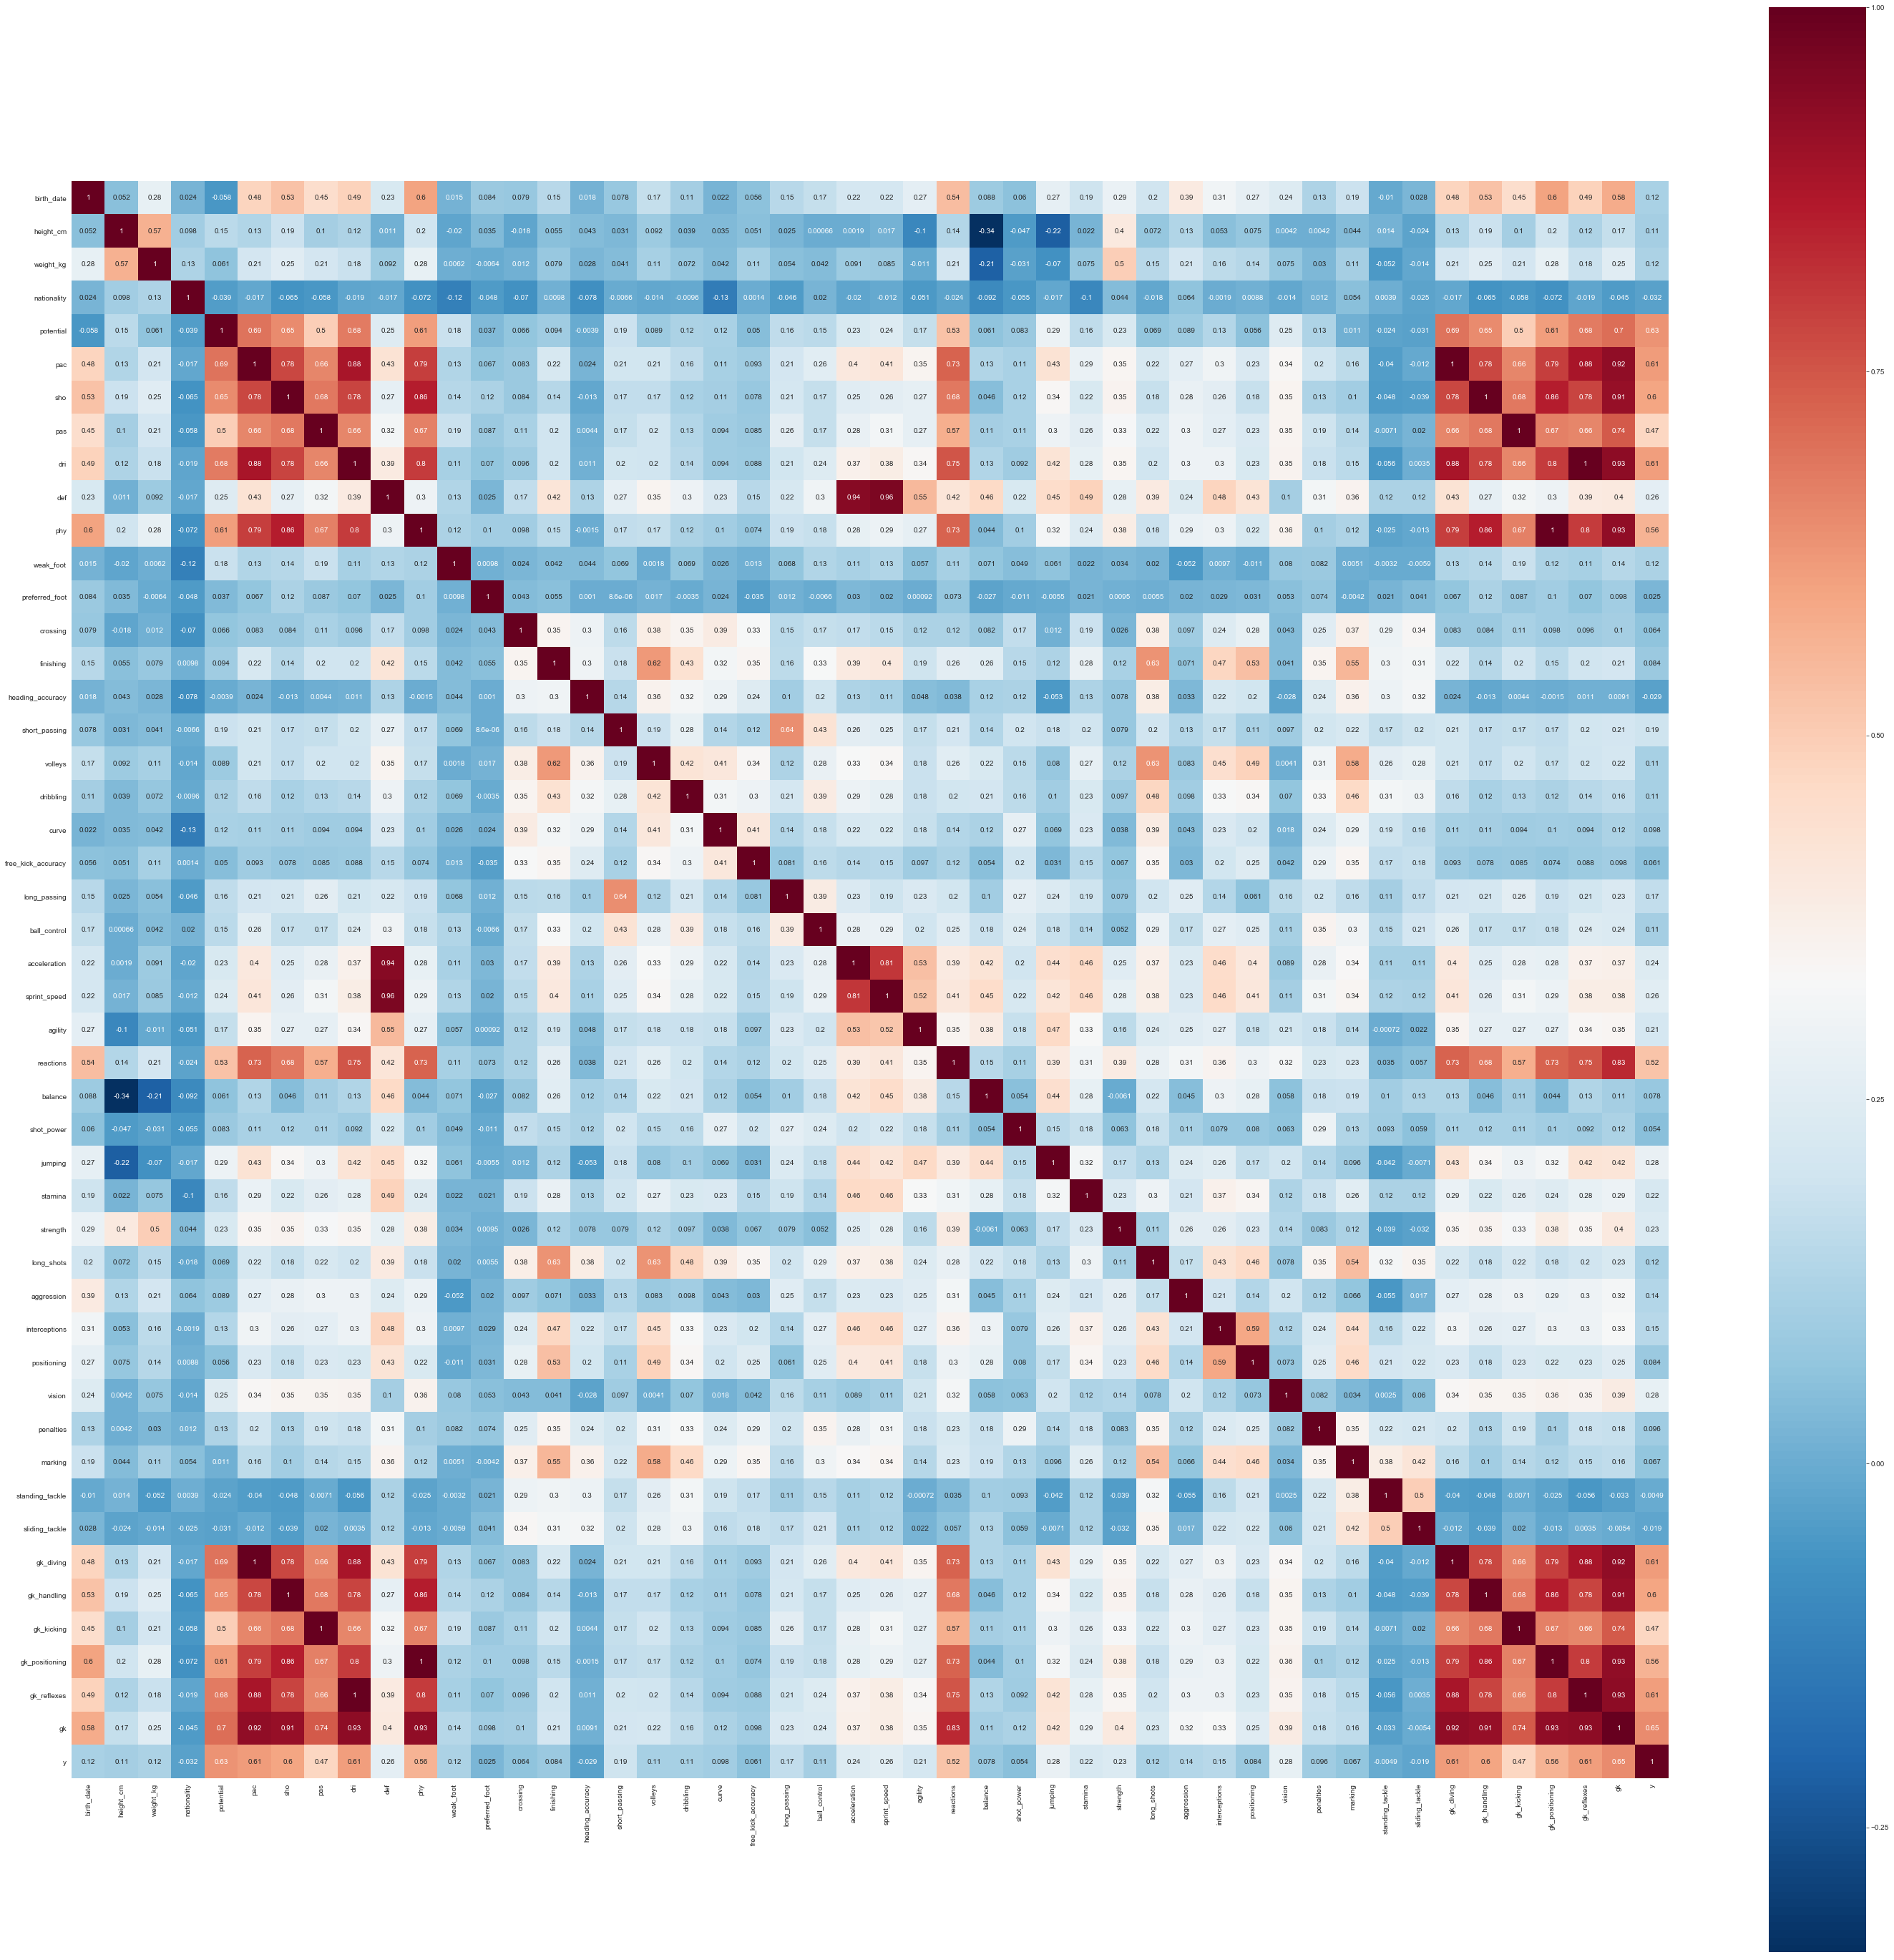

In [30]:
plt.subplots(figsize=(50,50))
sns.heatmap(gk_cor, xticklabels= True, yticklabels= True,annot=True, vmax=1, square=True, cmap="RdBu_r")
plt.savefig(dataset_path + 'gk\\gk_corr.jpg', dpi=100)
plt.show()

In [31]:
def dataframe_distributions(dateframe, subpath):
    dataframe_headers = list(dateframe.columns.values)
    import warnings
    warnings.filterwarnings("ignore")
    
    def col_distplot(col_name):
        plt.subplots(figsize=(20,10))
        sns.distplot(np.array(dateframe[col_name]))
        plt.title(col_name)
        plt.savefig(dataset_path + subpath +col_name + '.jpg', dpi=100)
        
    for cn in dataframe_headers:
        col_distplot(cn)

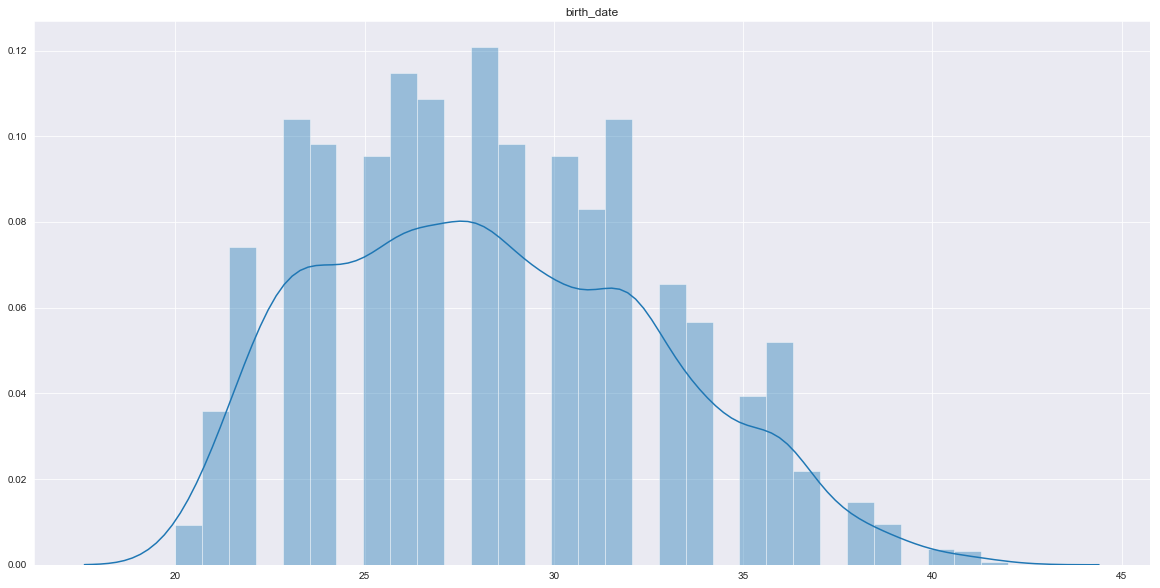

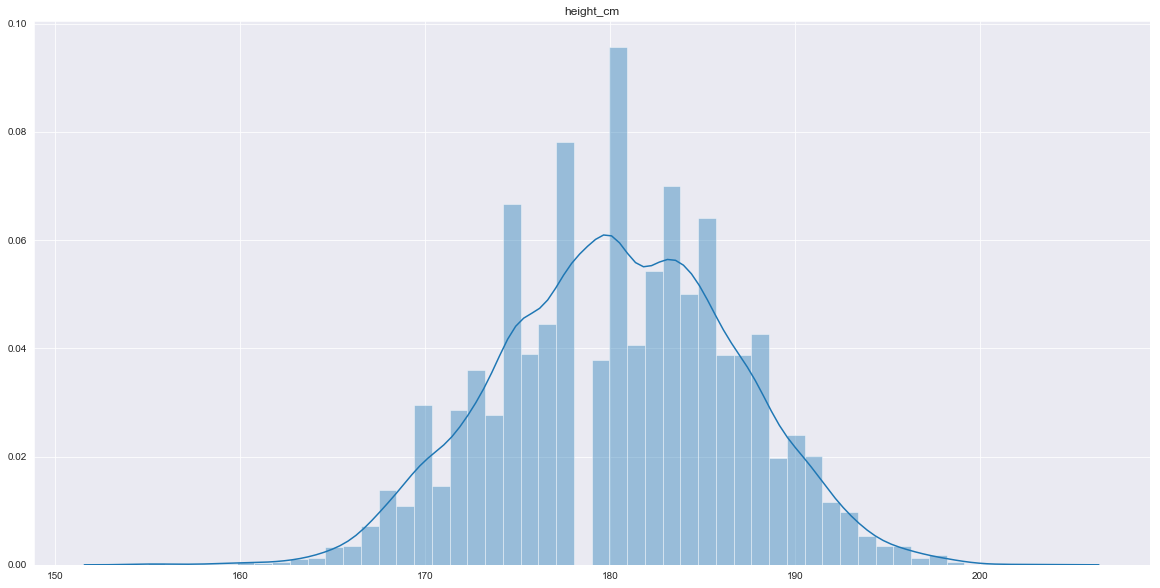

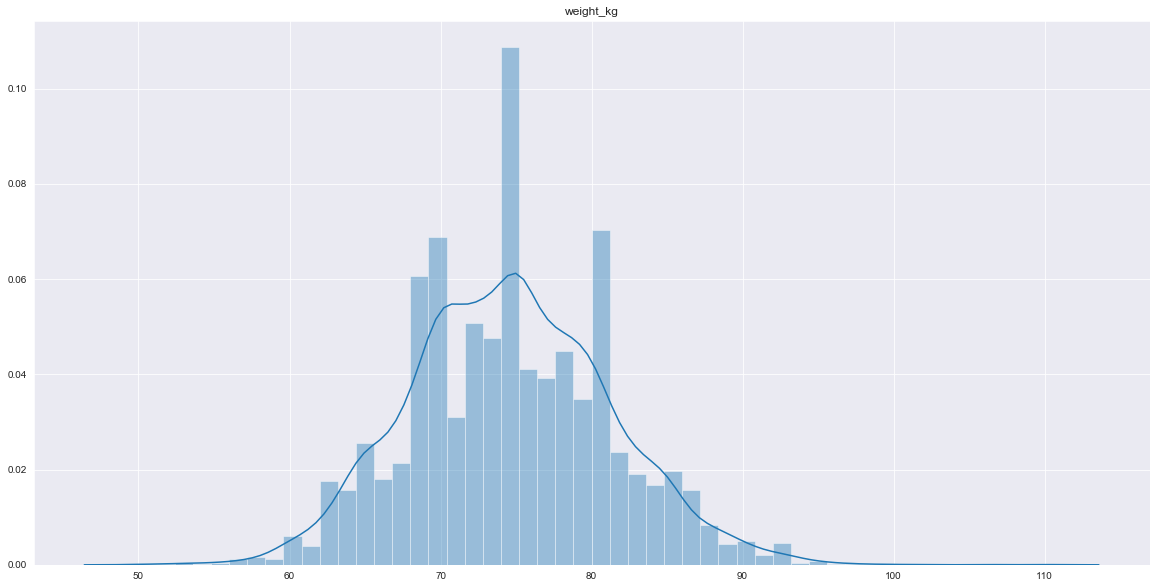

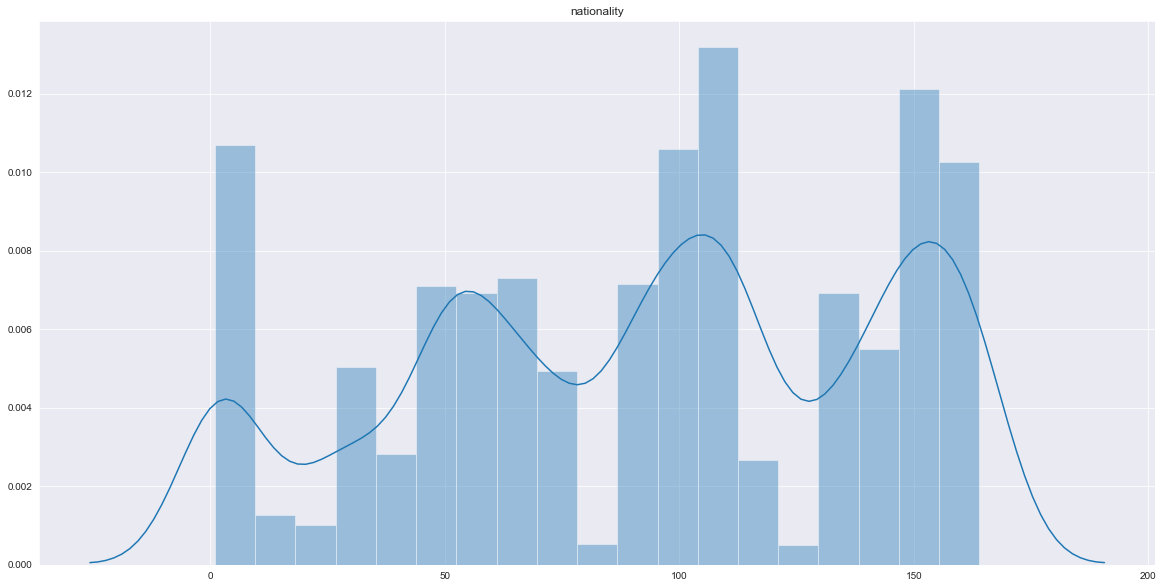

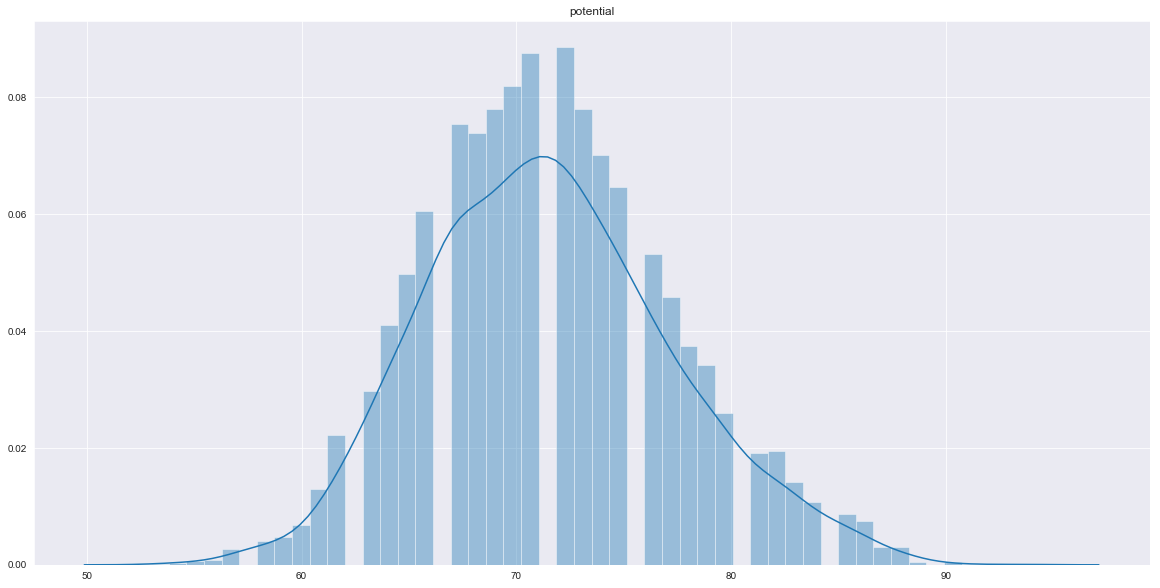

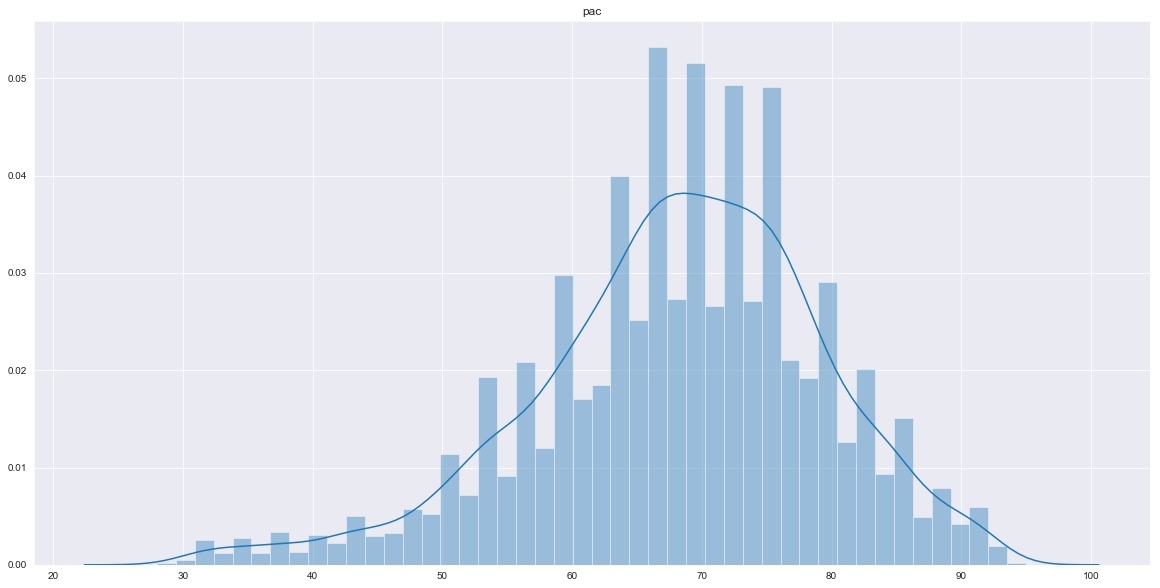

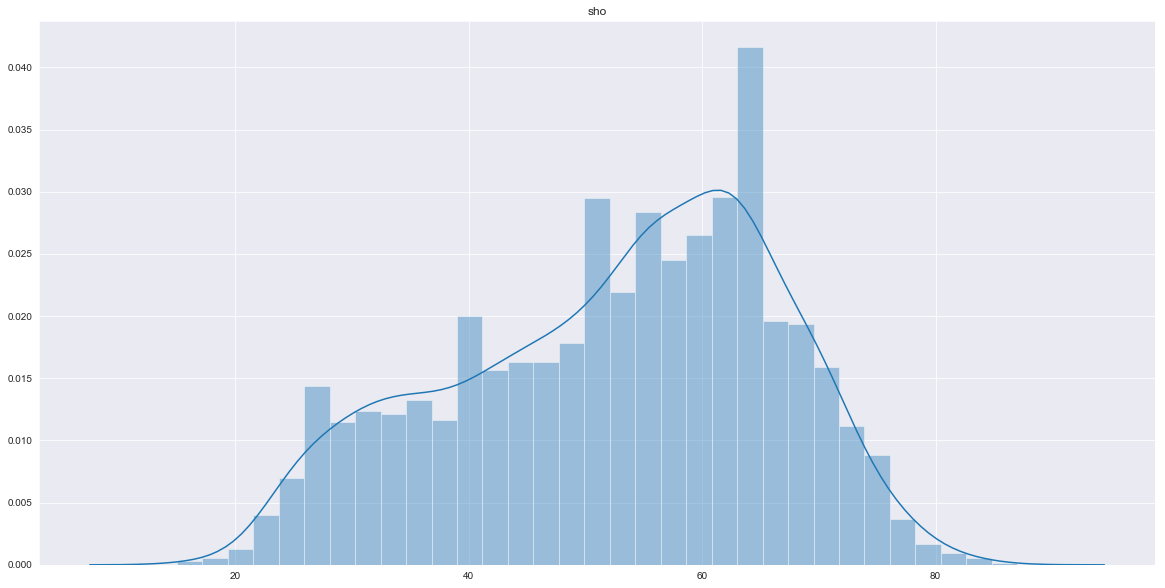

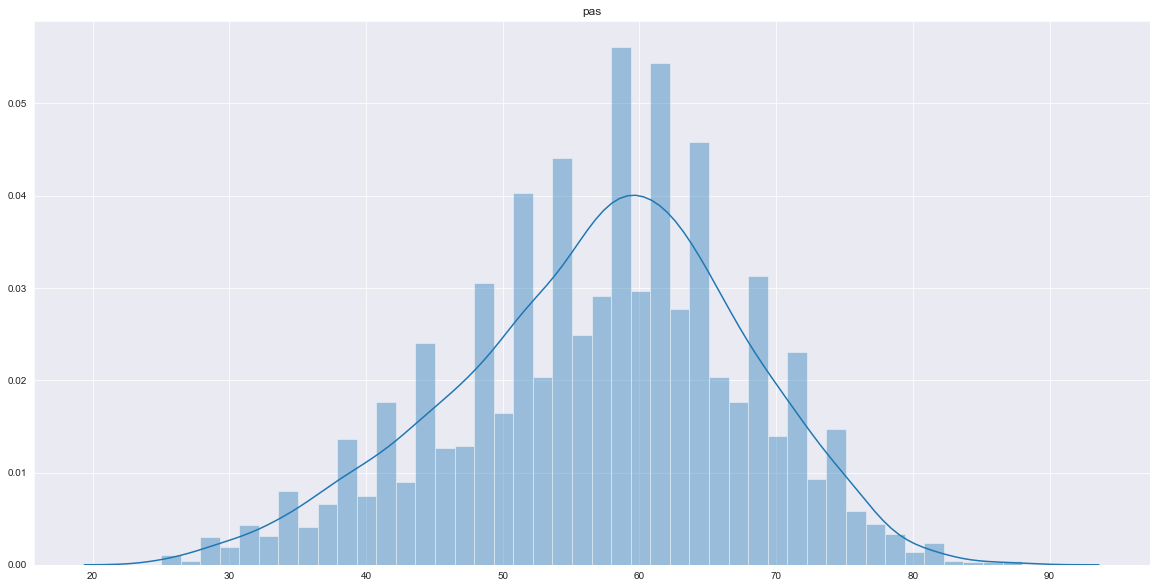

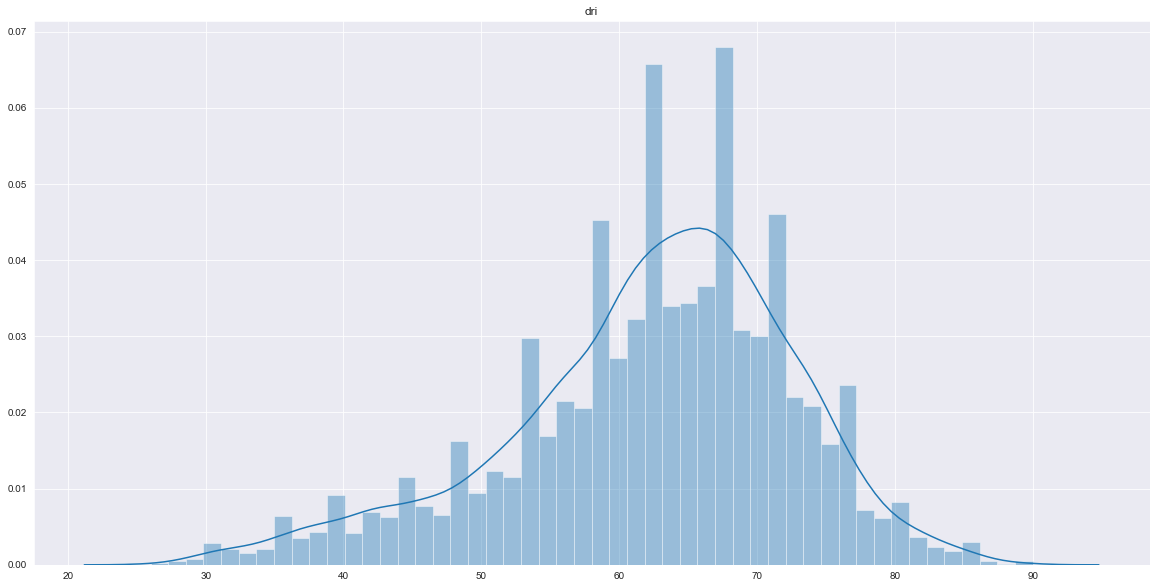

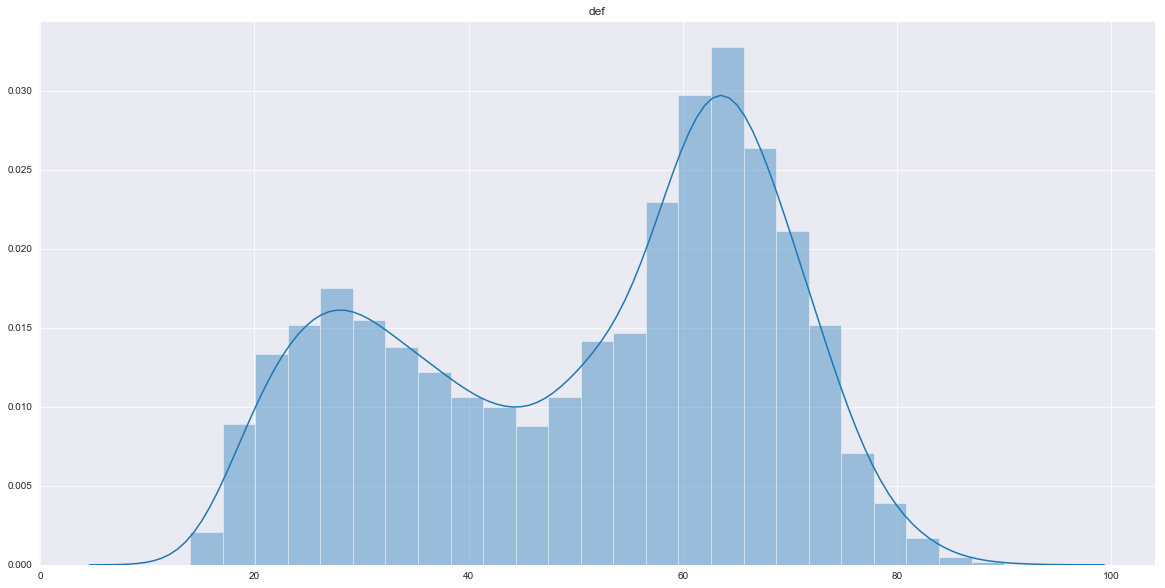

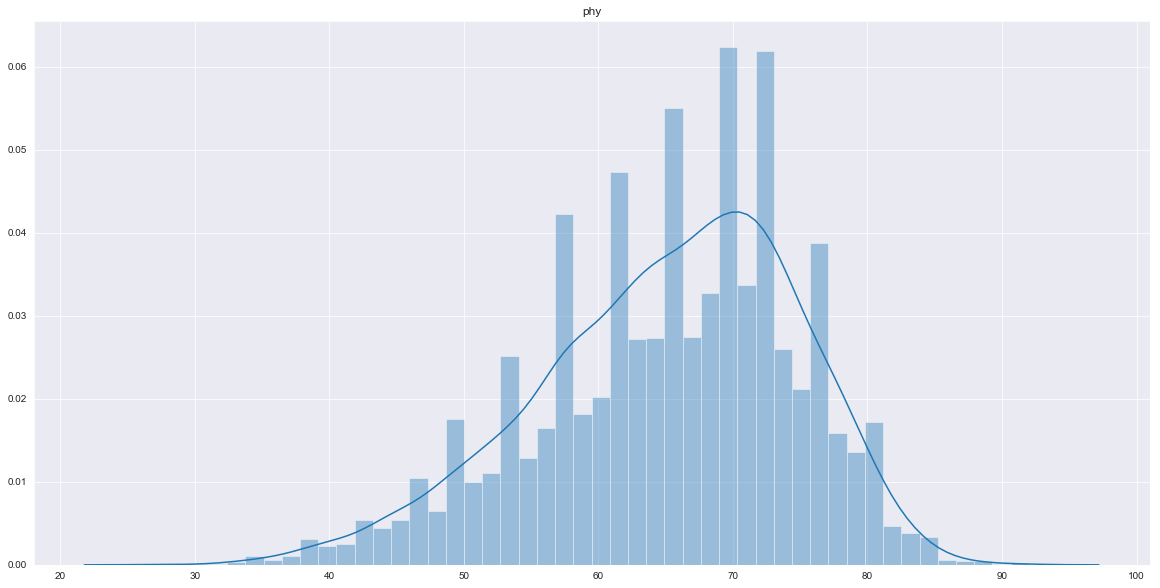

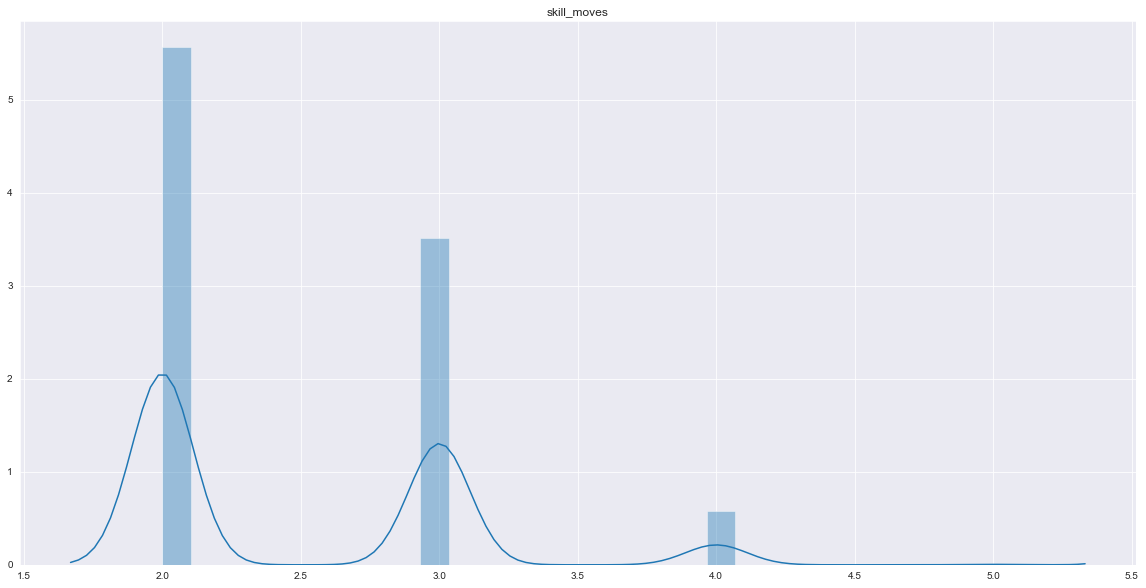

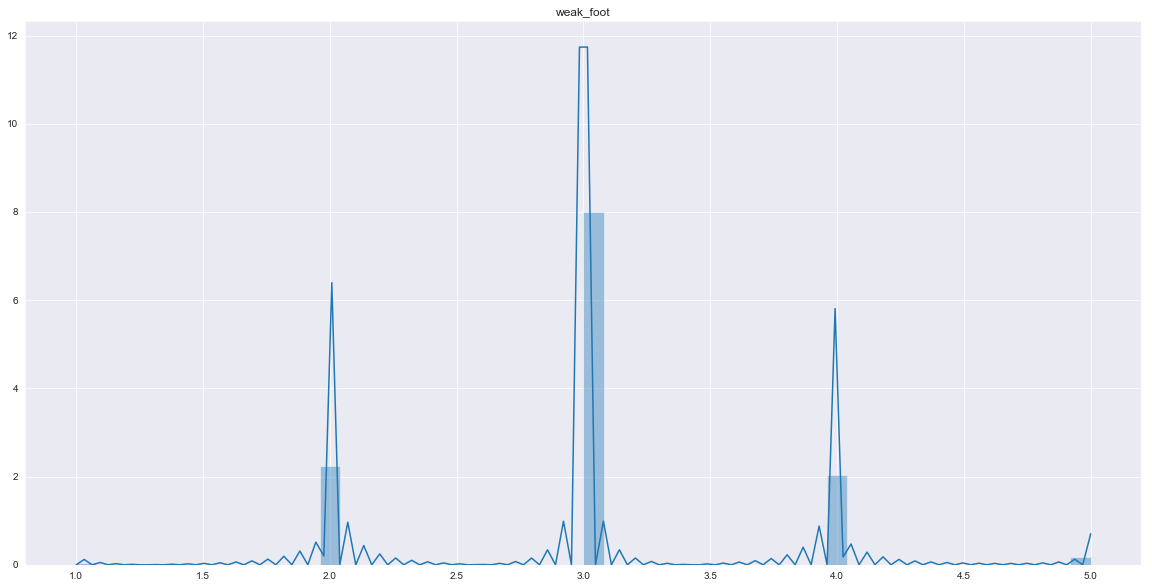

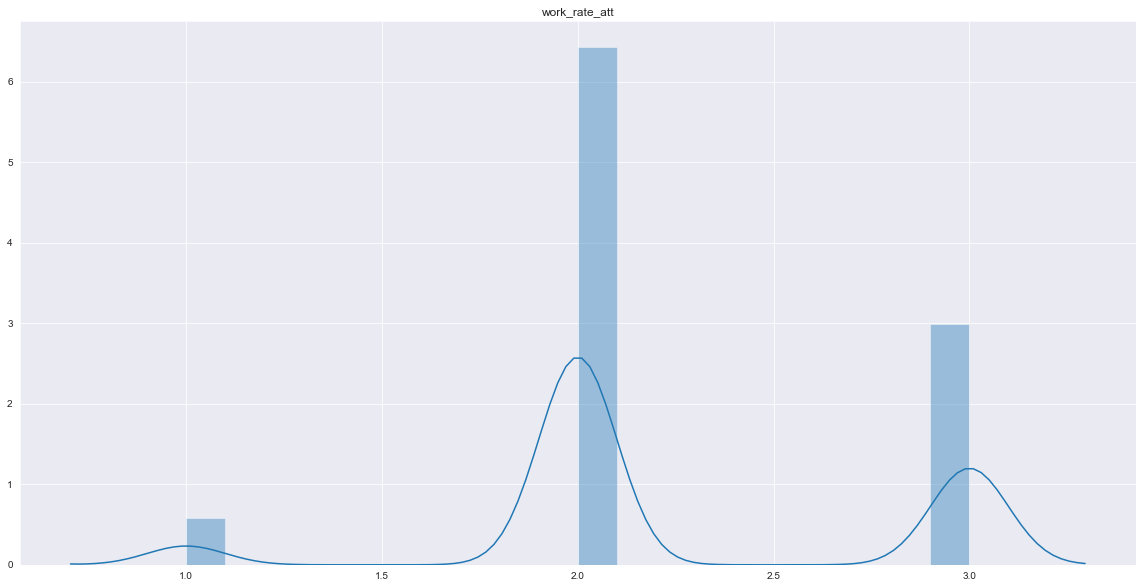

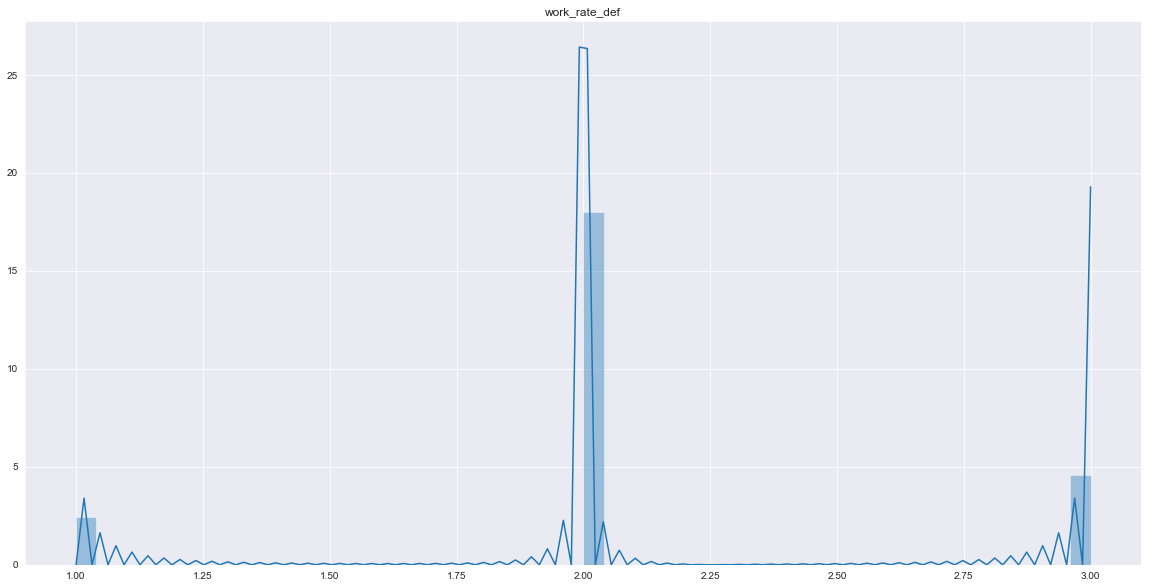

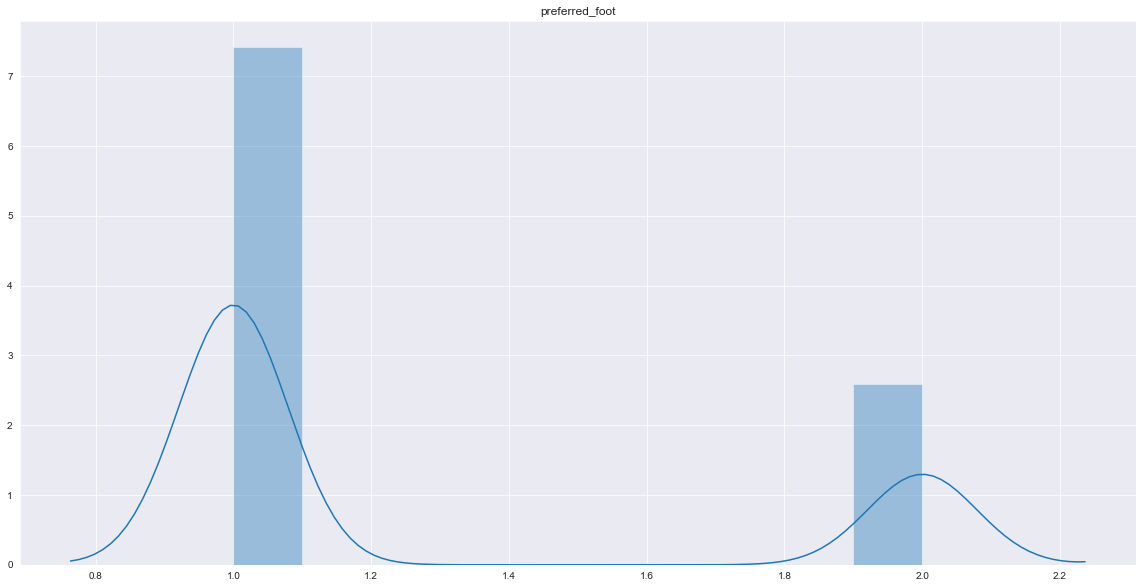

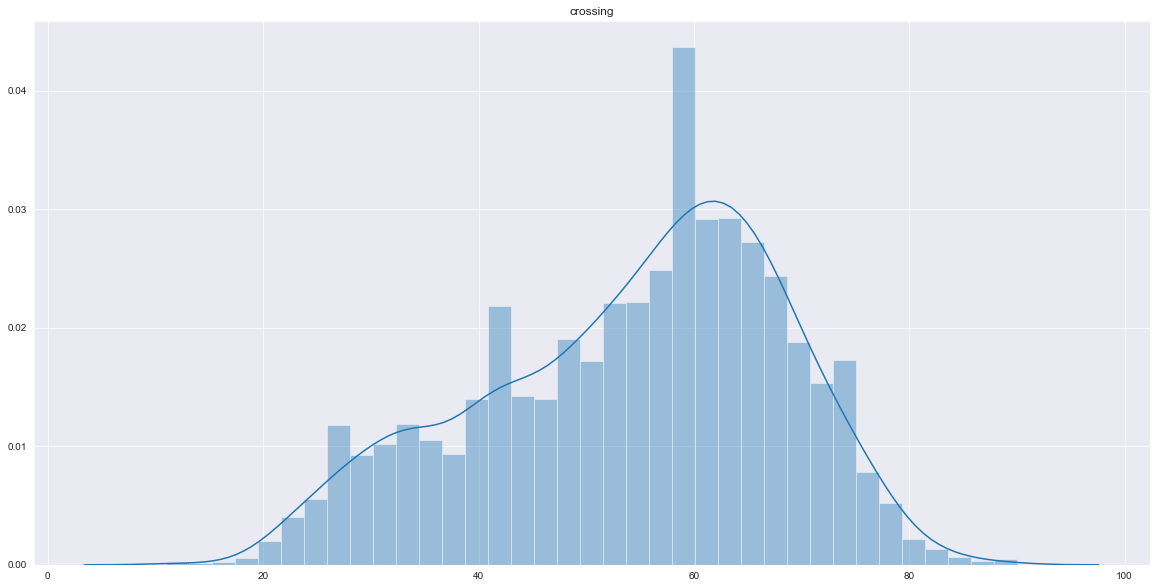

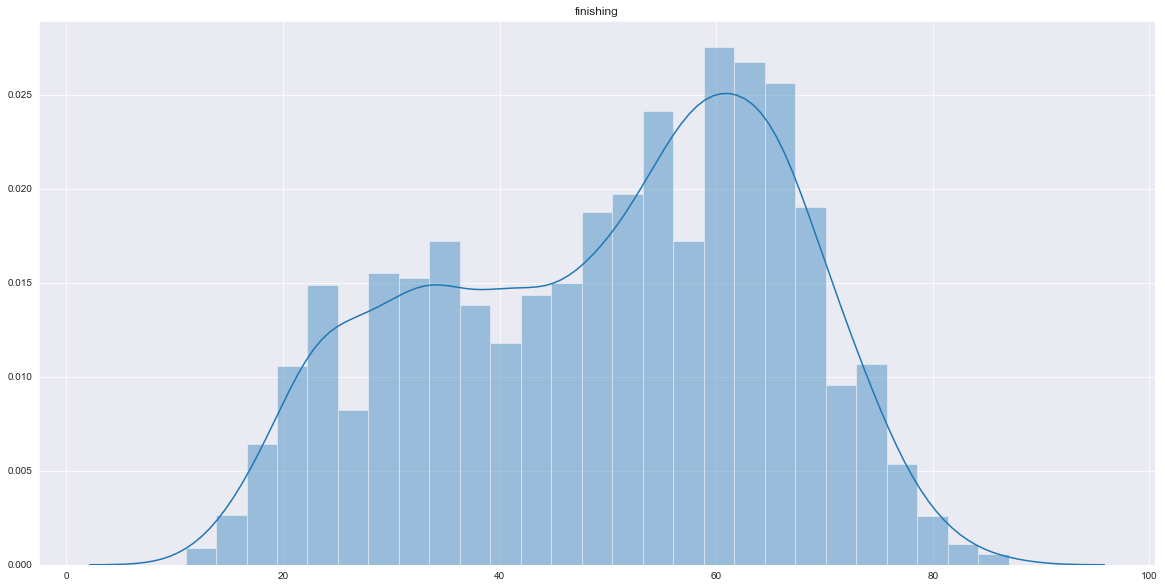

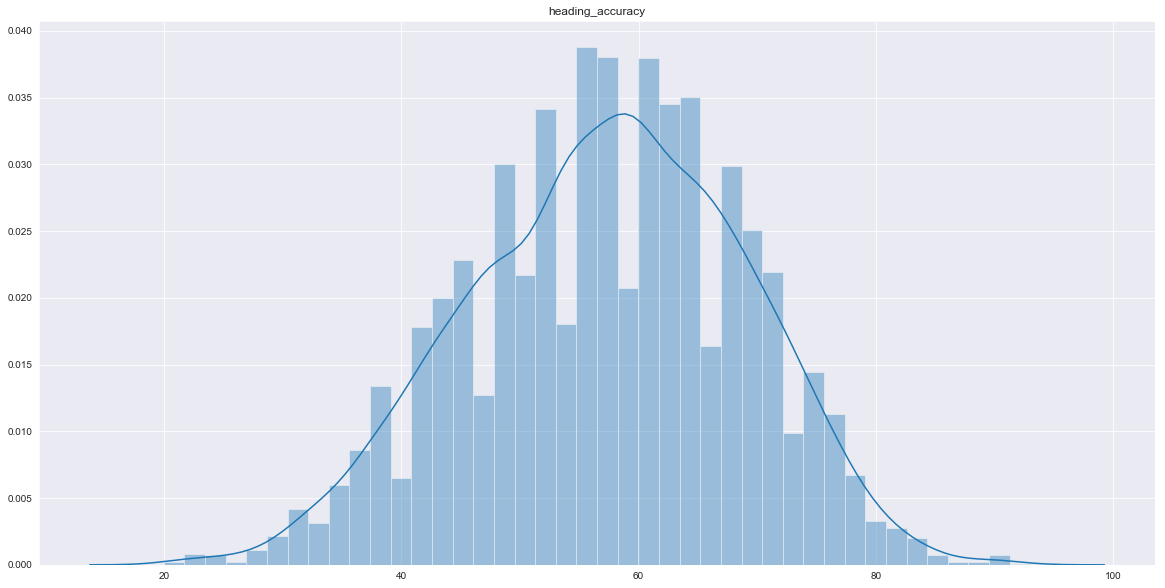

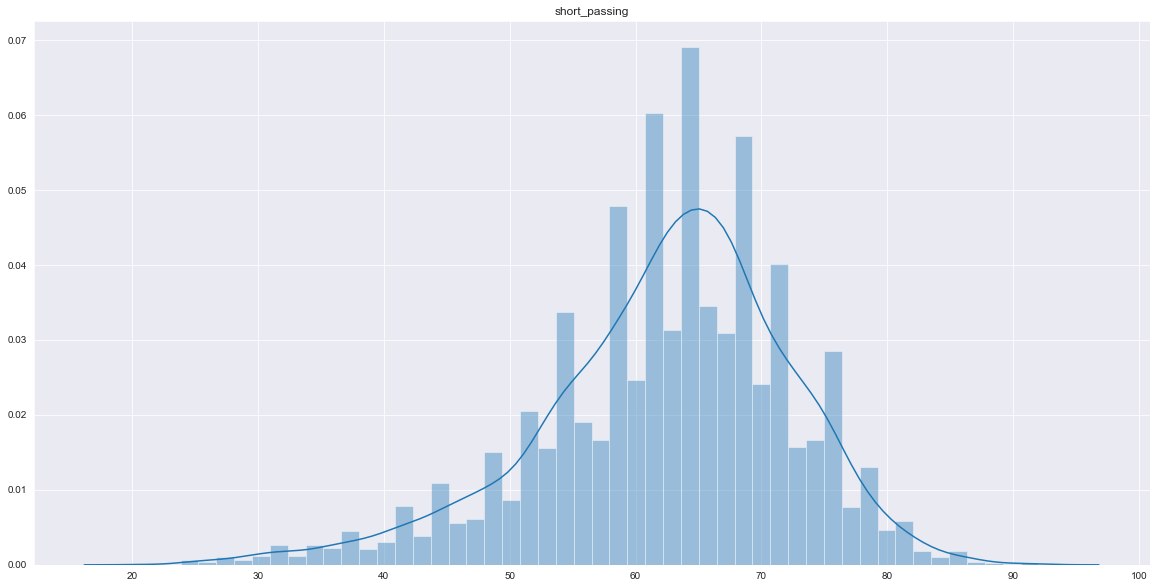

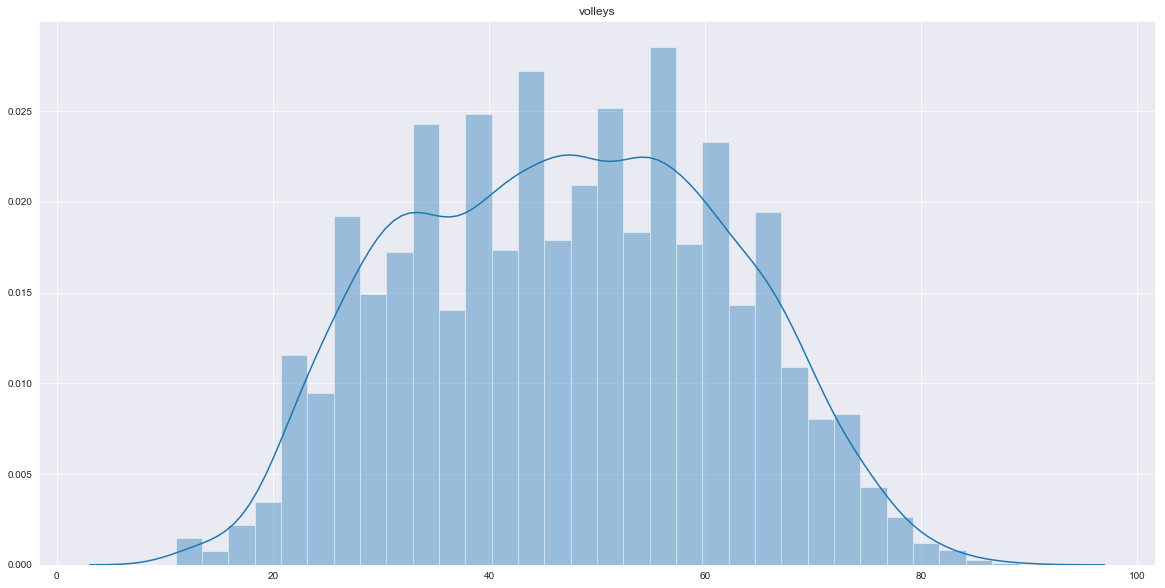

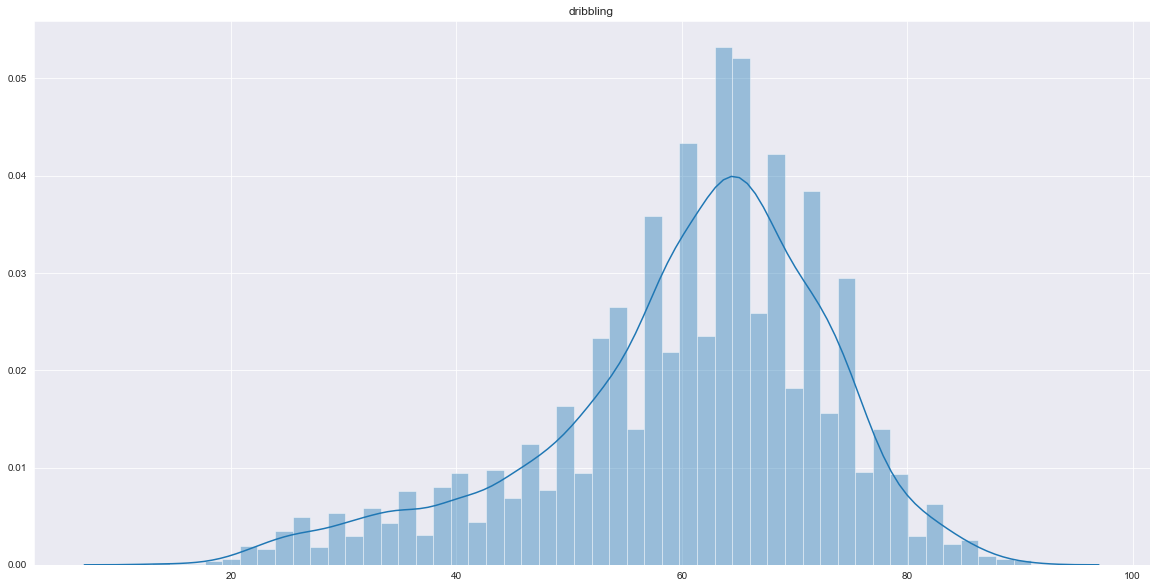

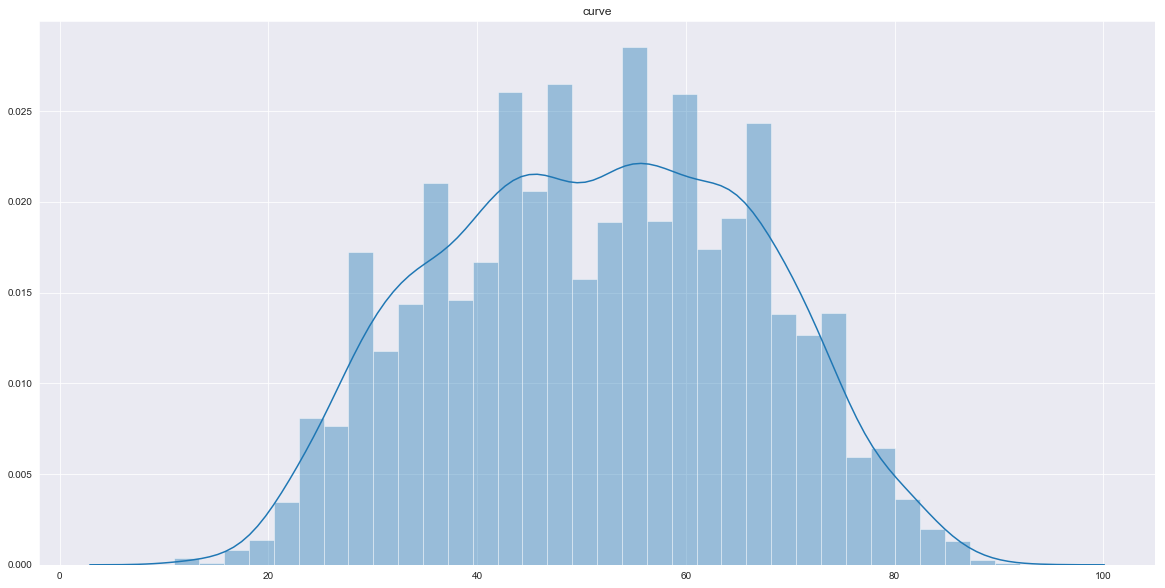

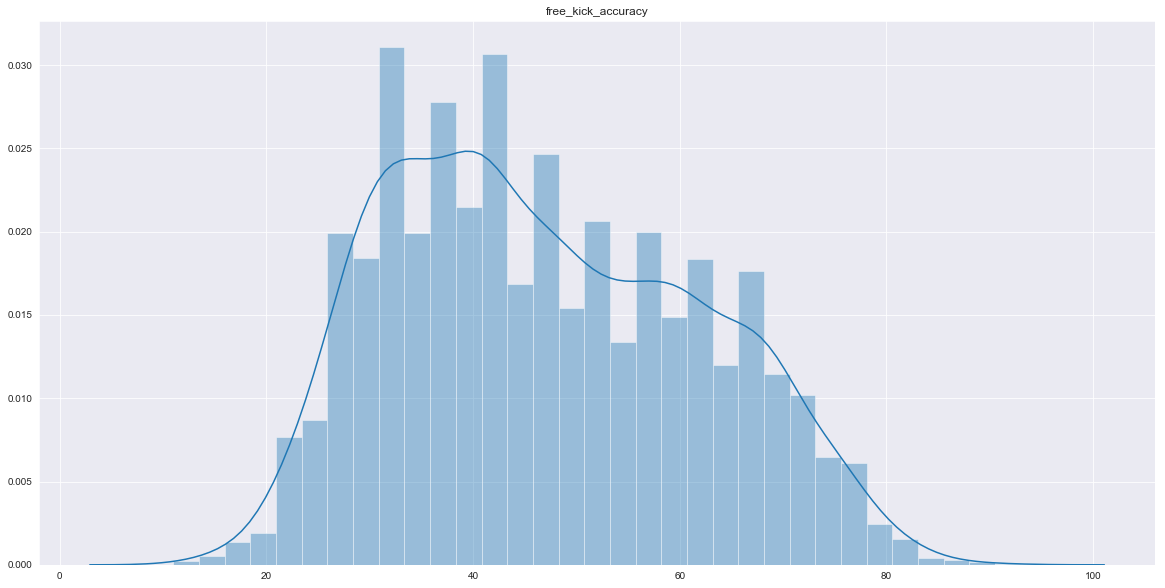

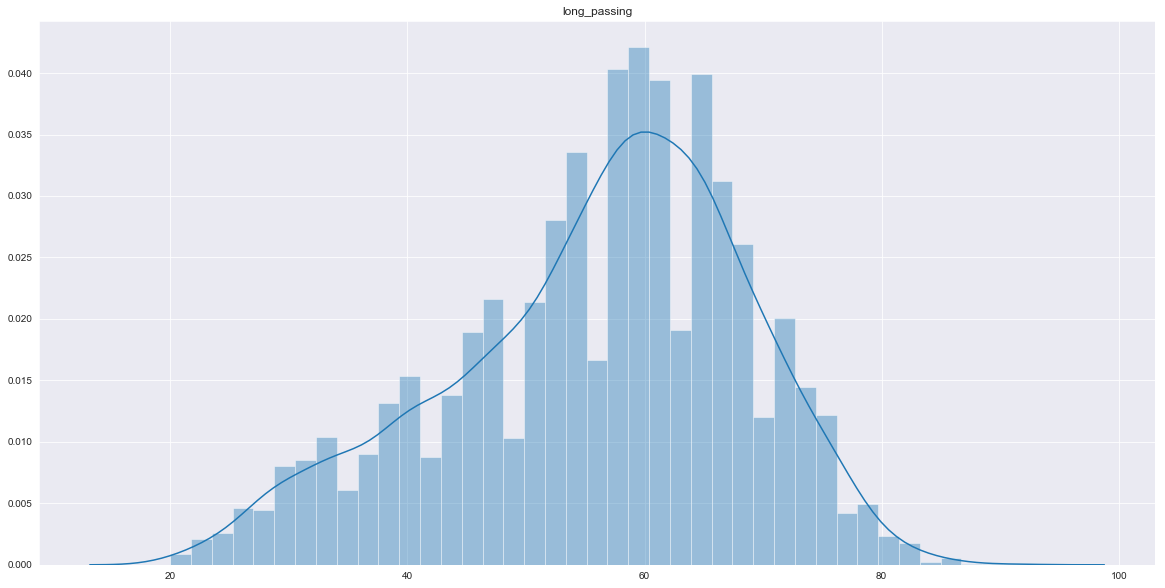

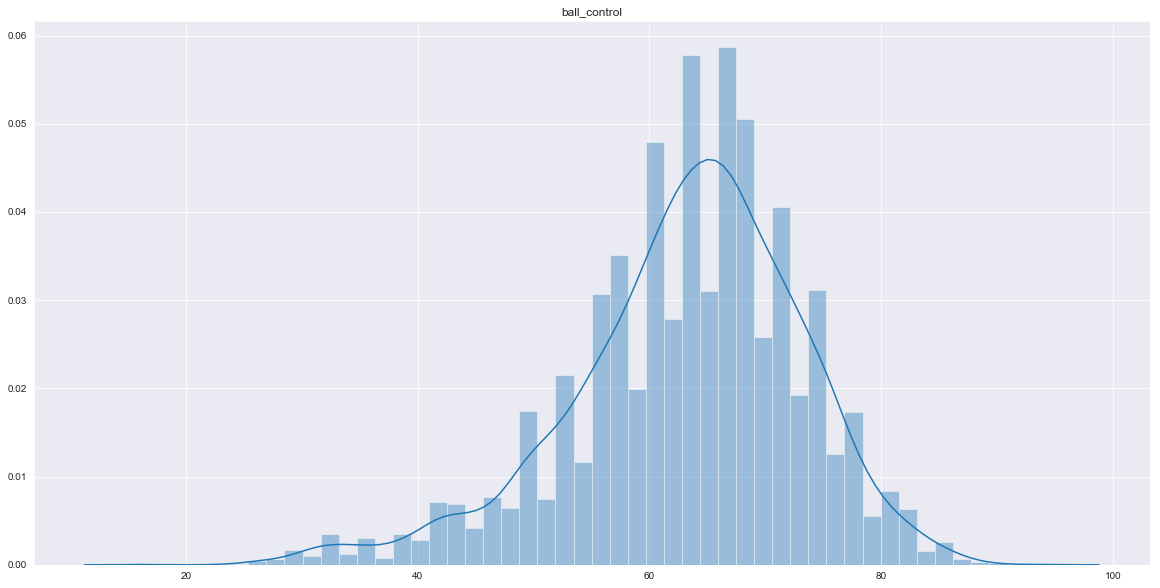

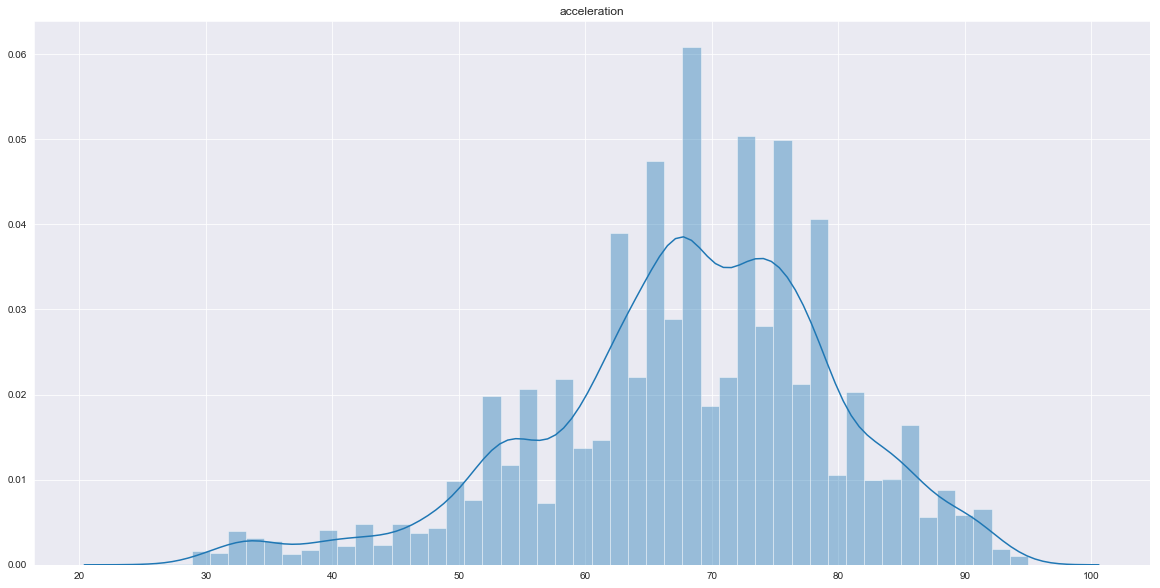

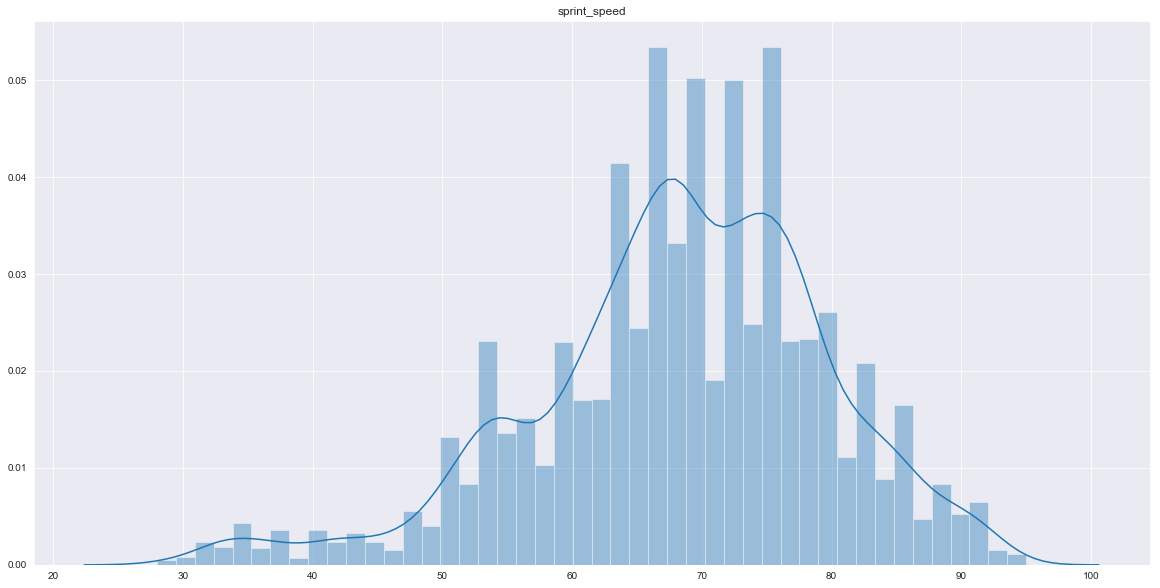

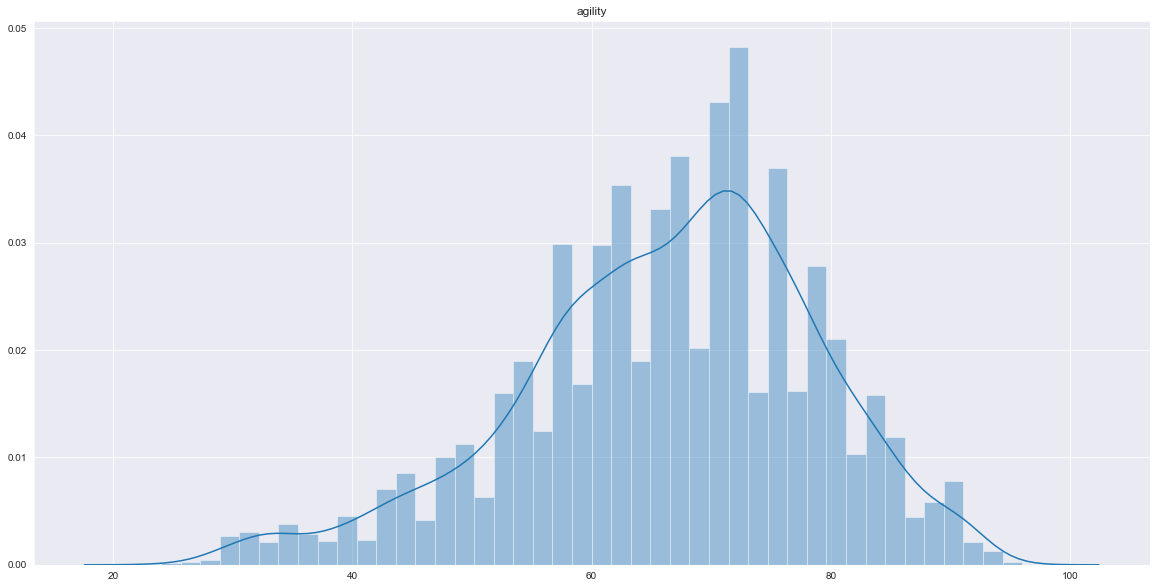

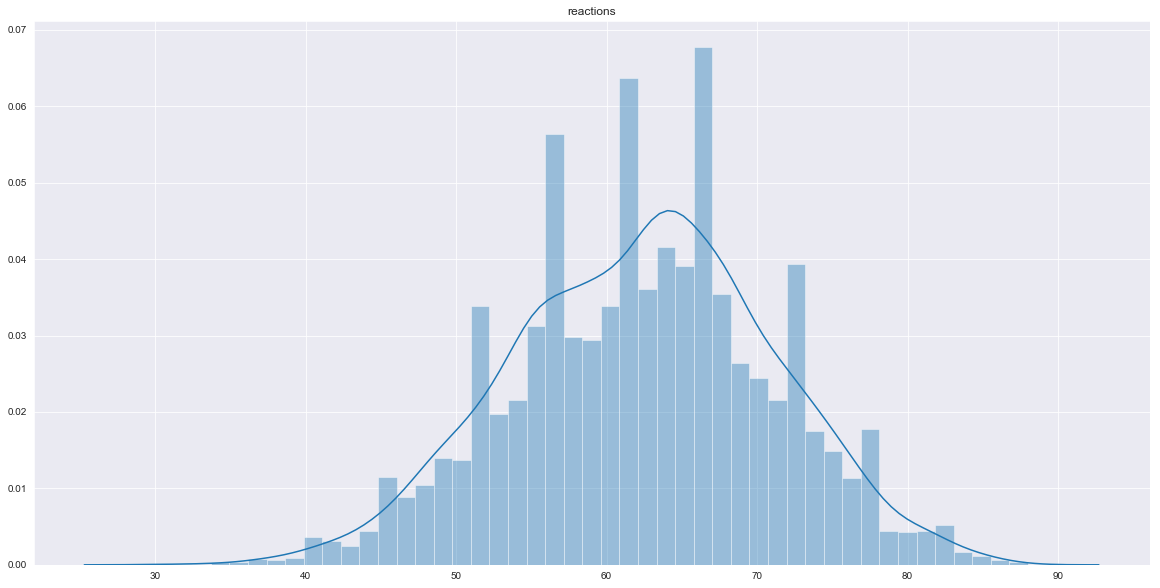

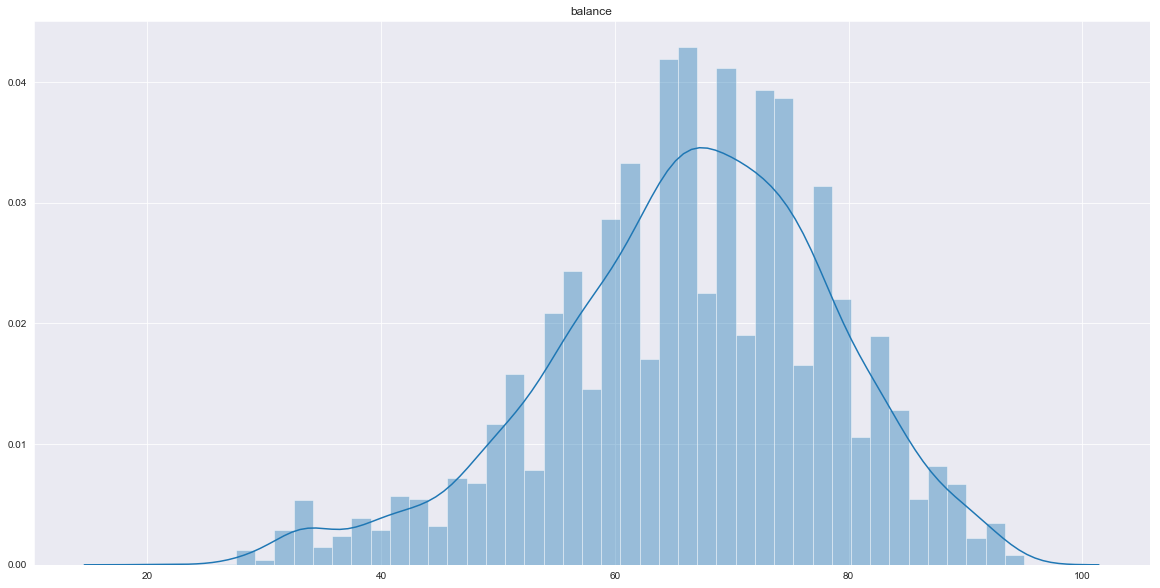

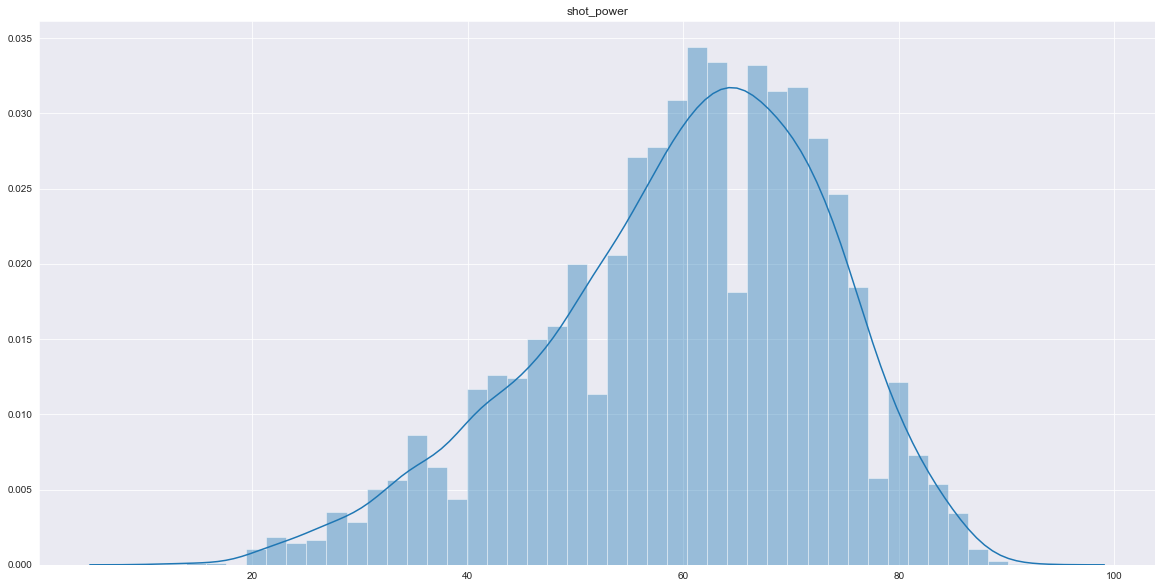

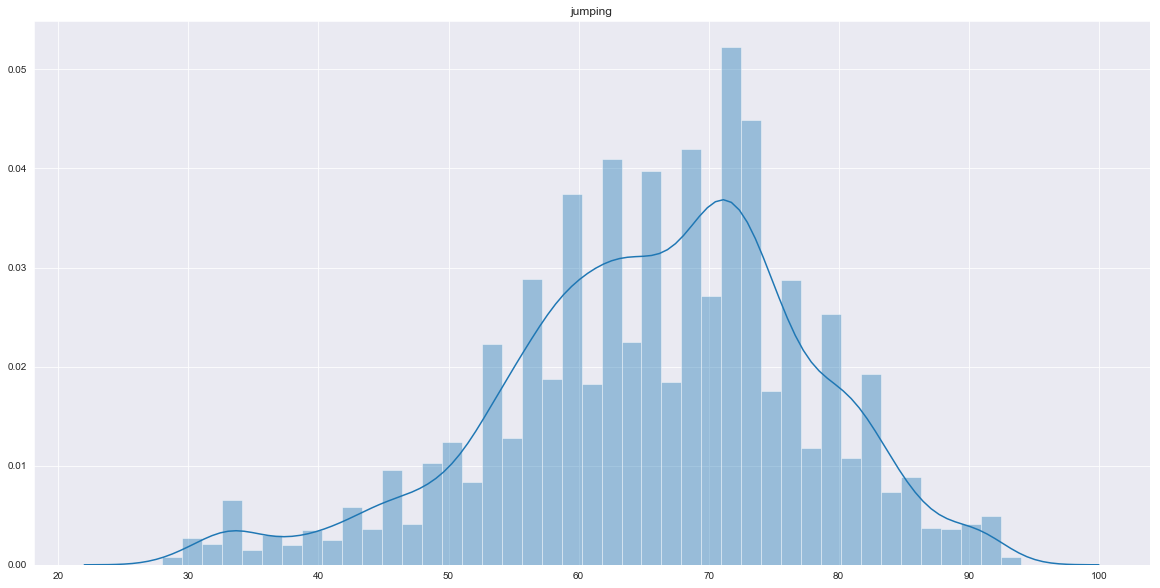

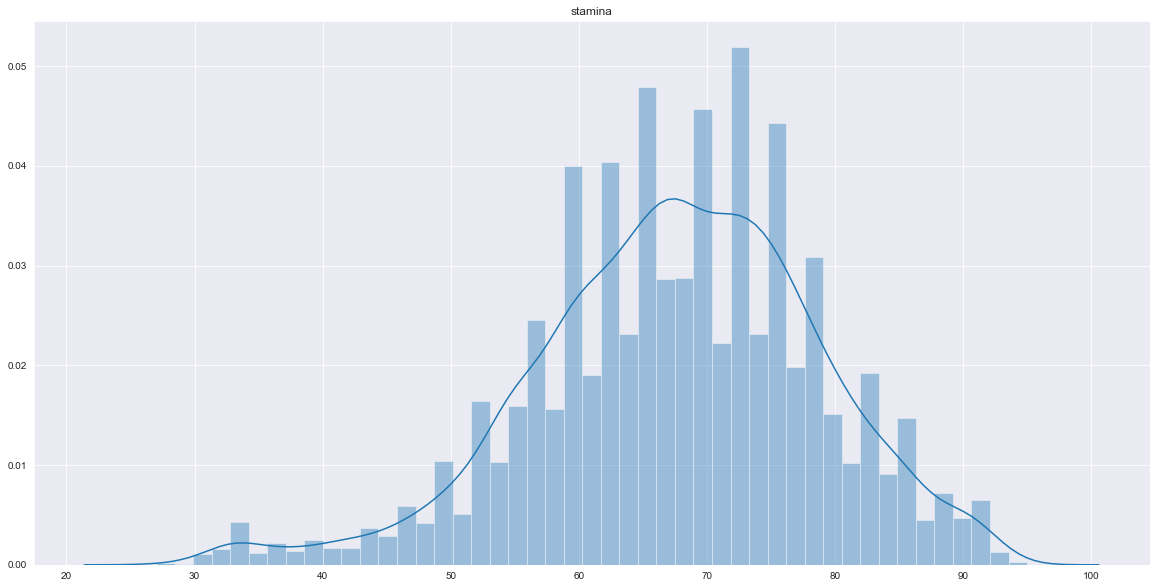

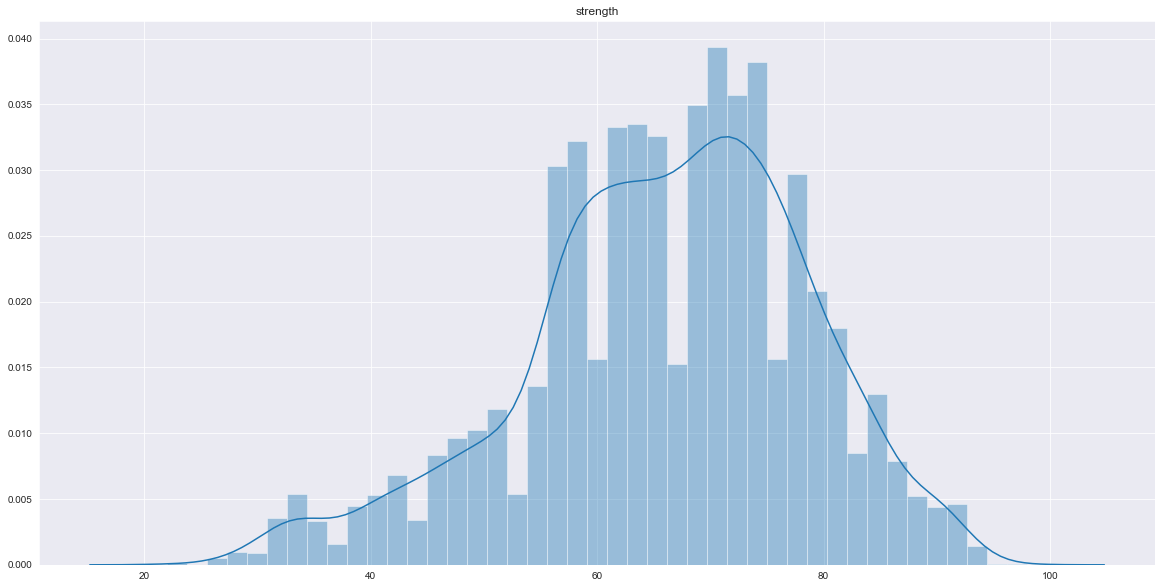

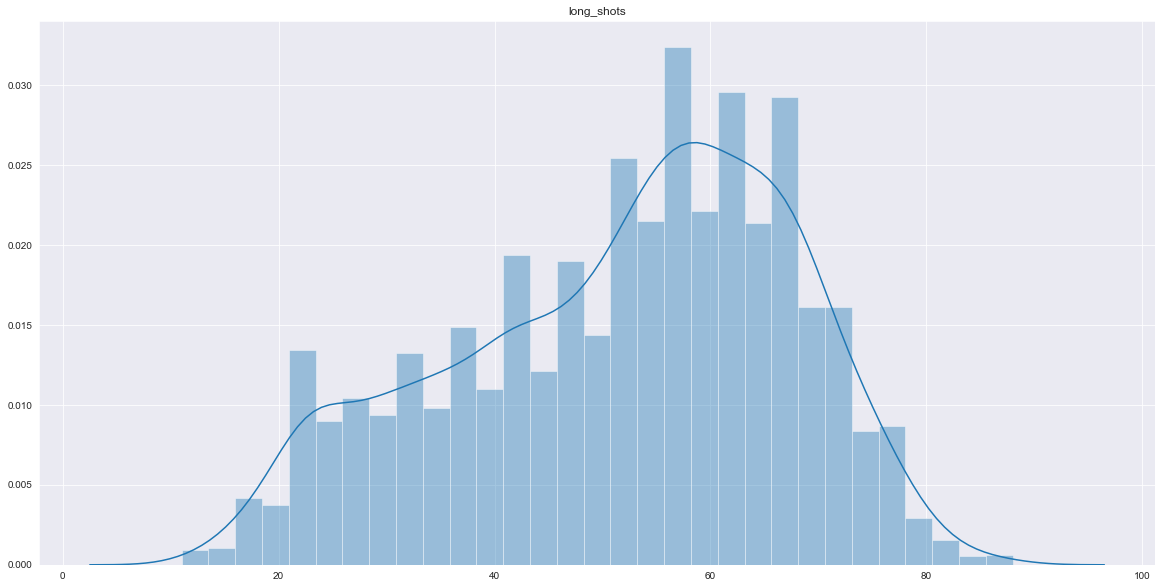

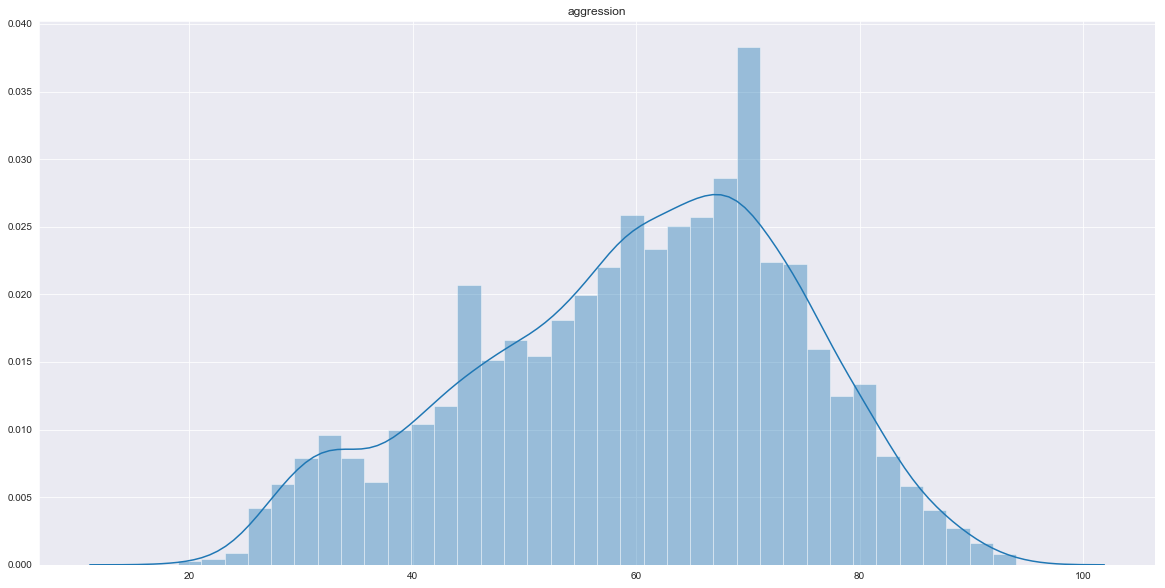

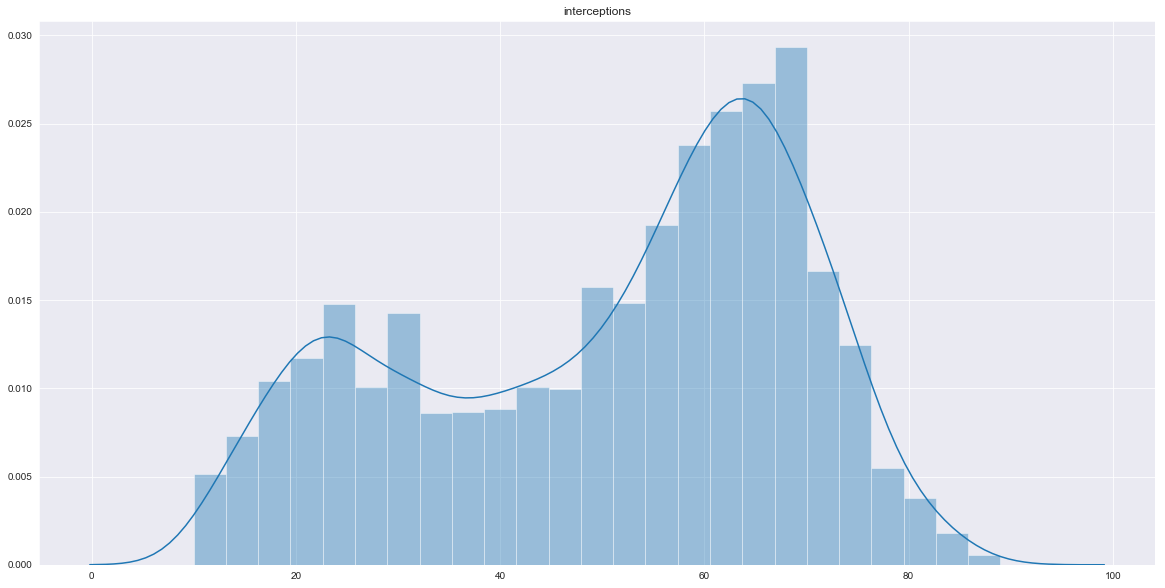

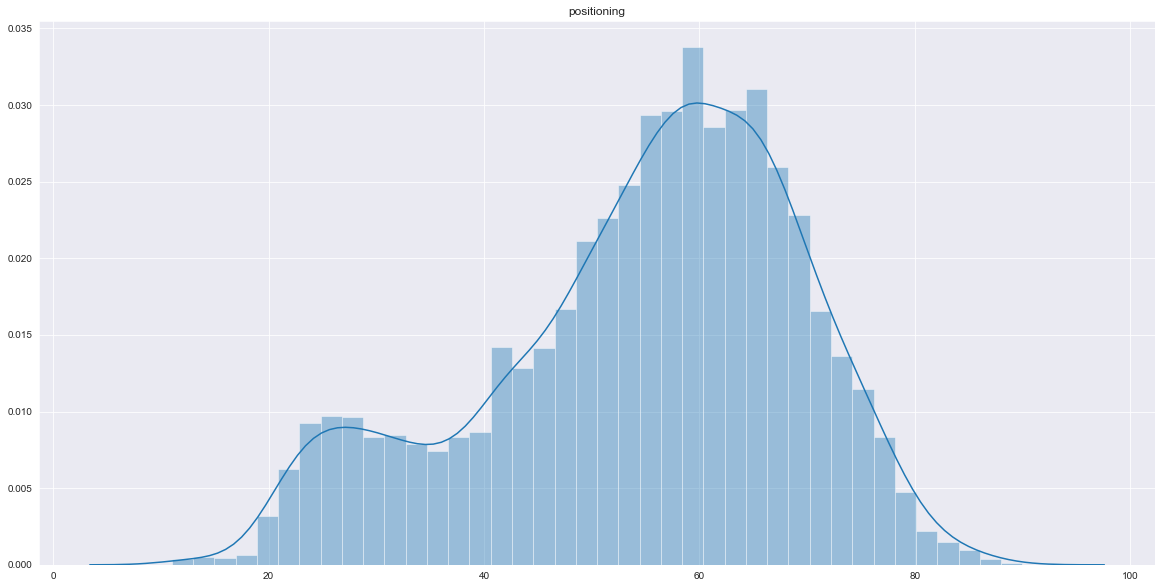

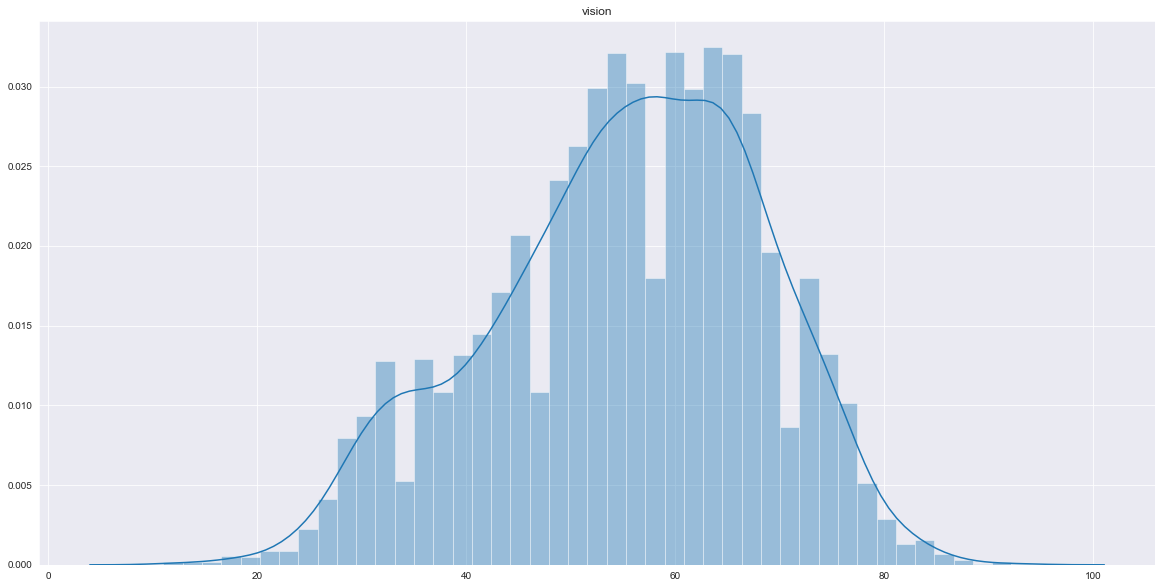

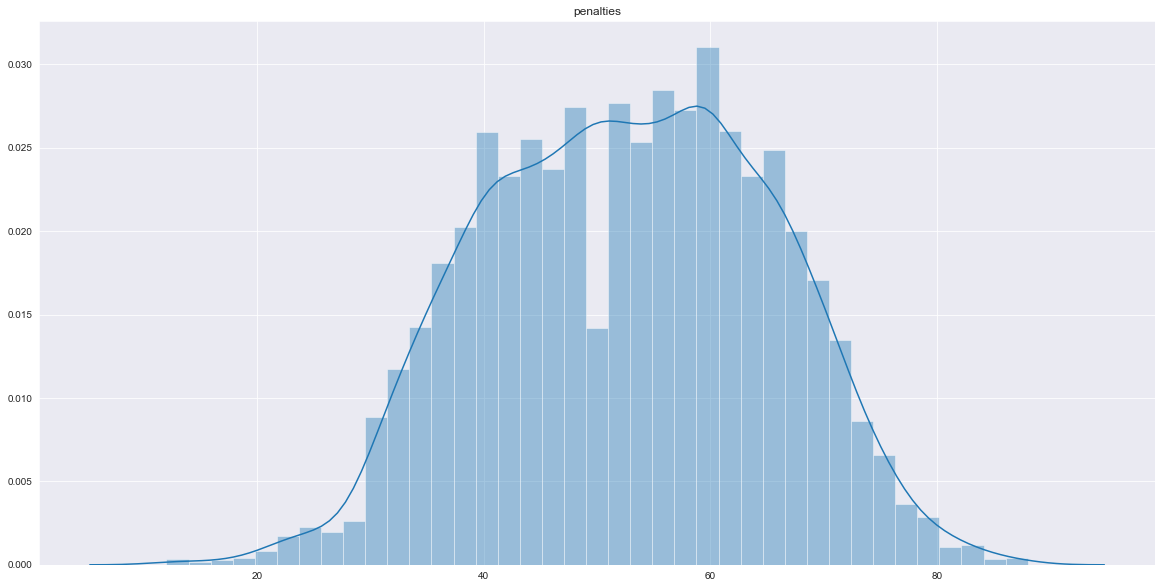

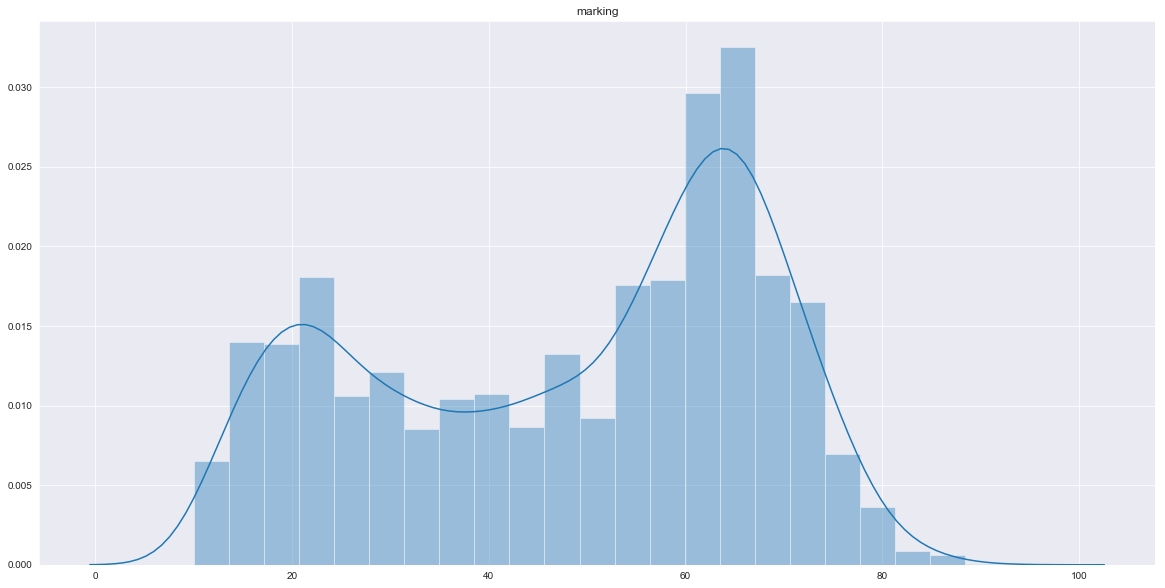

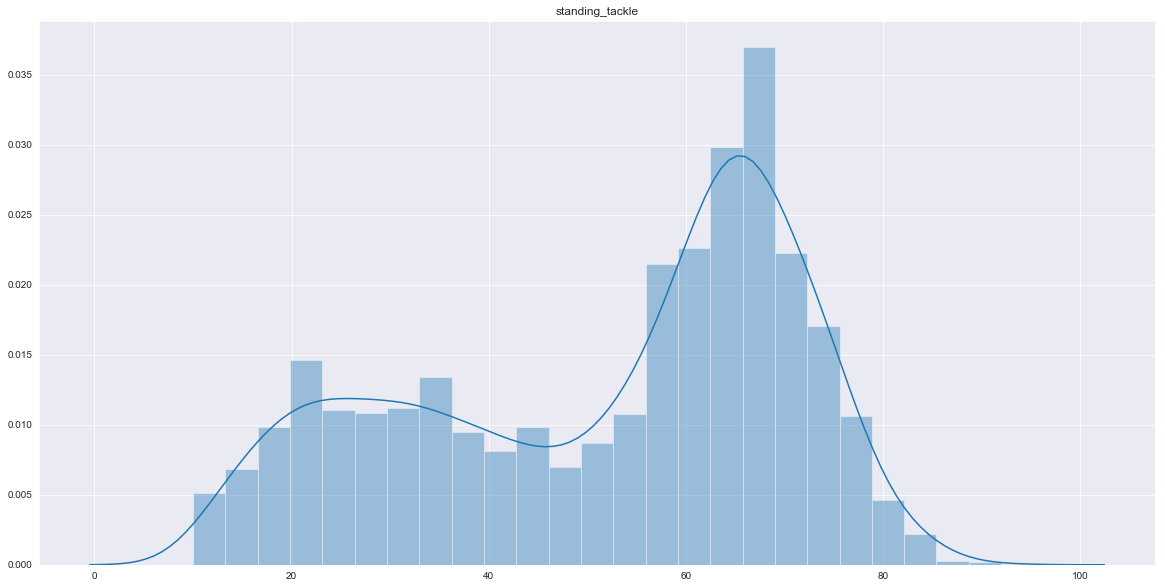

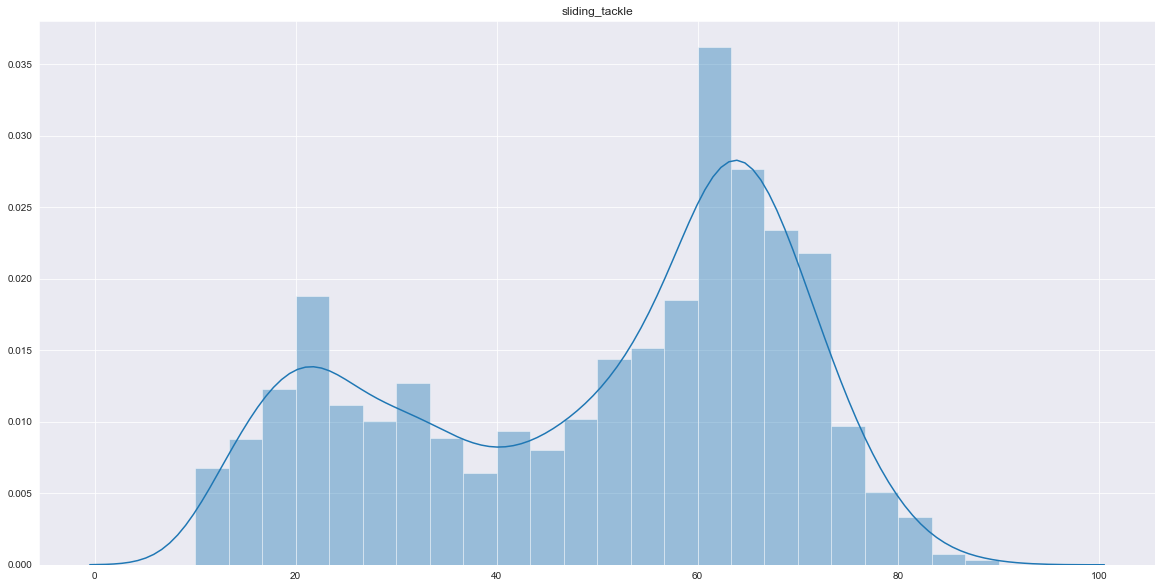

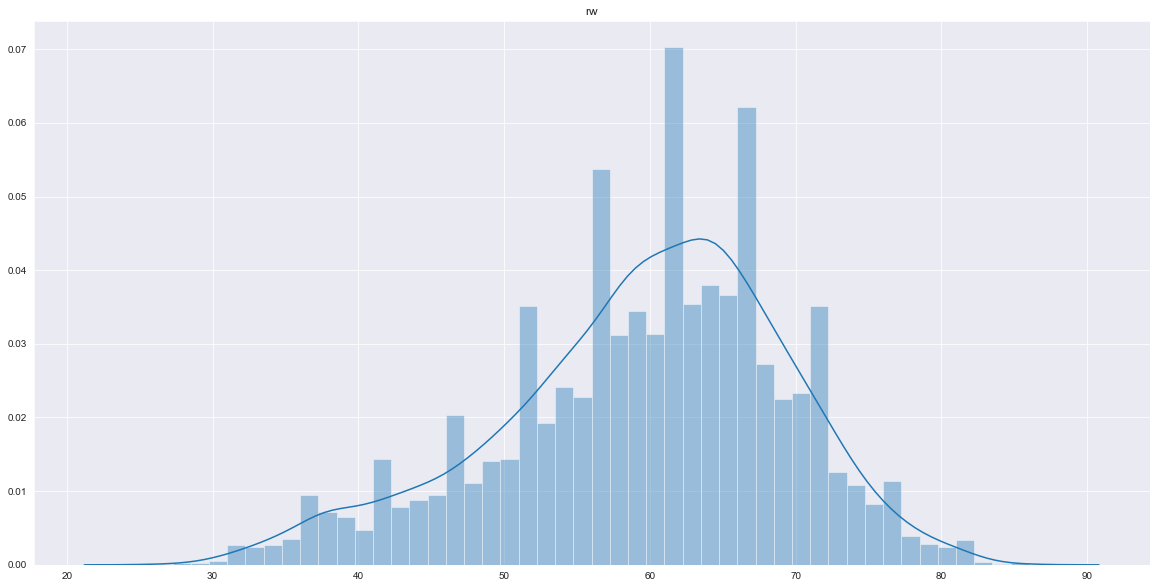

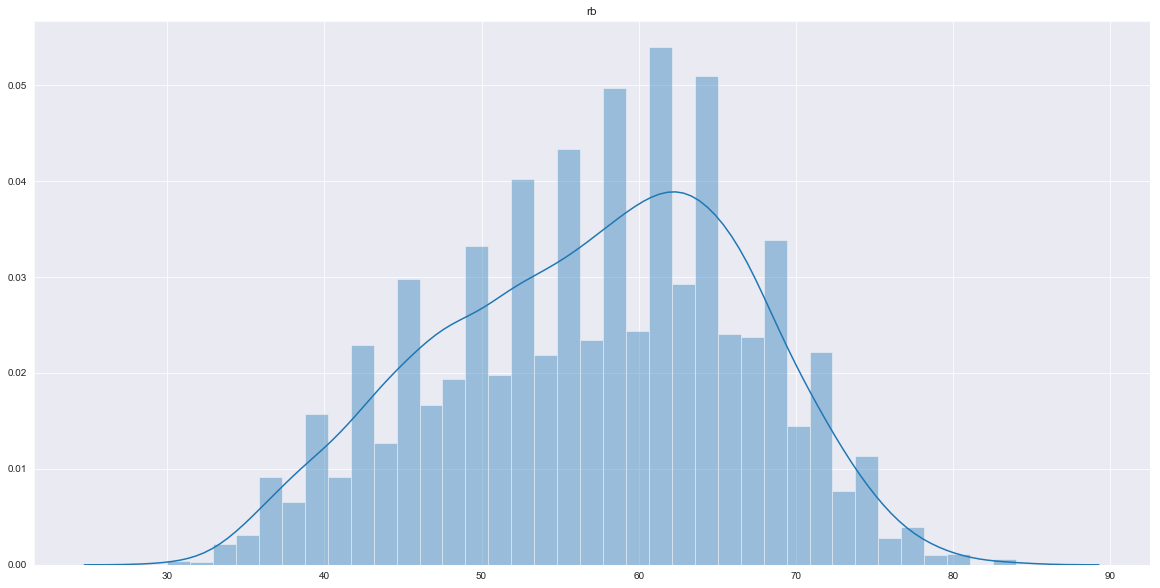

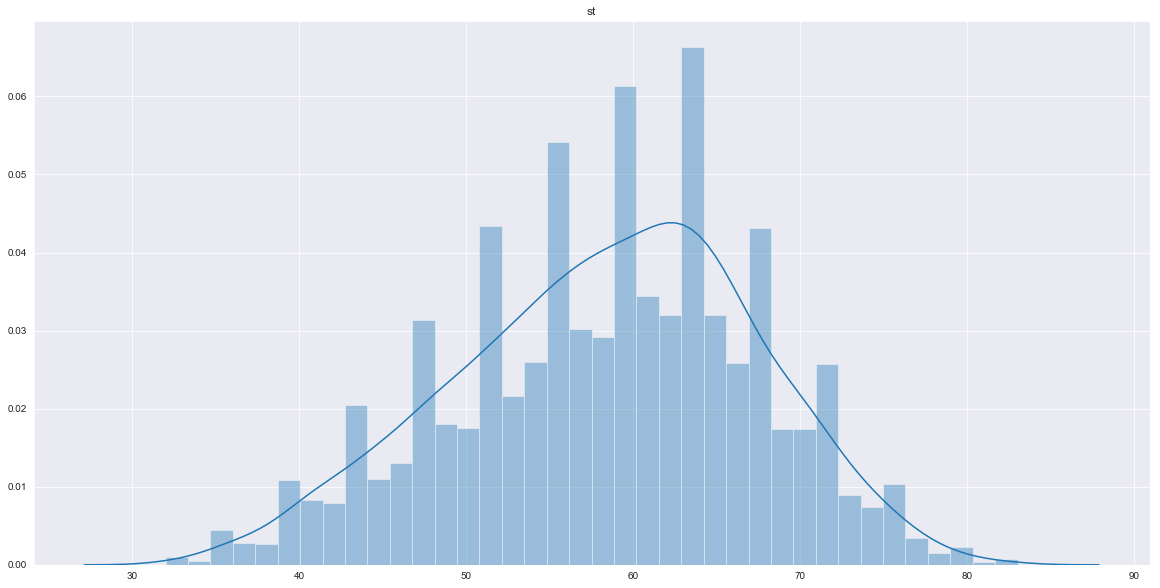

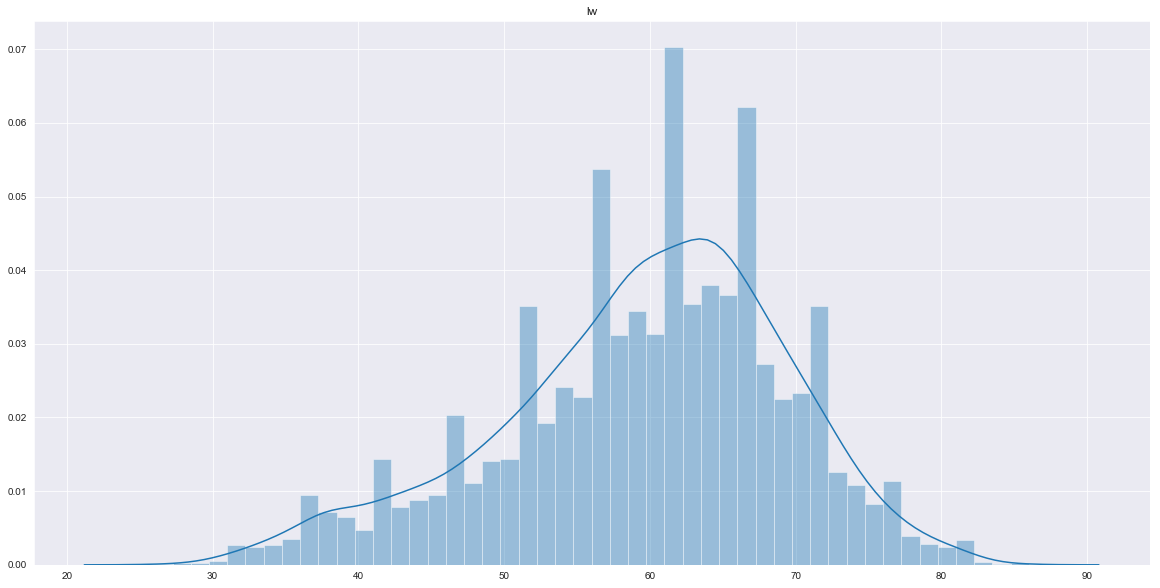

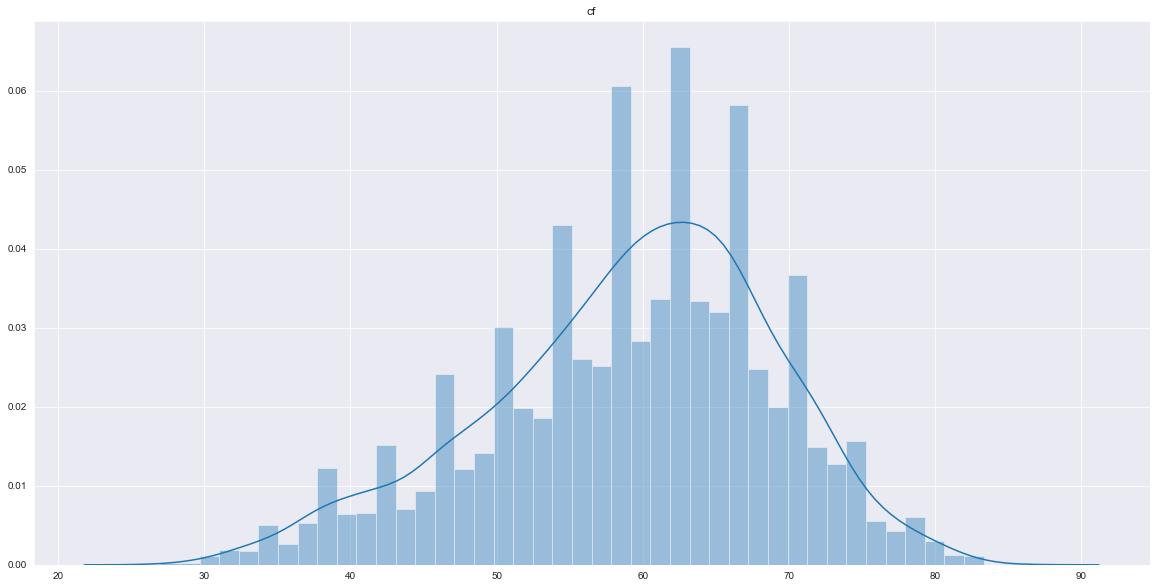

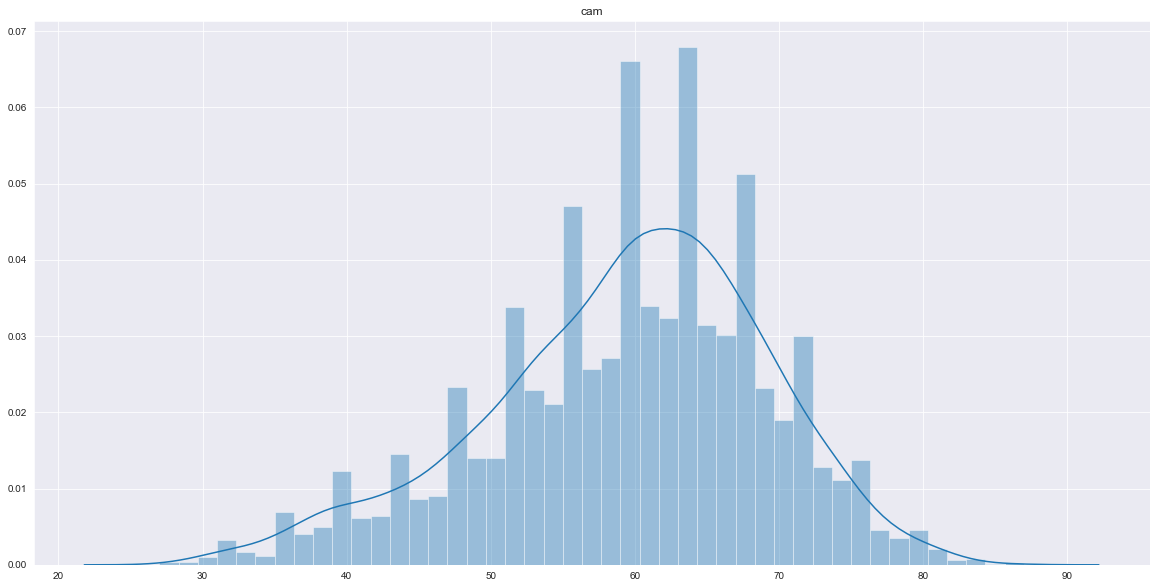

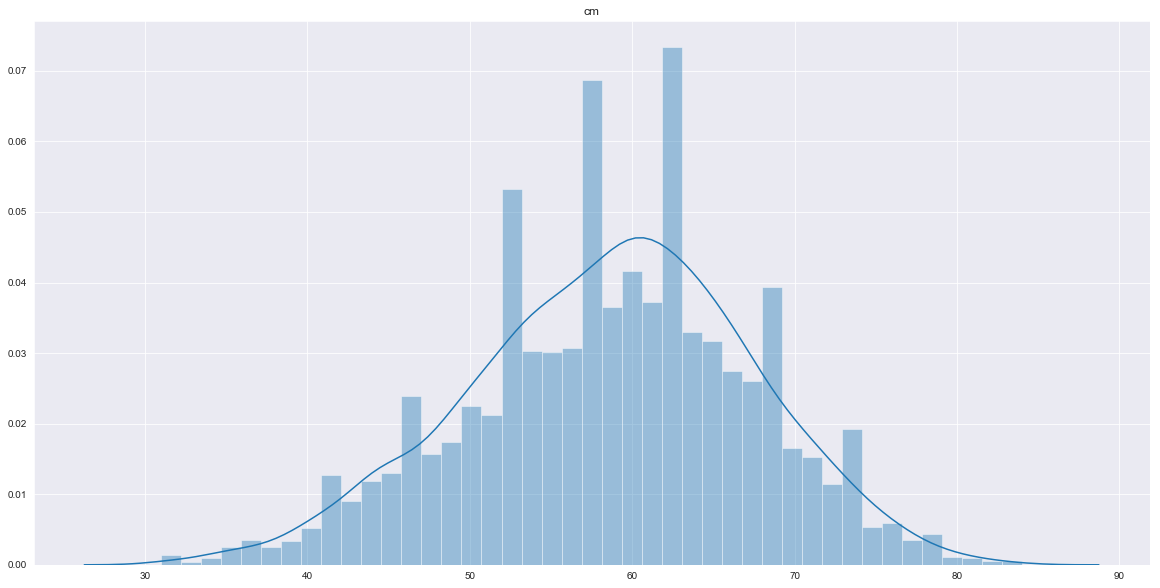

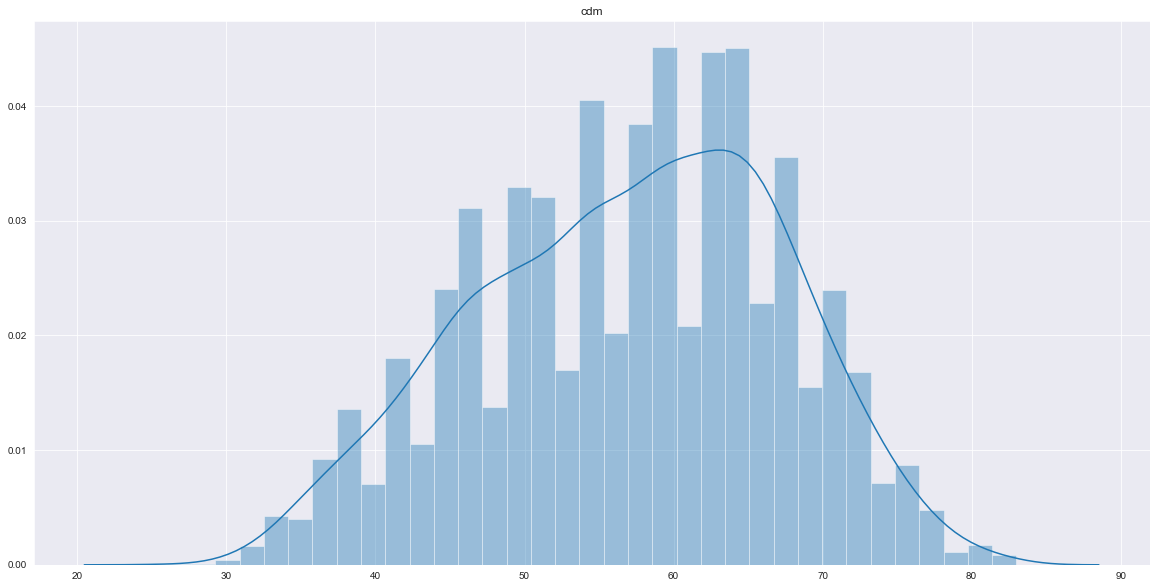

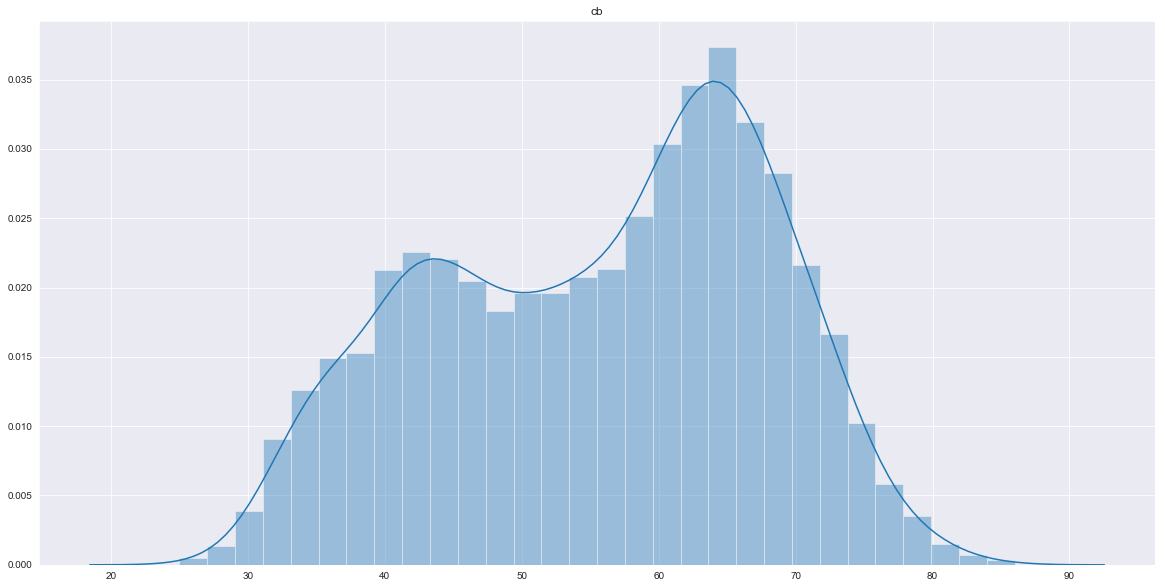

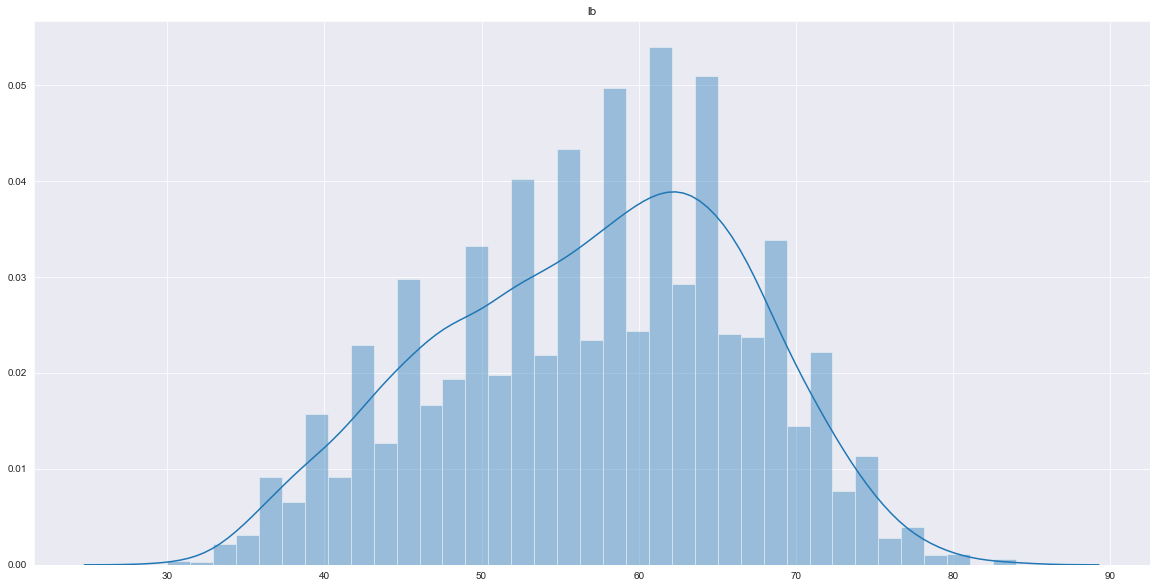

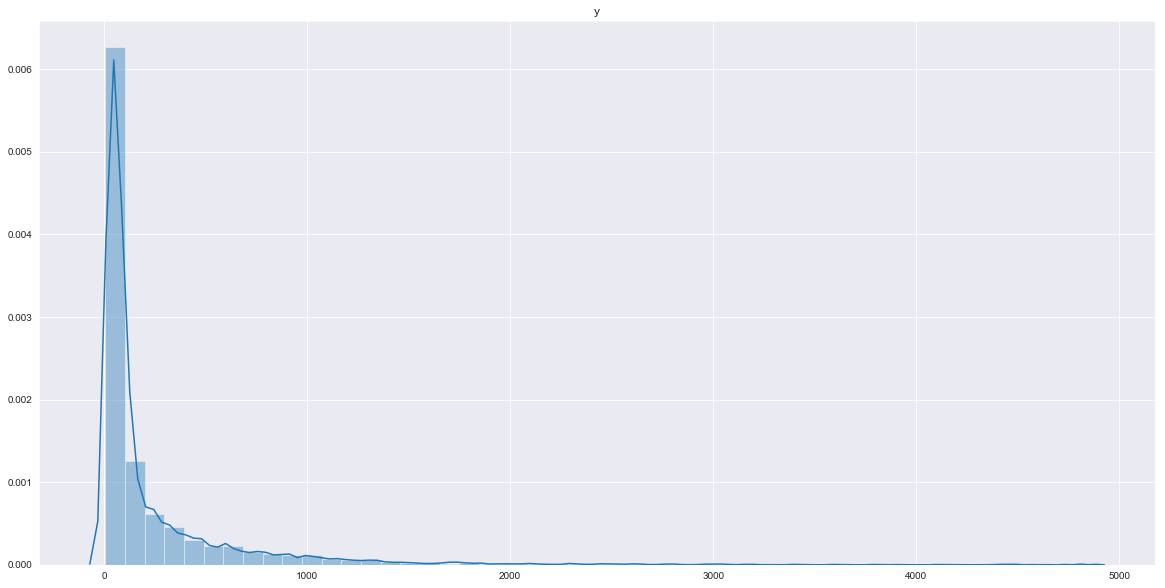

In [32]:
dataframe_distributions(df_ngk,'ngk\\')

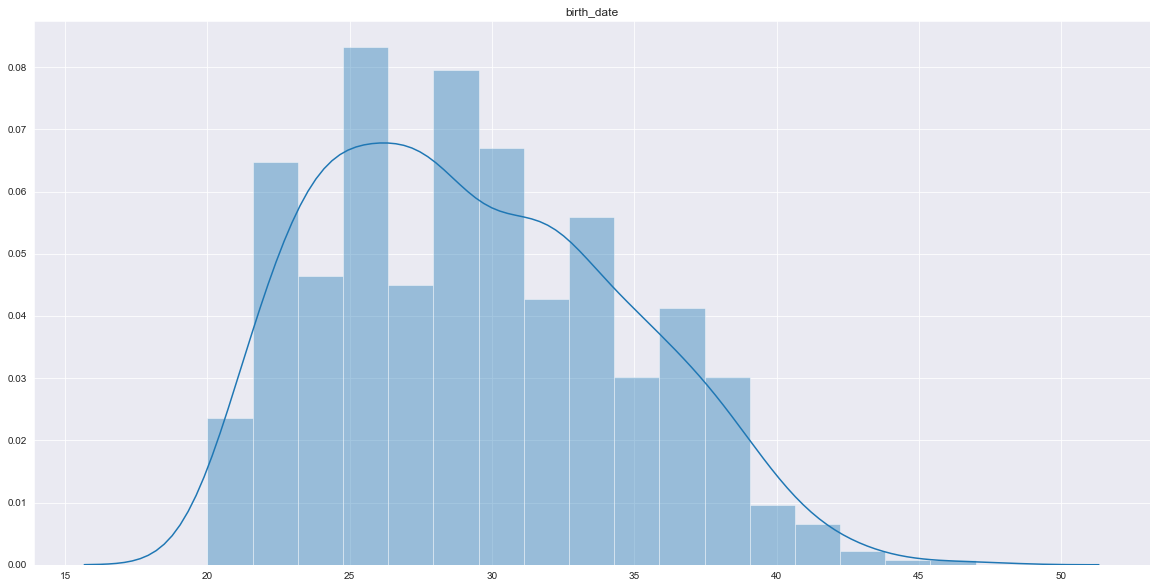

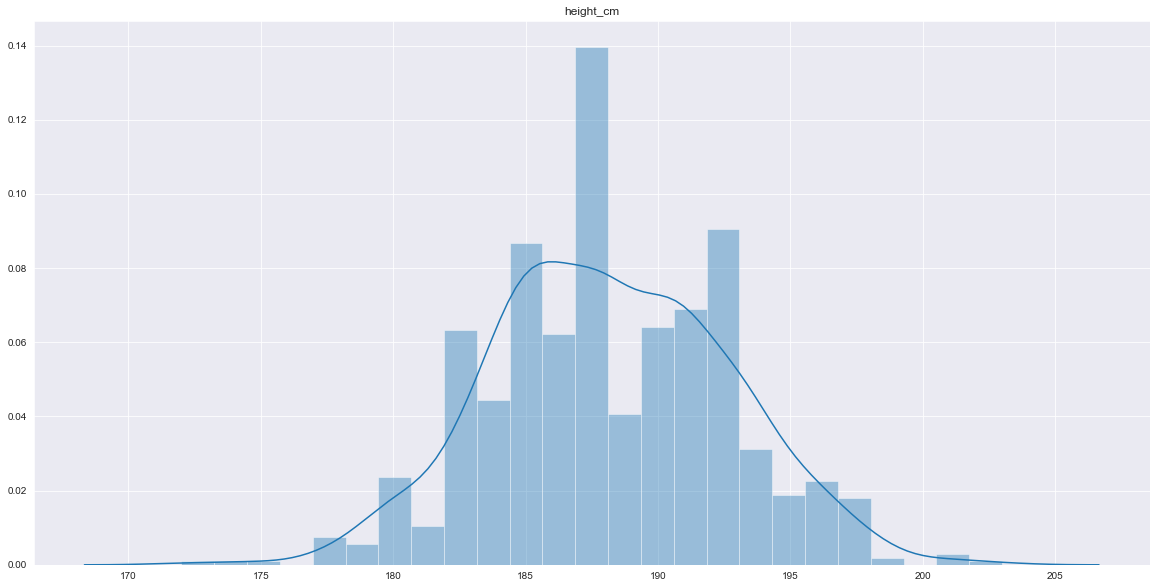

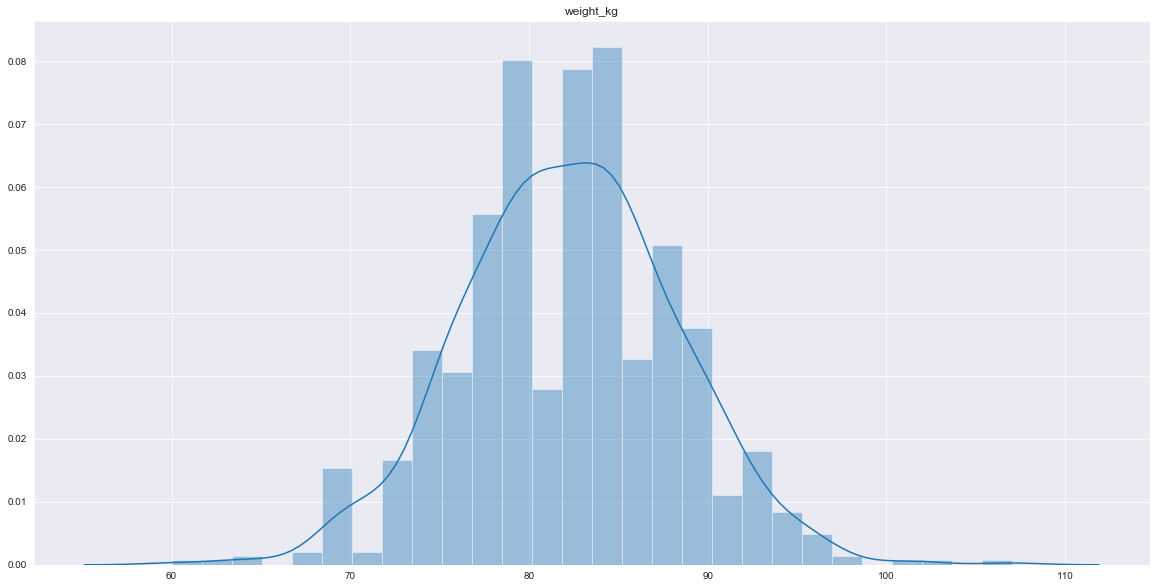

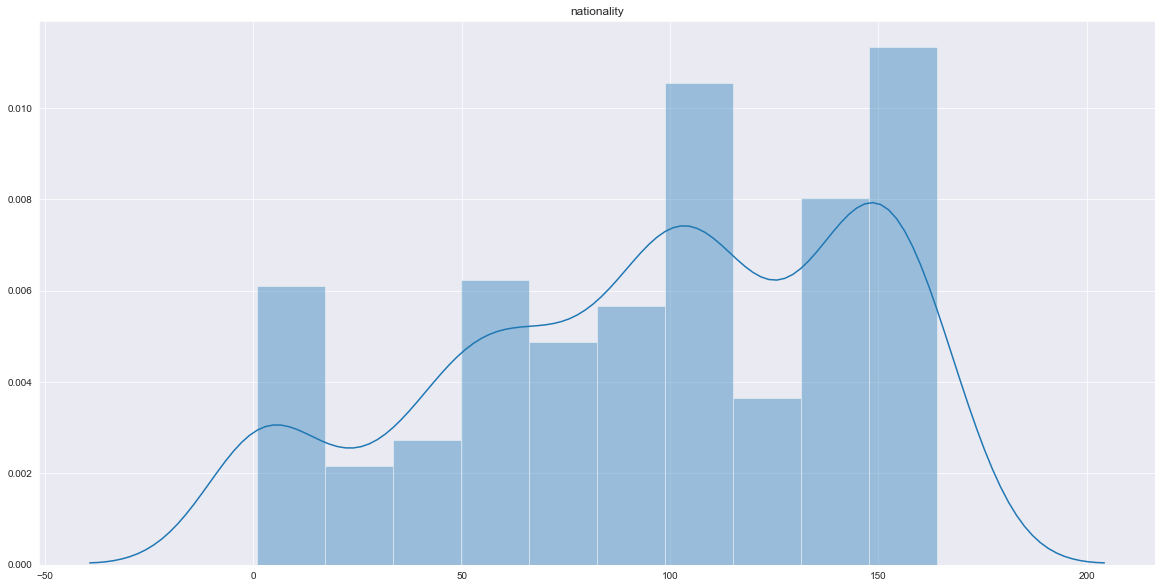

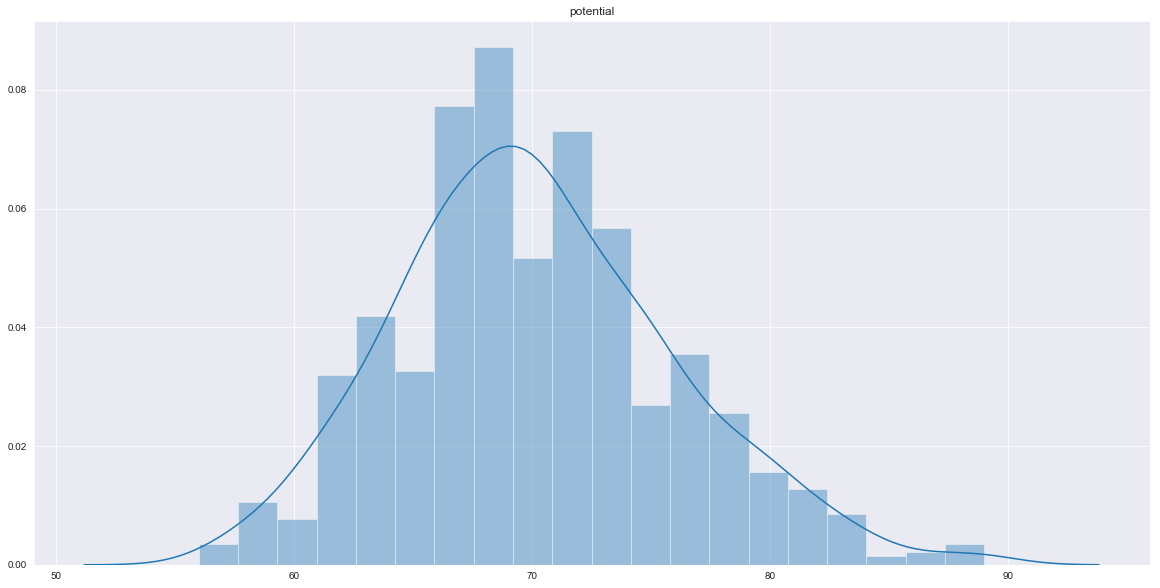

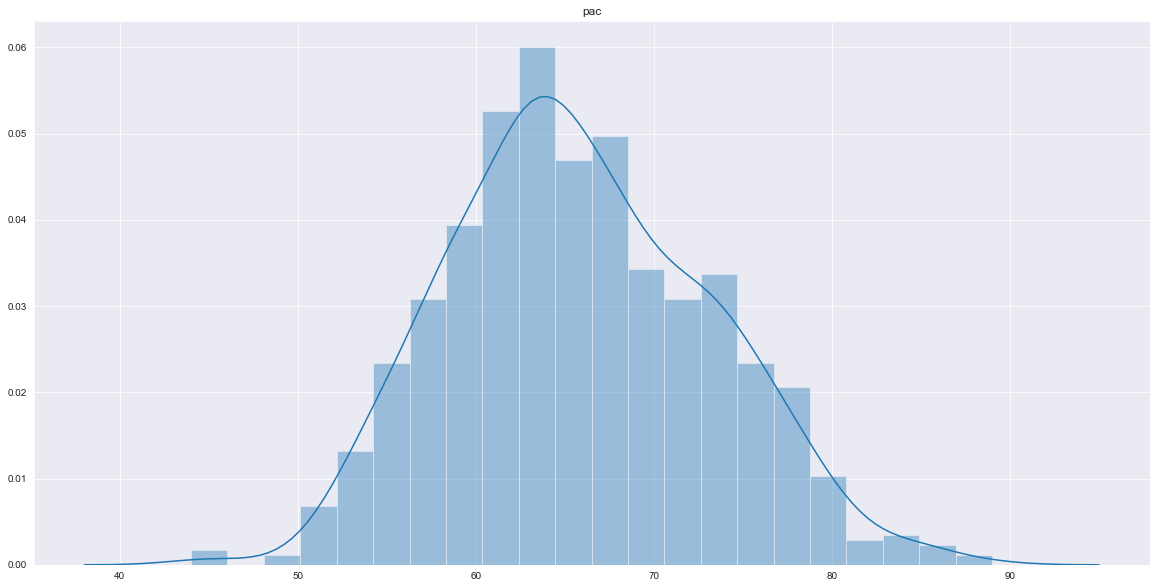

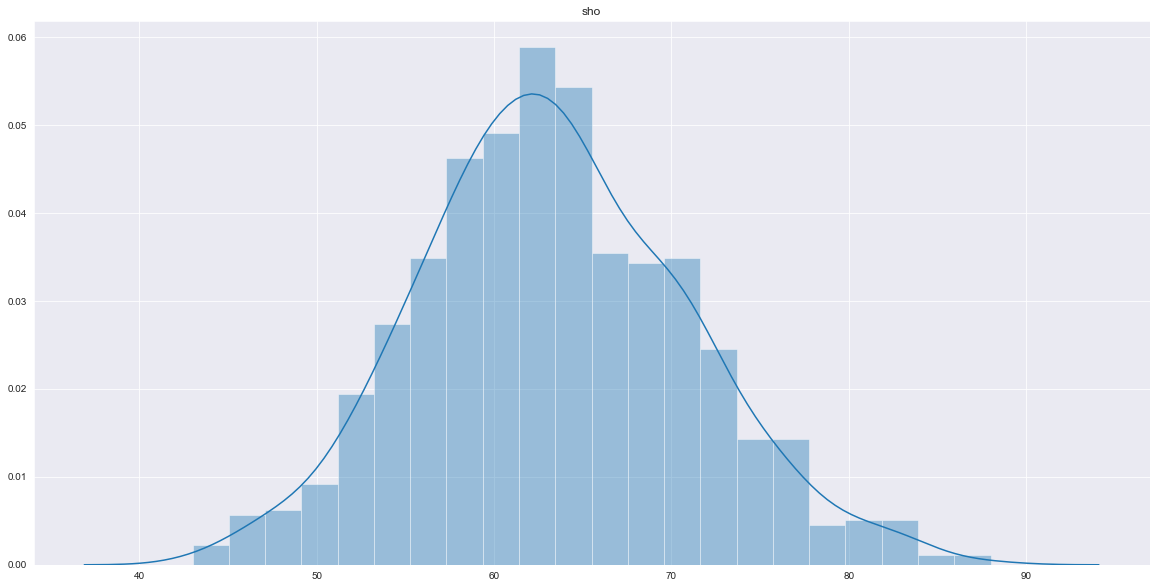

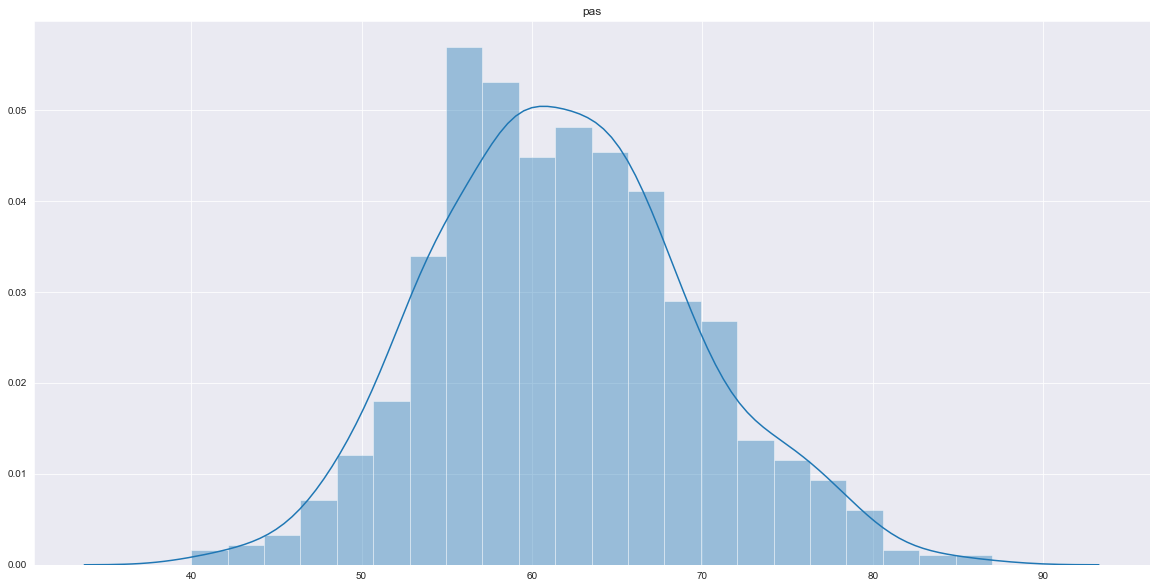

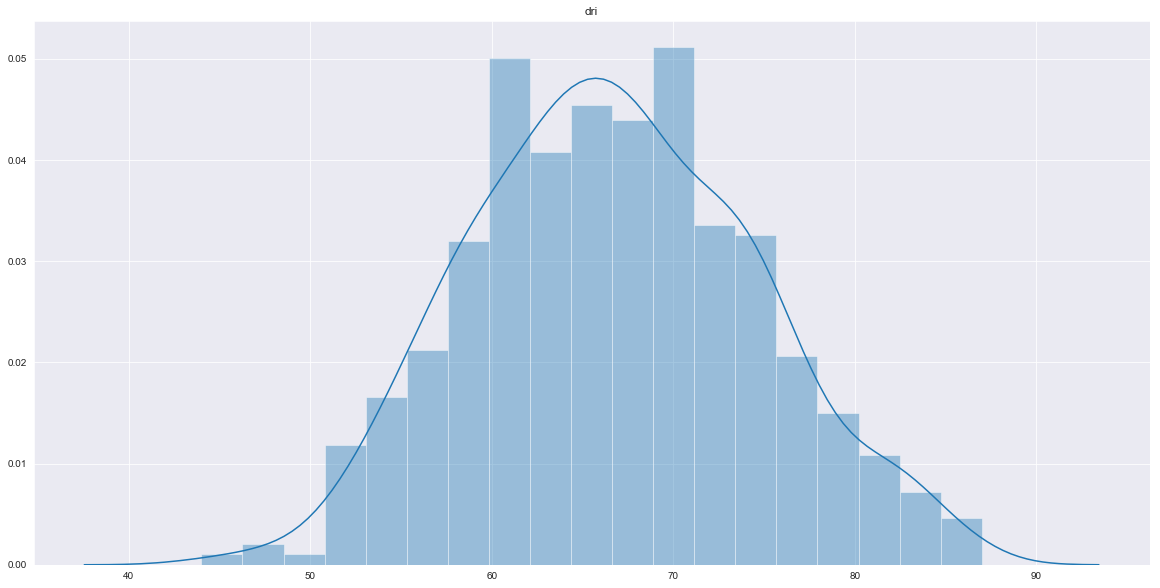

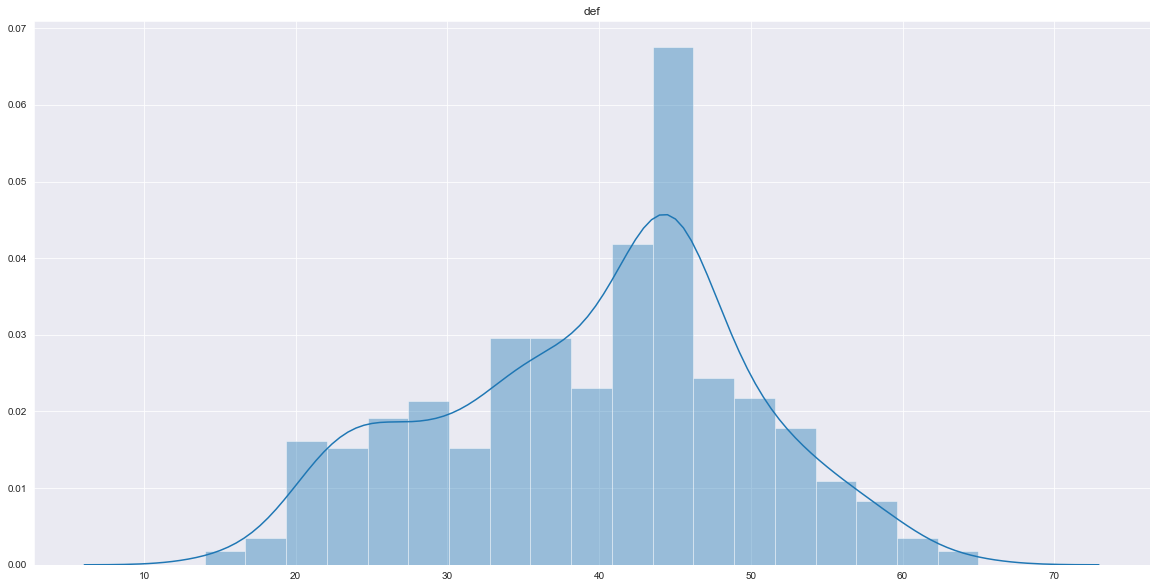

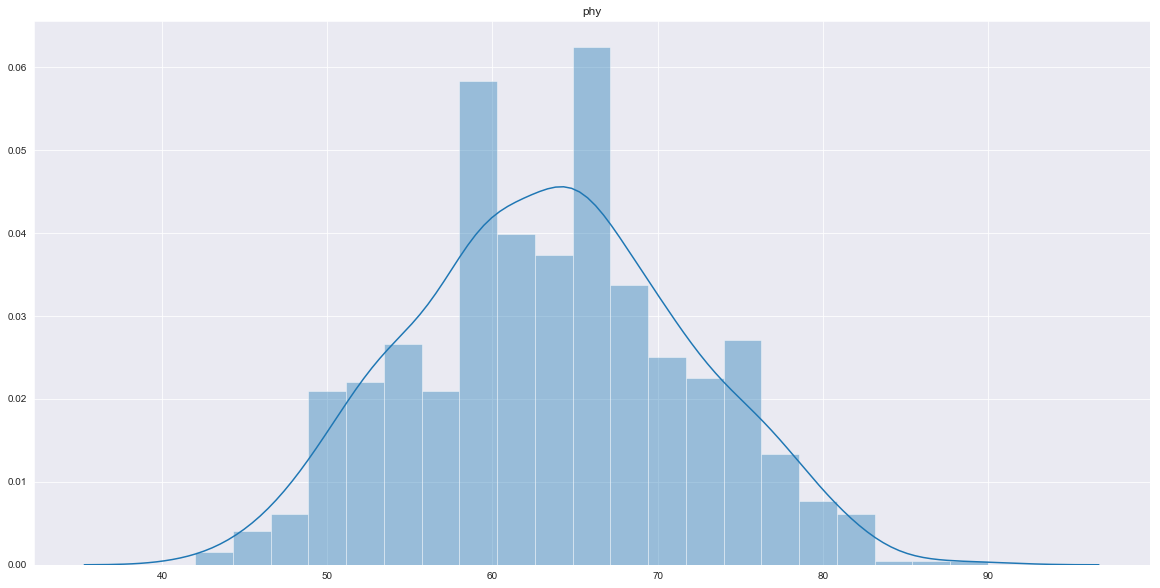

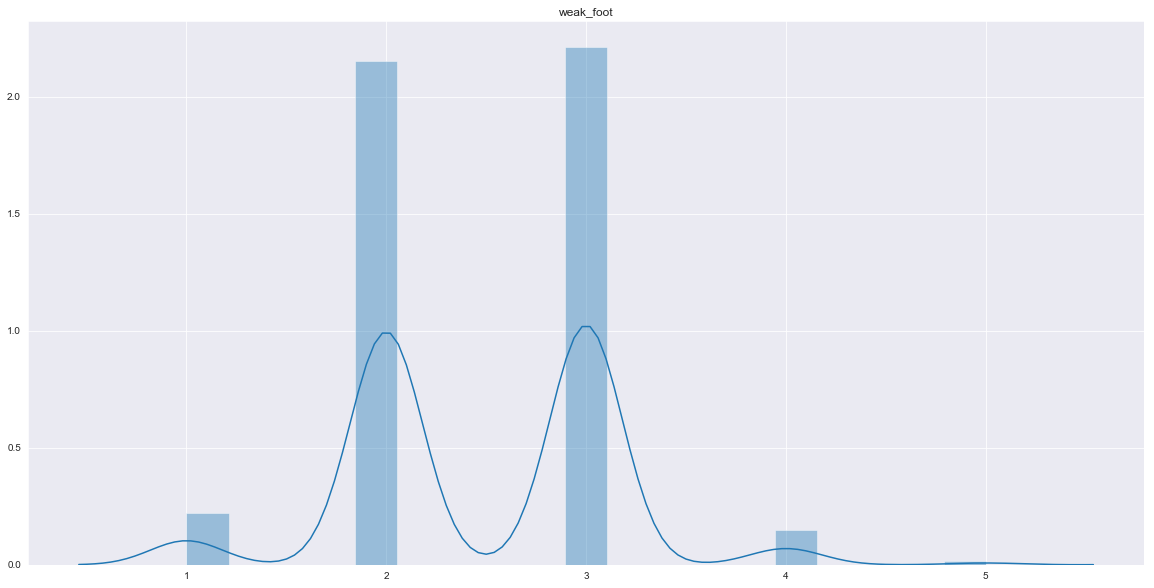

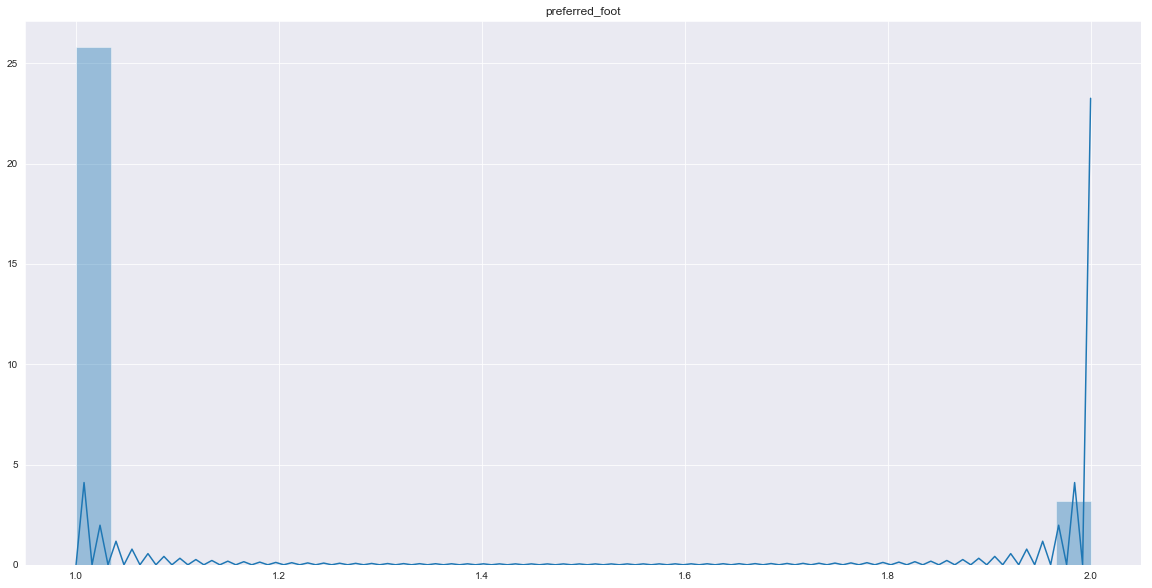

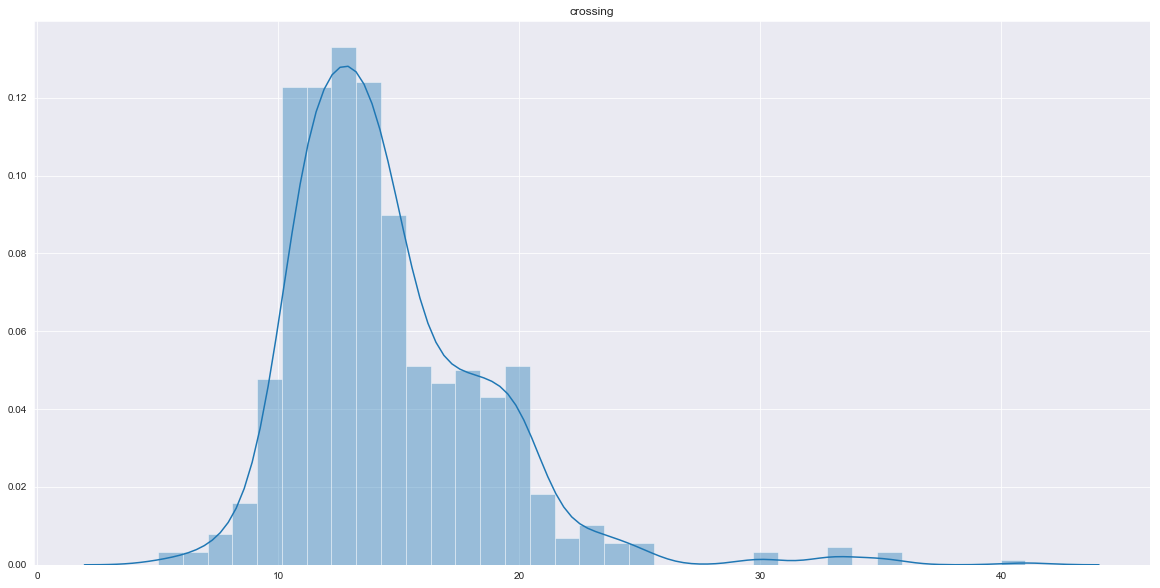

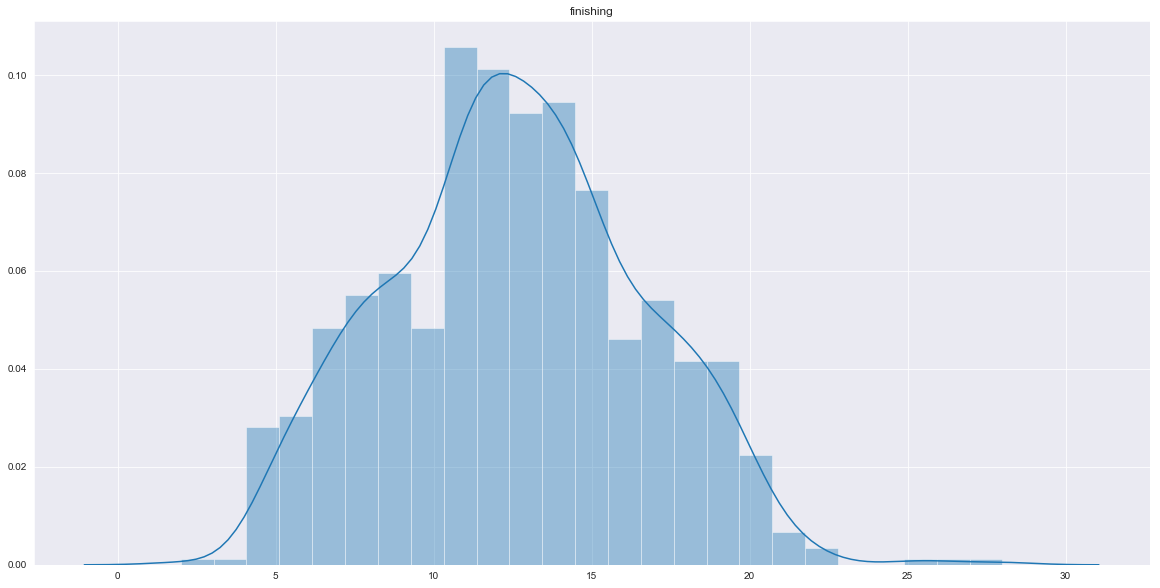

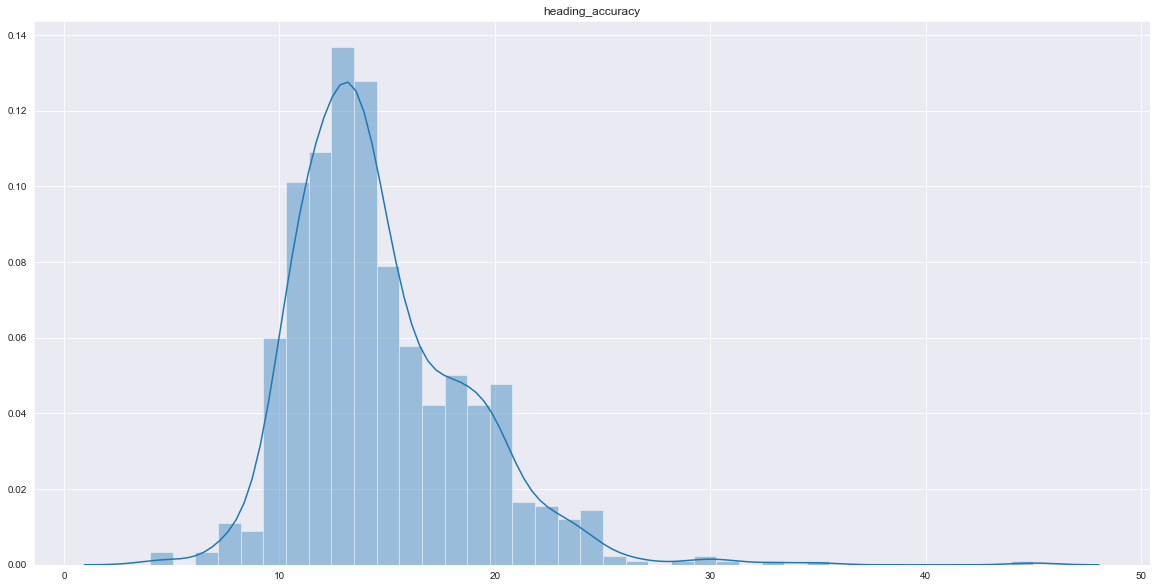

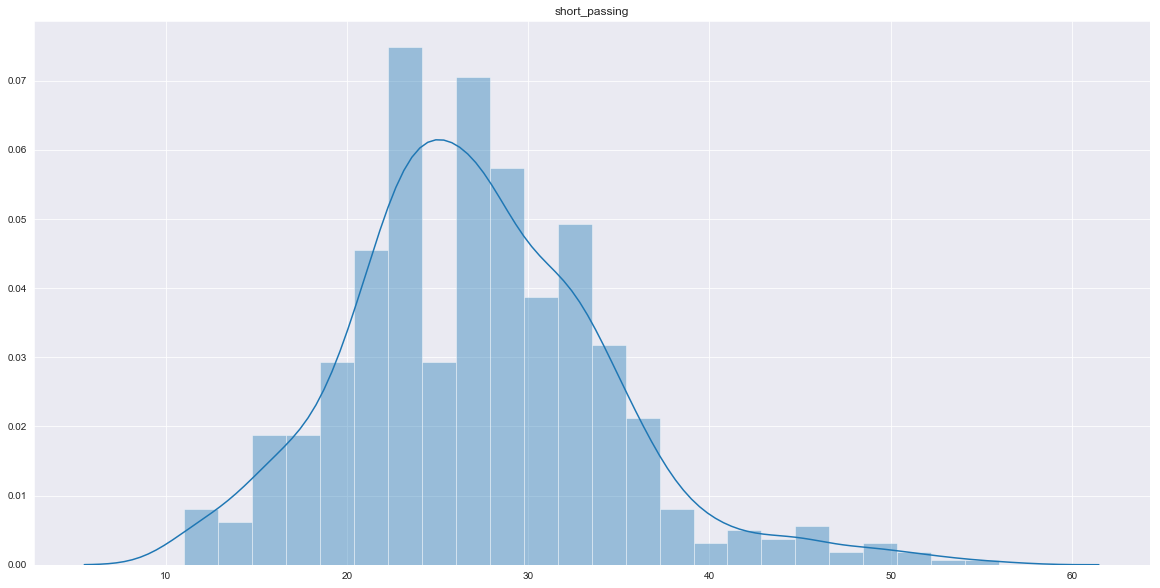

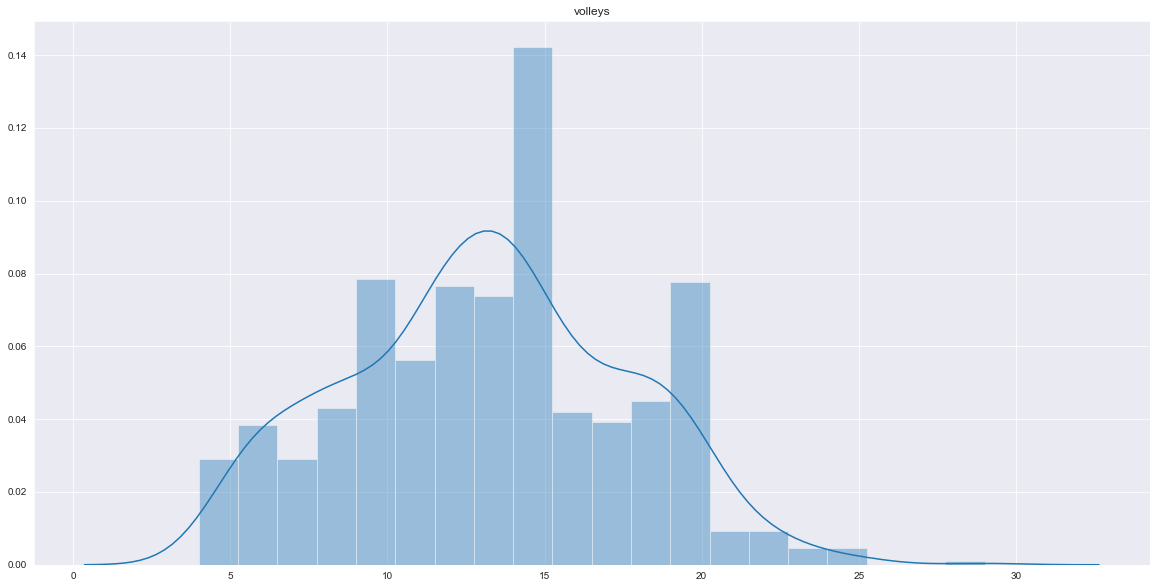

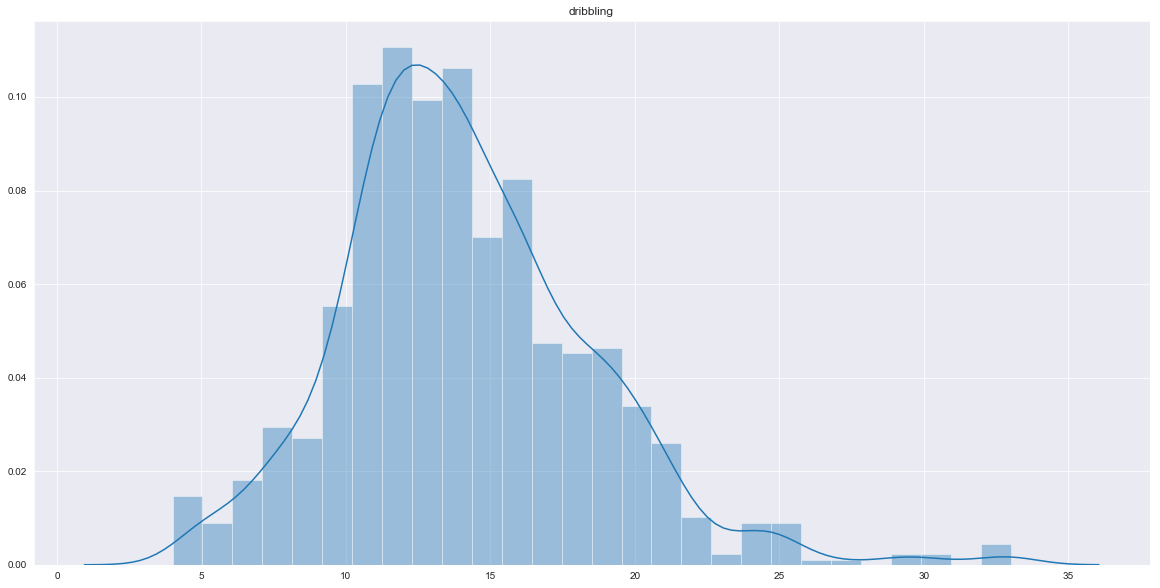

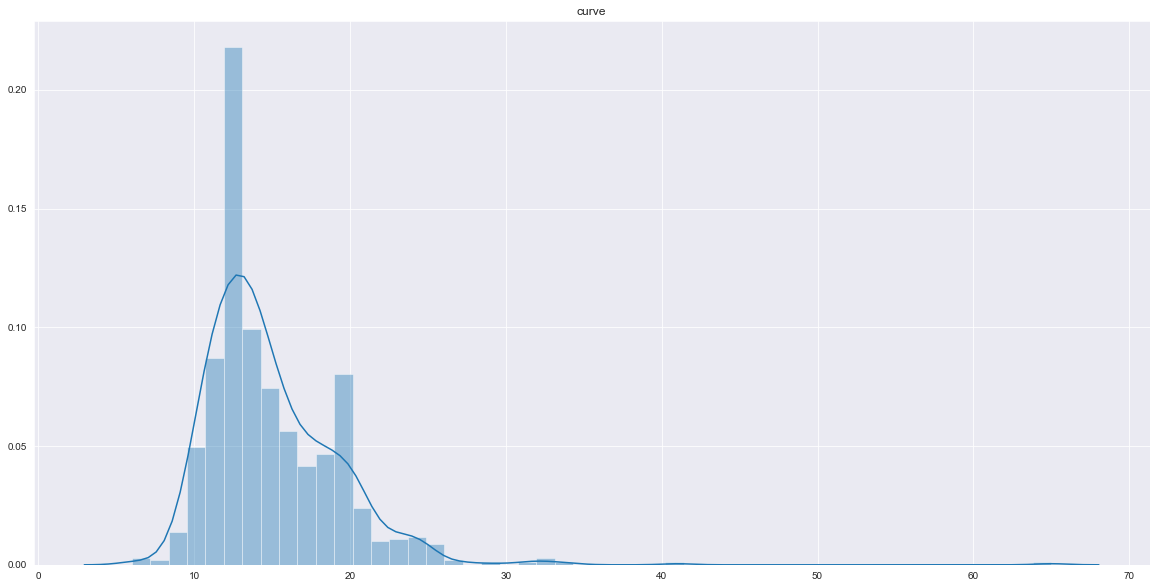

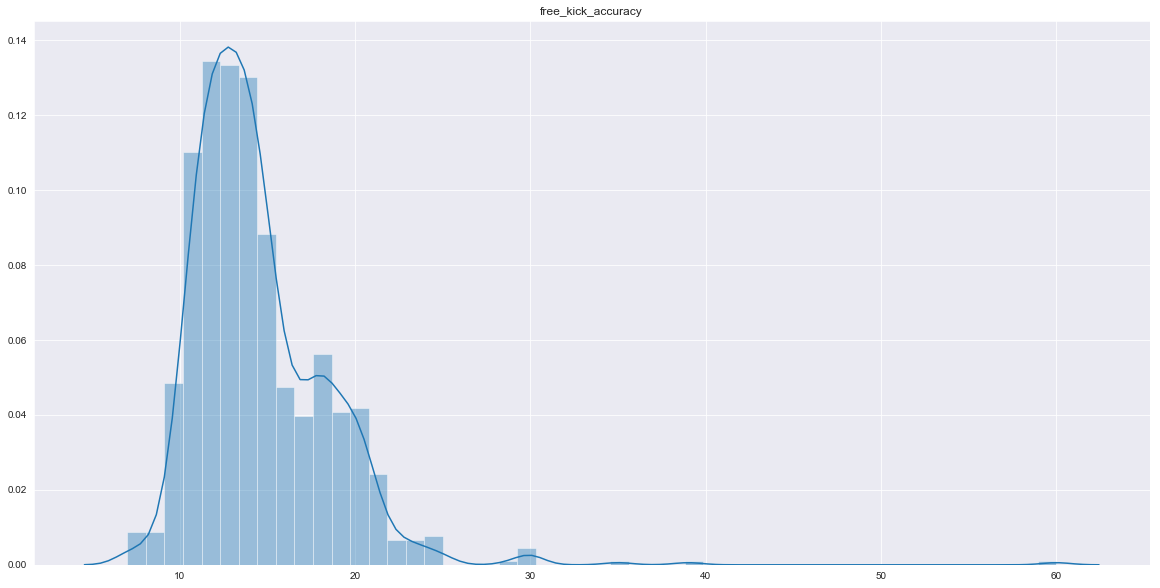

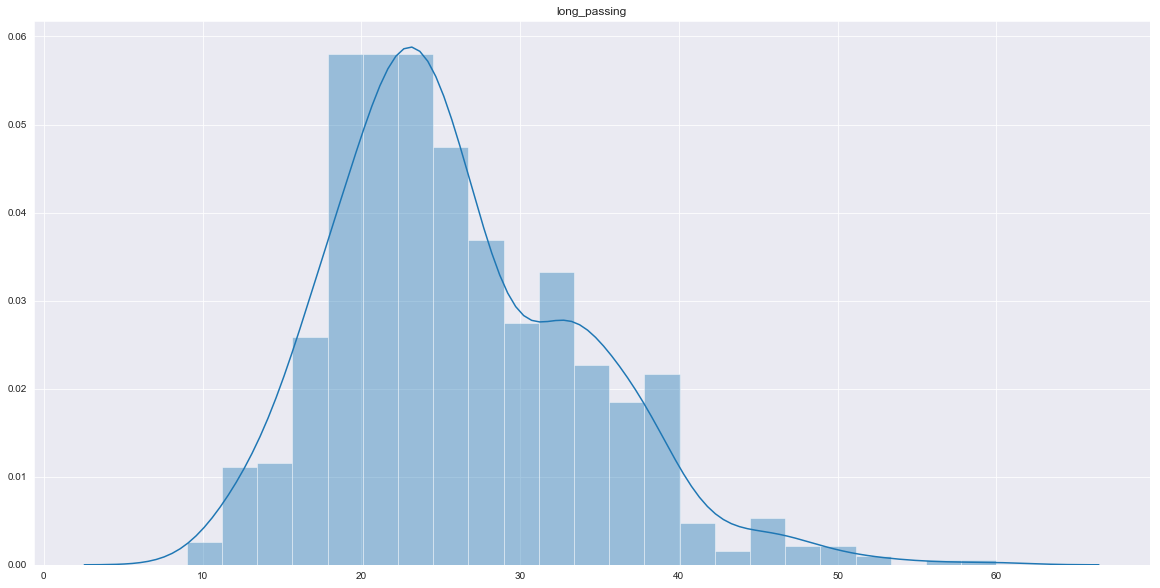

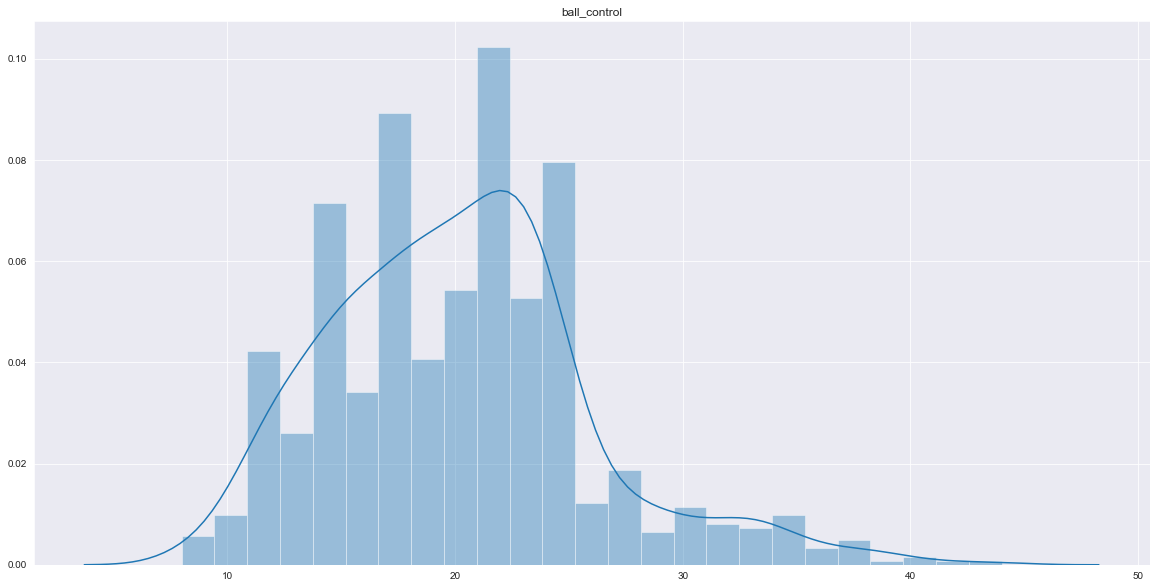

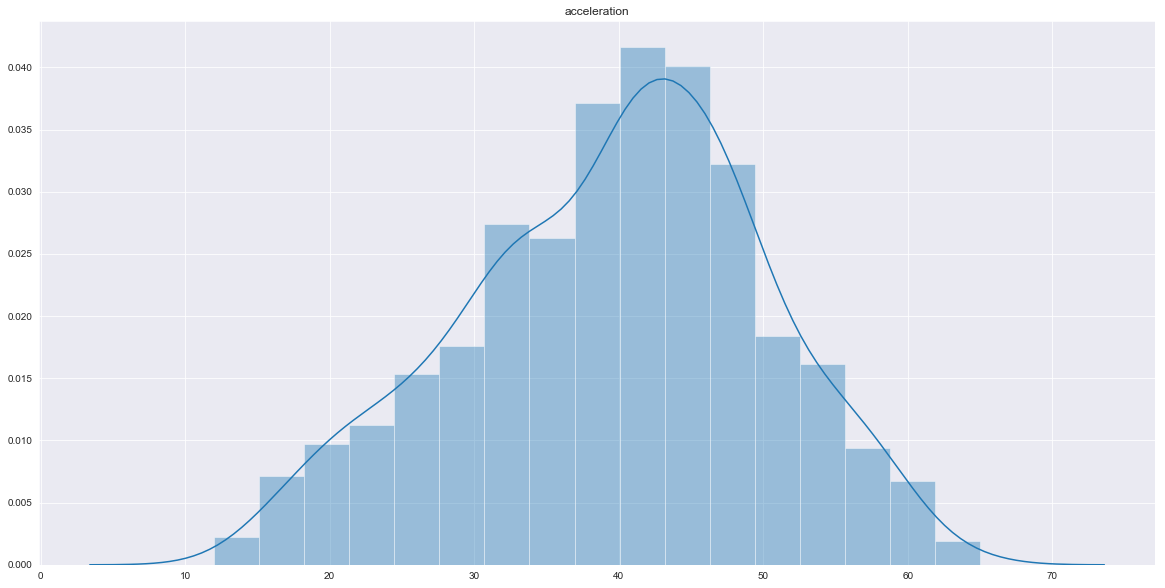

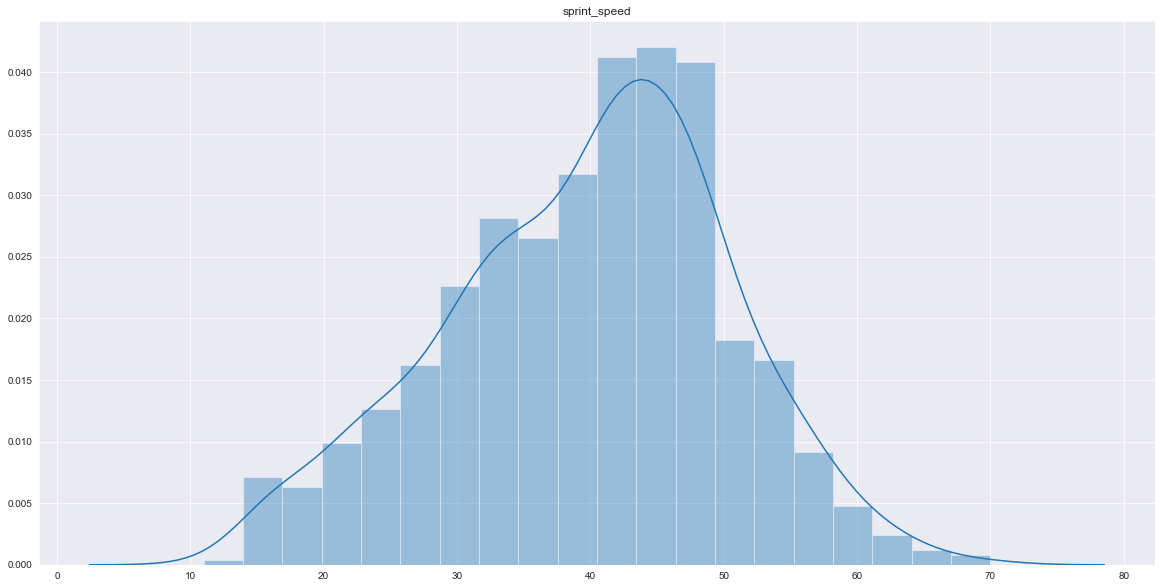

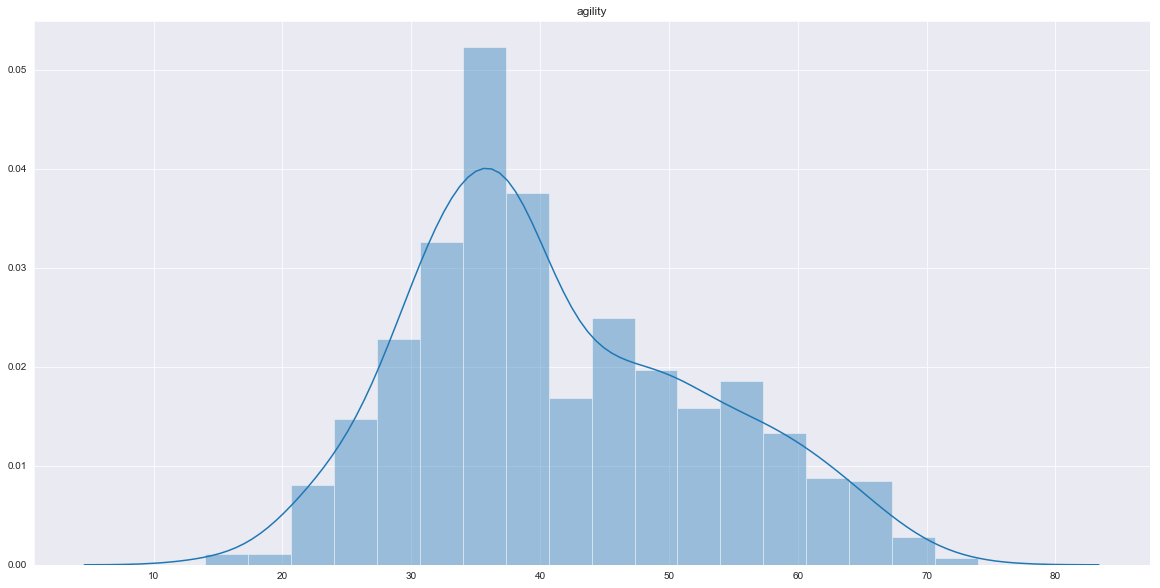

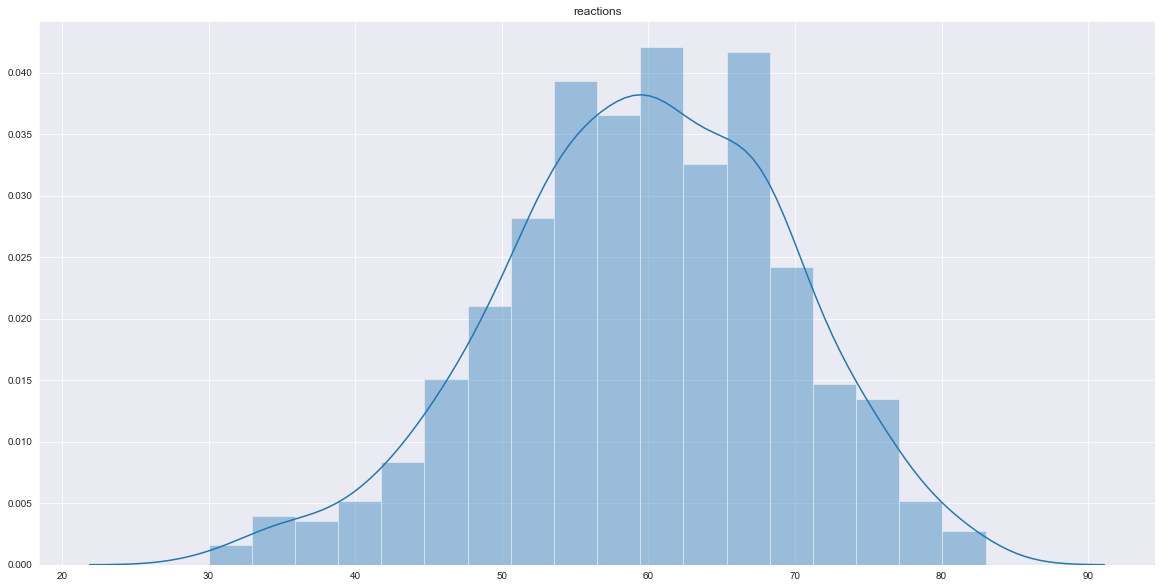

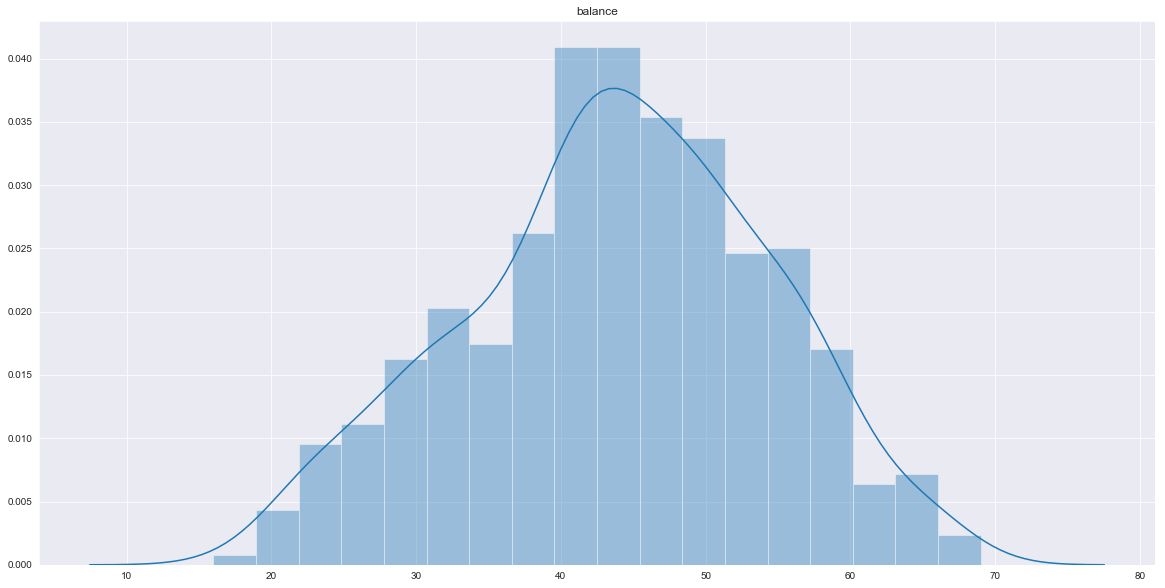

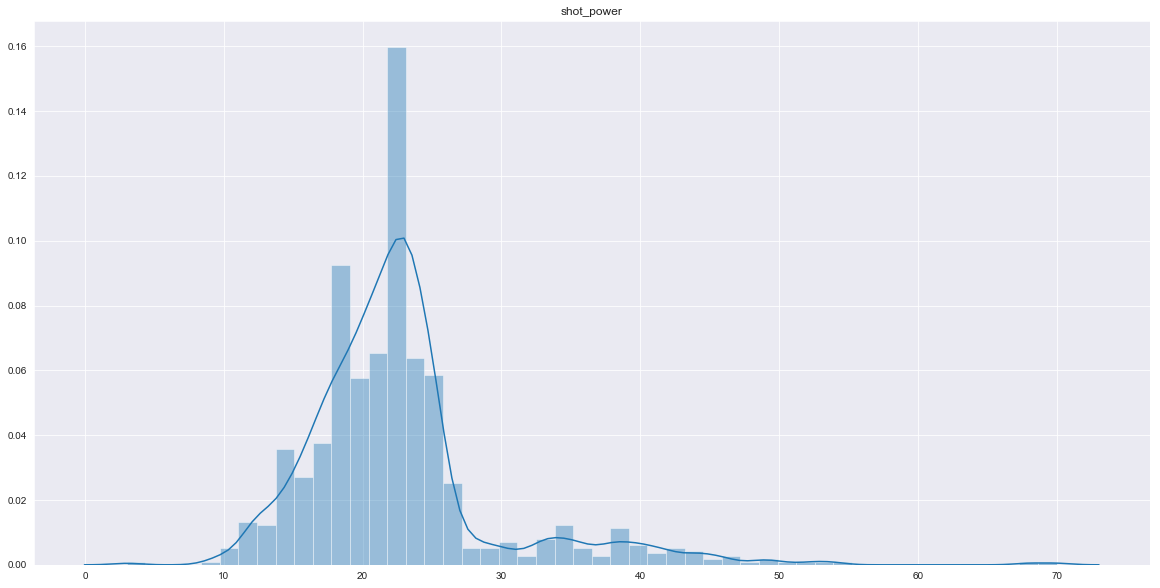

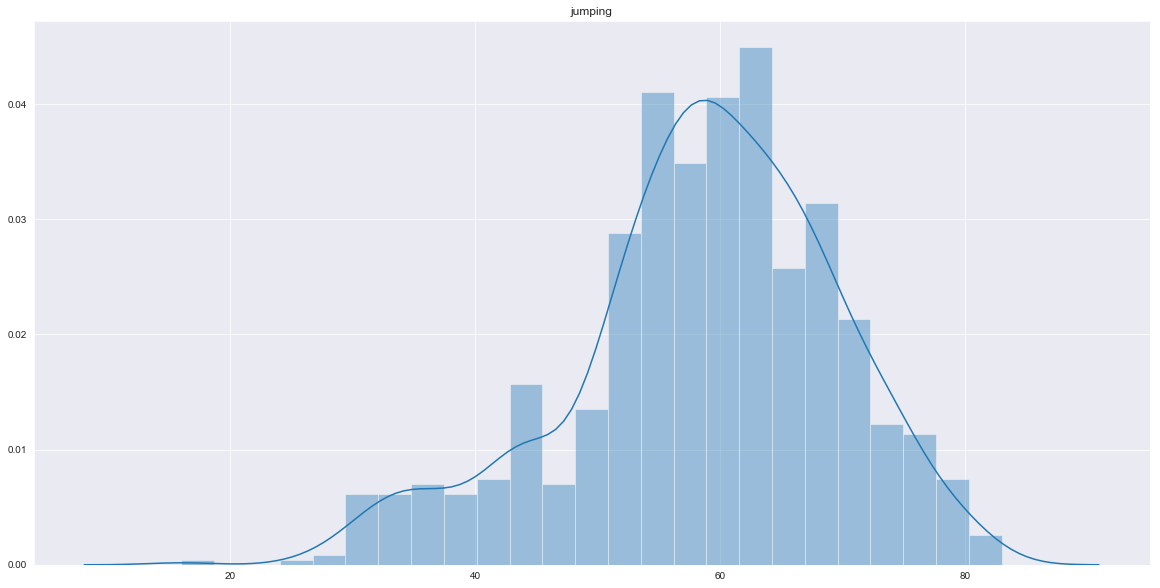

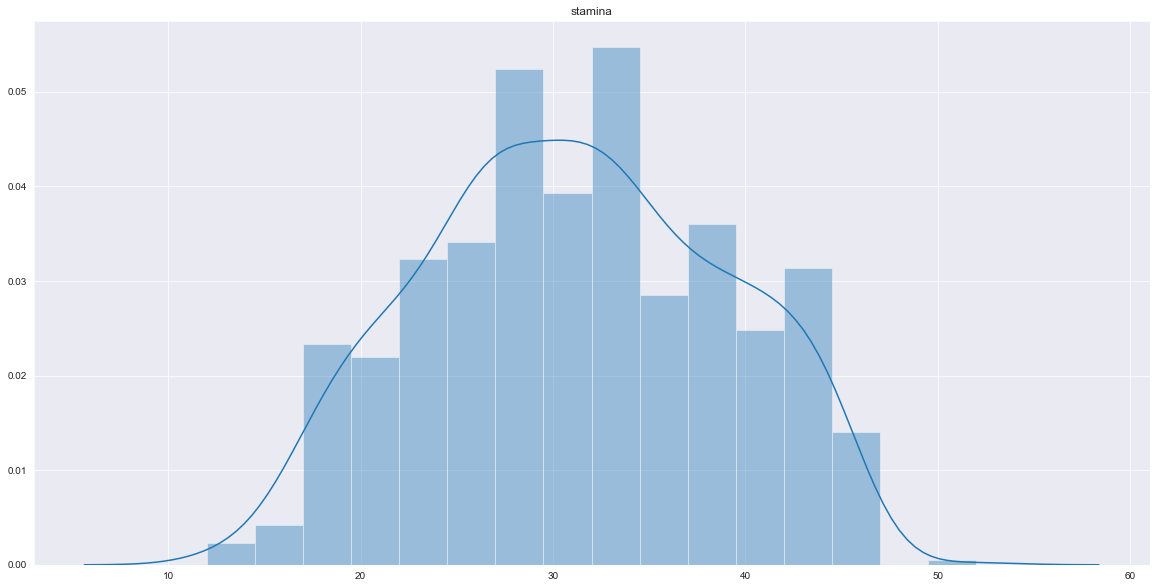

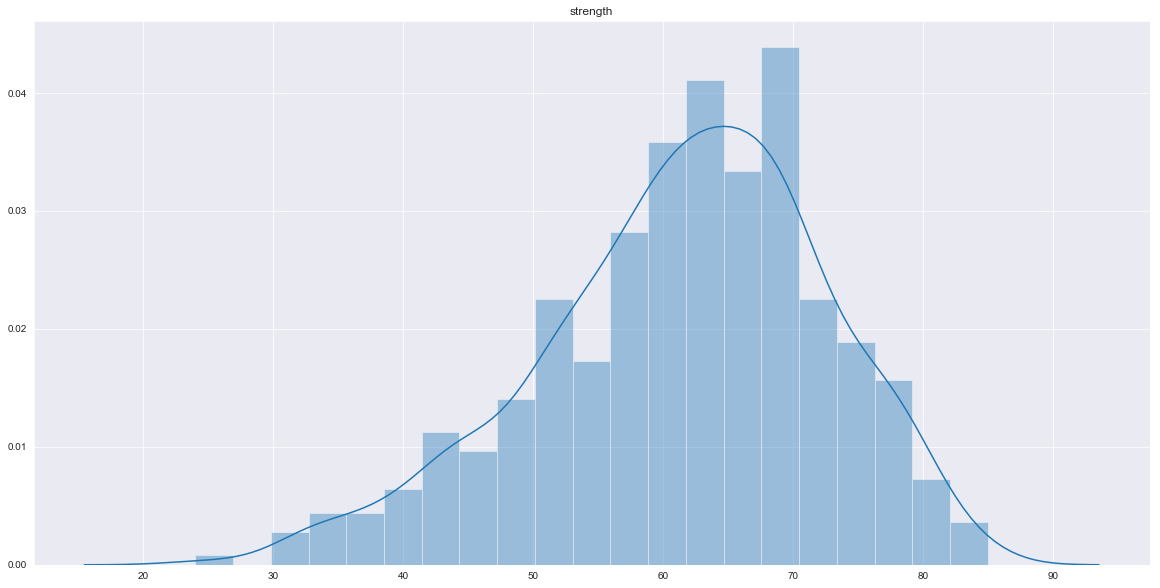

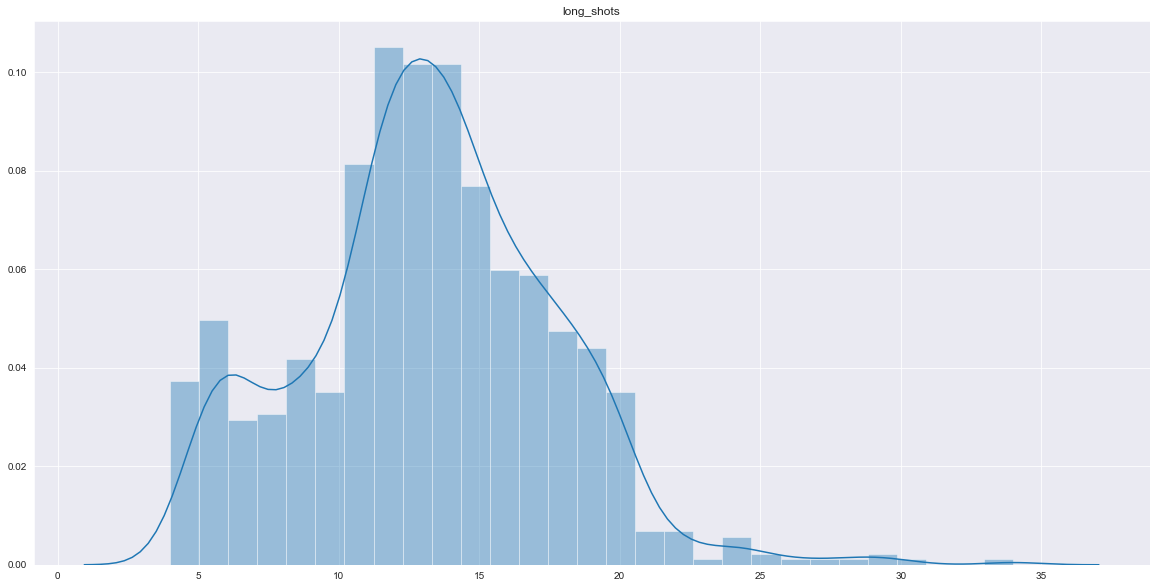

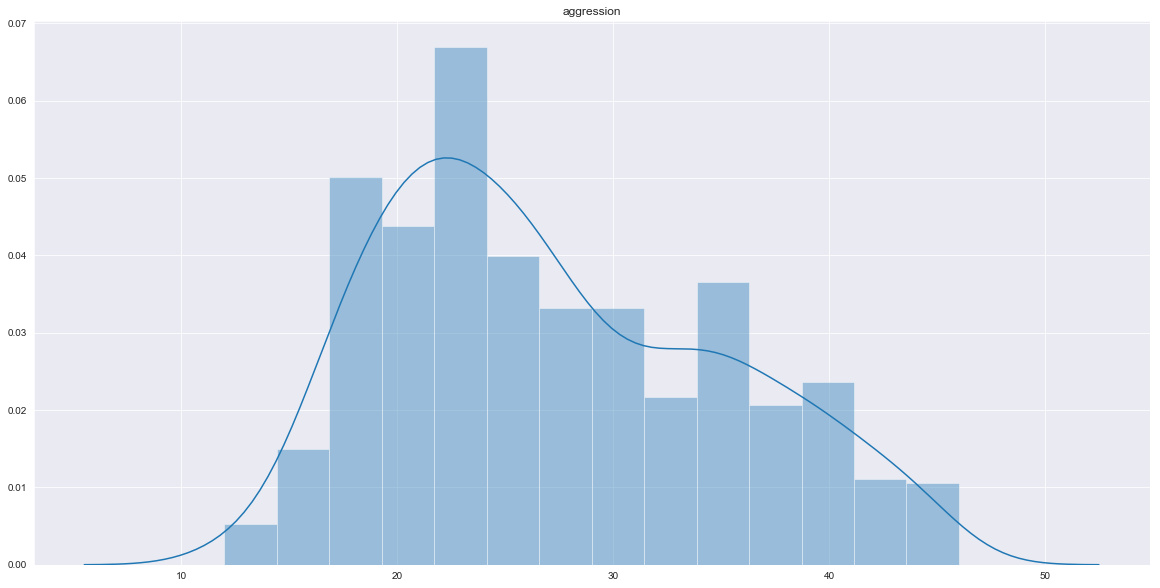

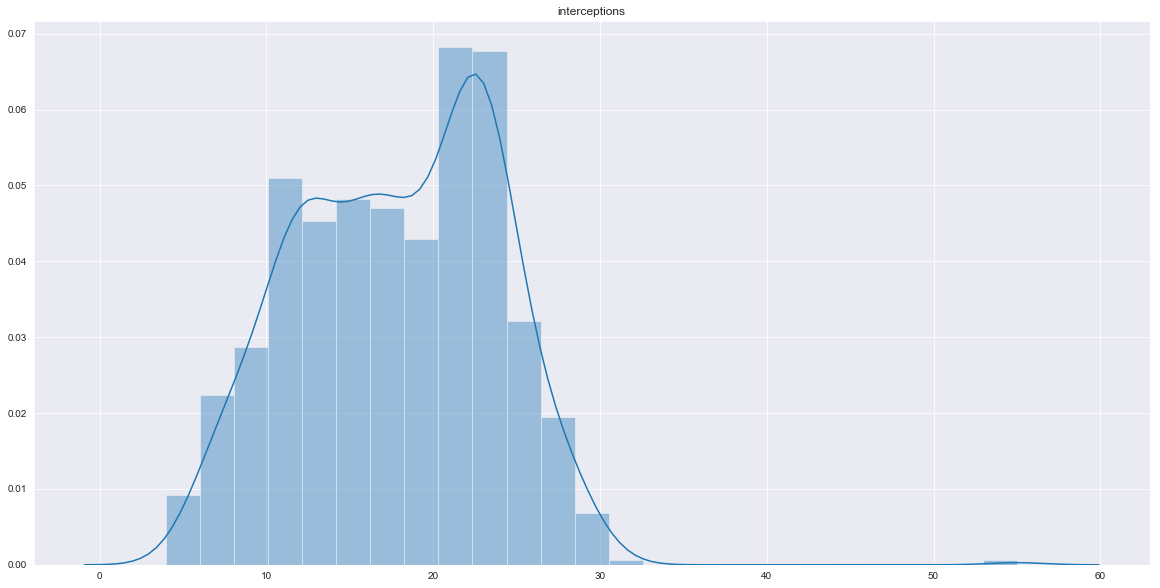

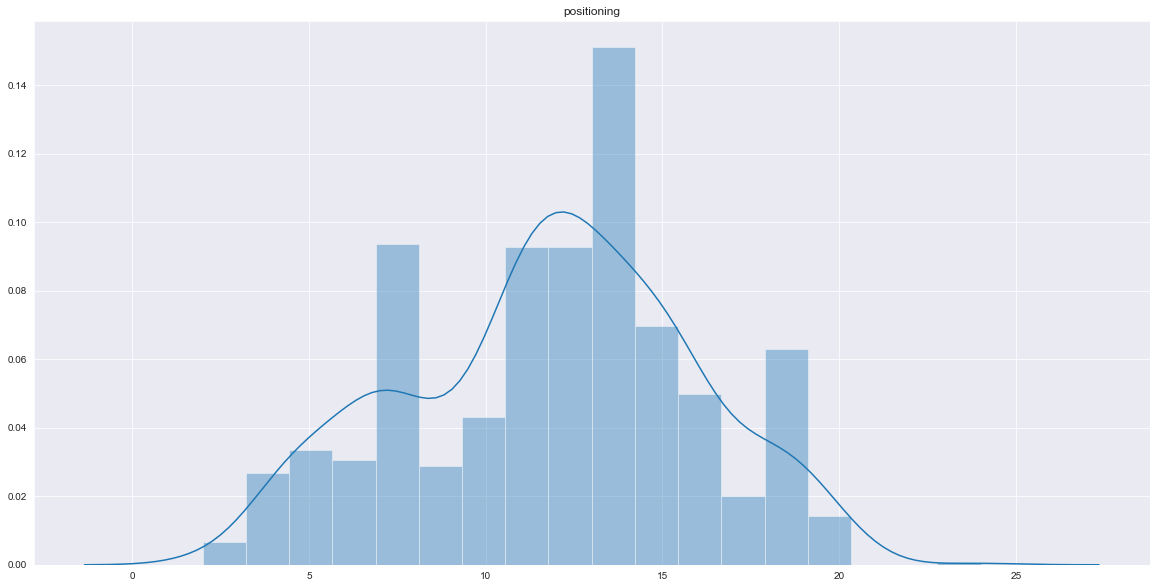

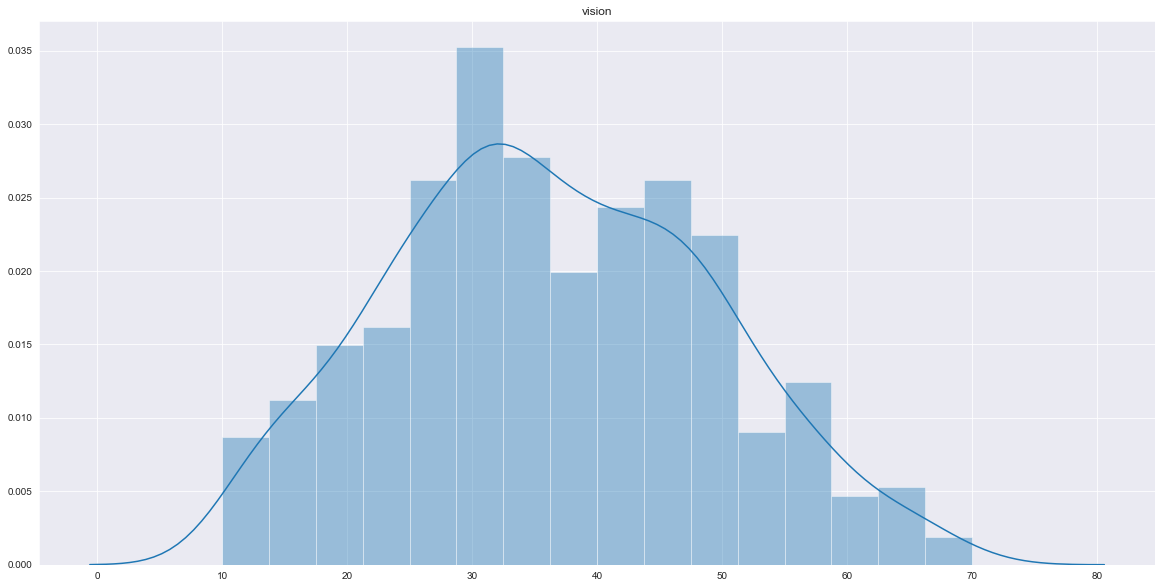

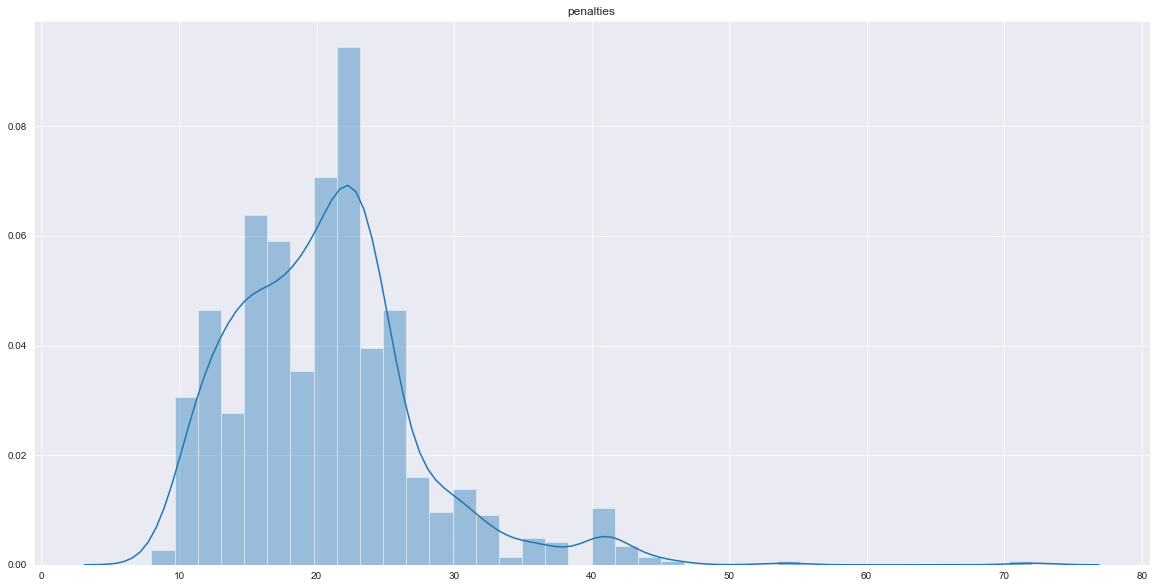

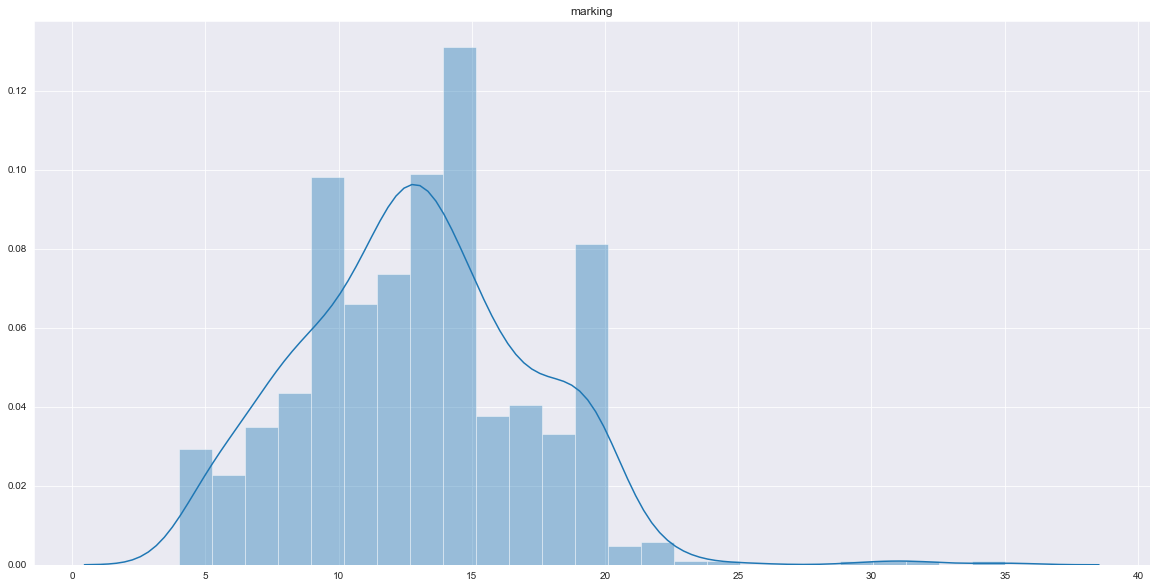

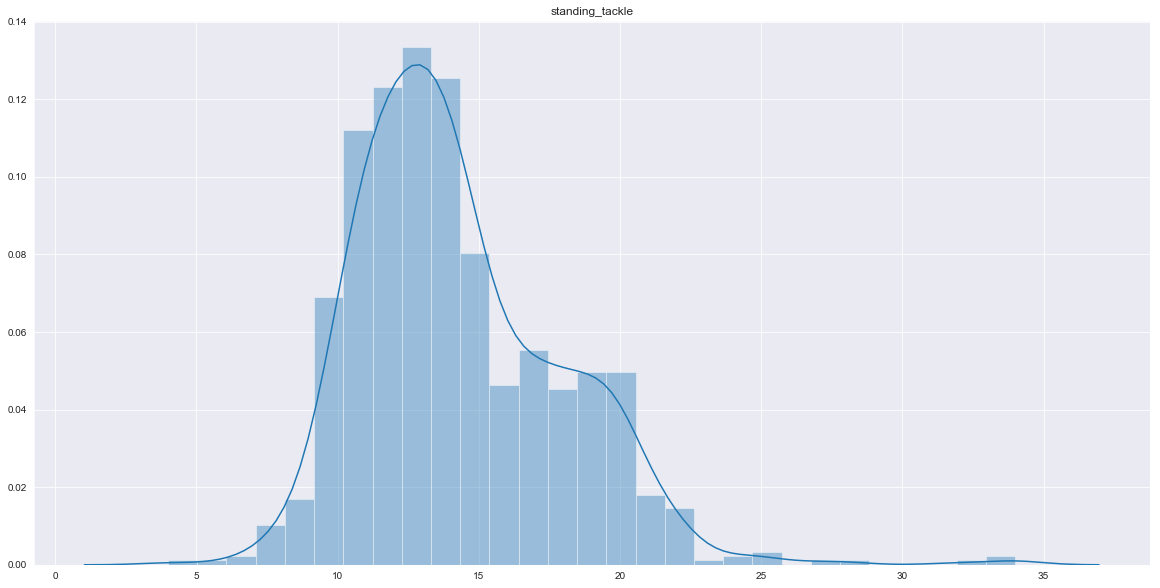

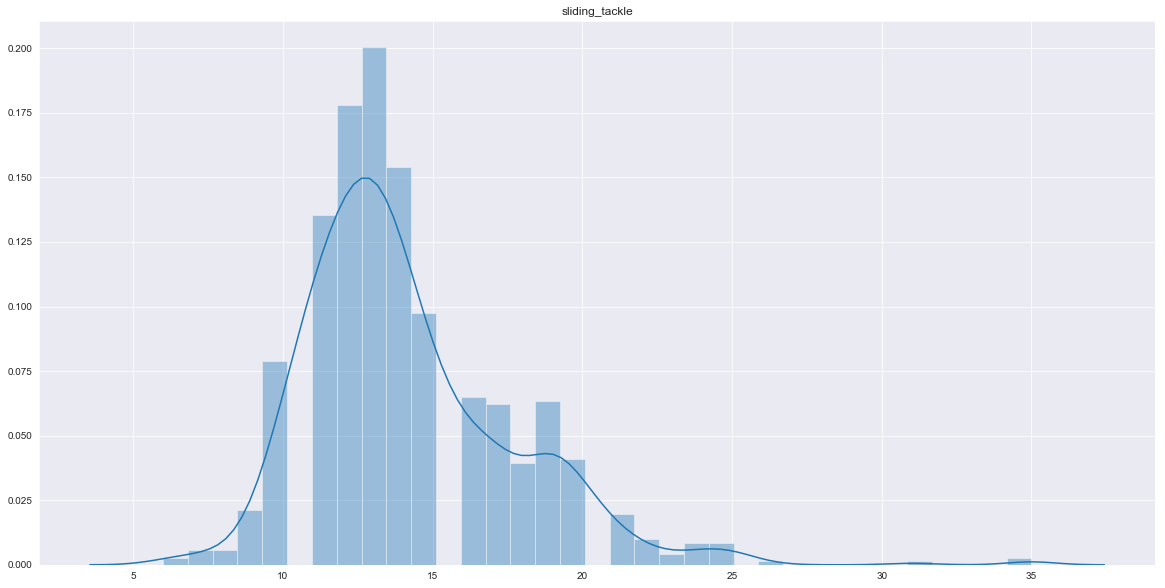

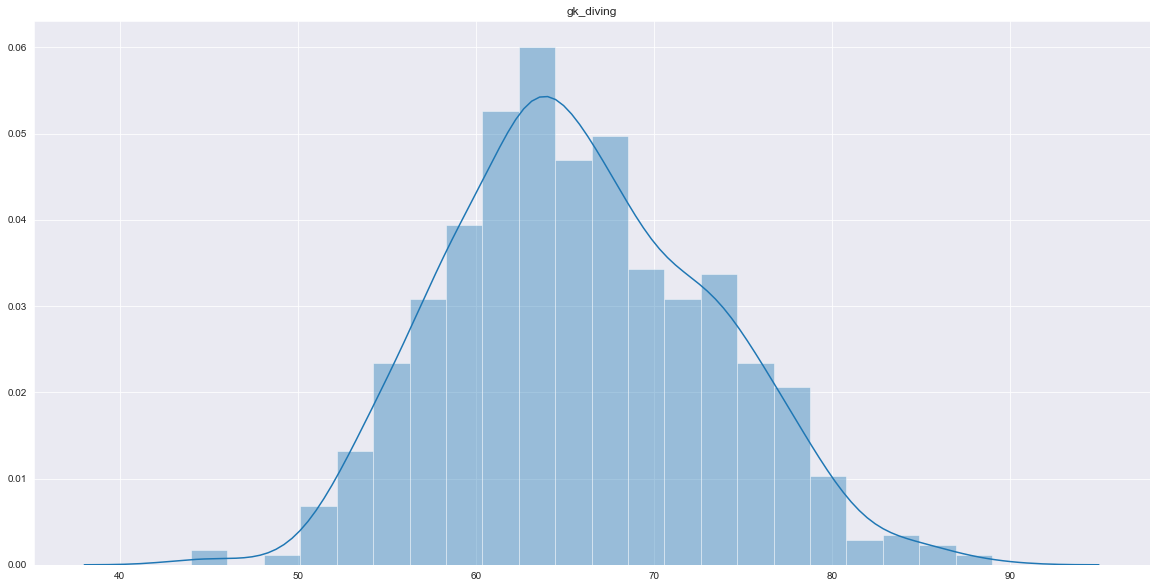

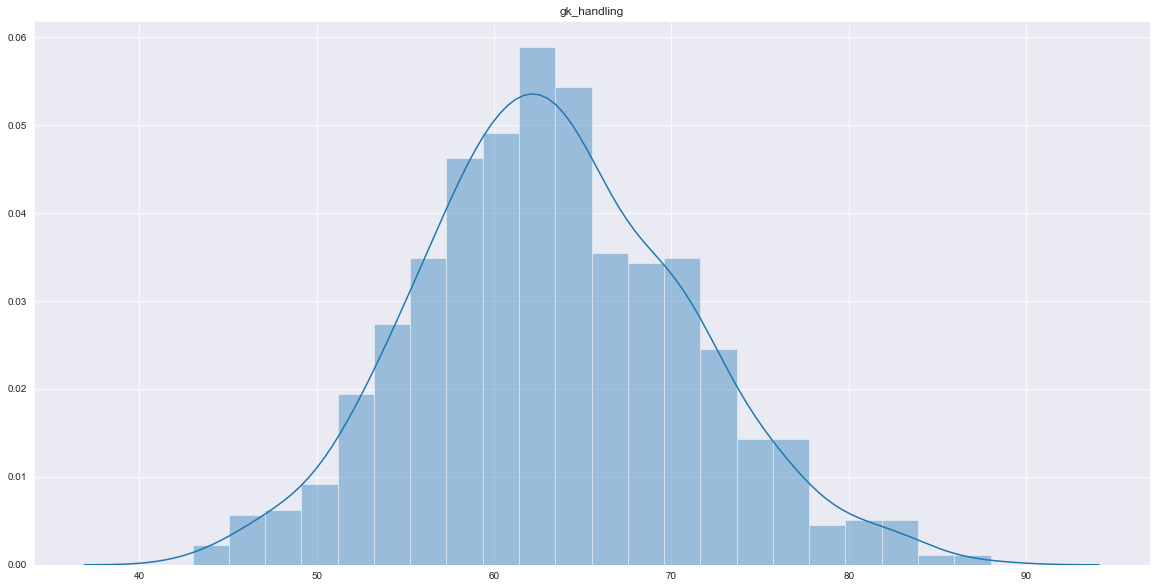

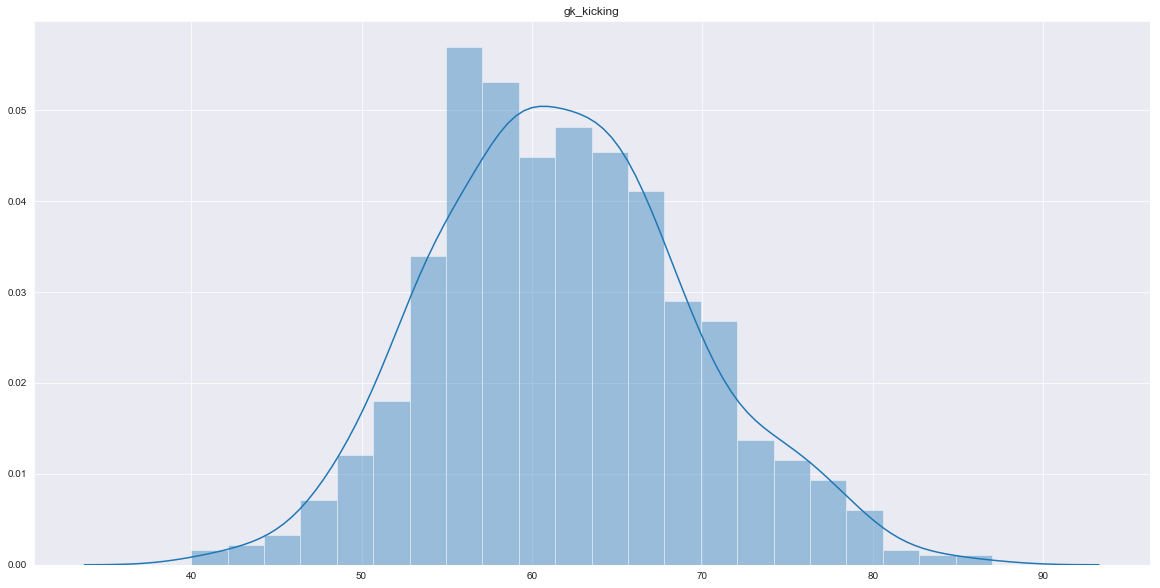

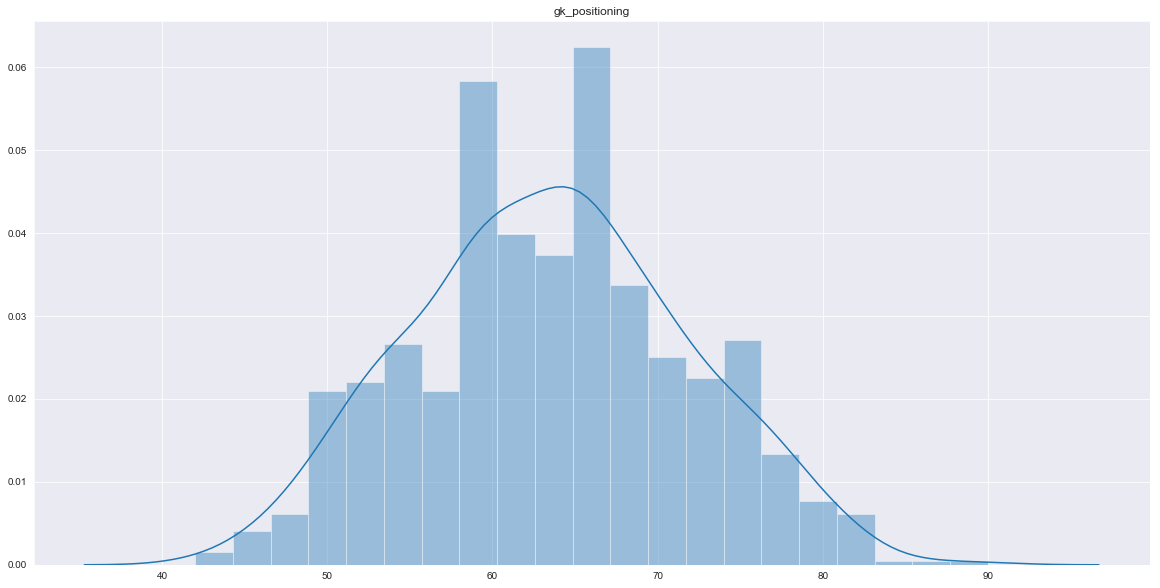

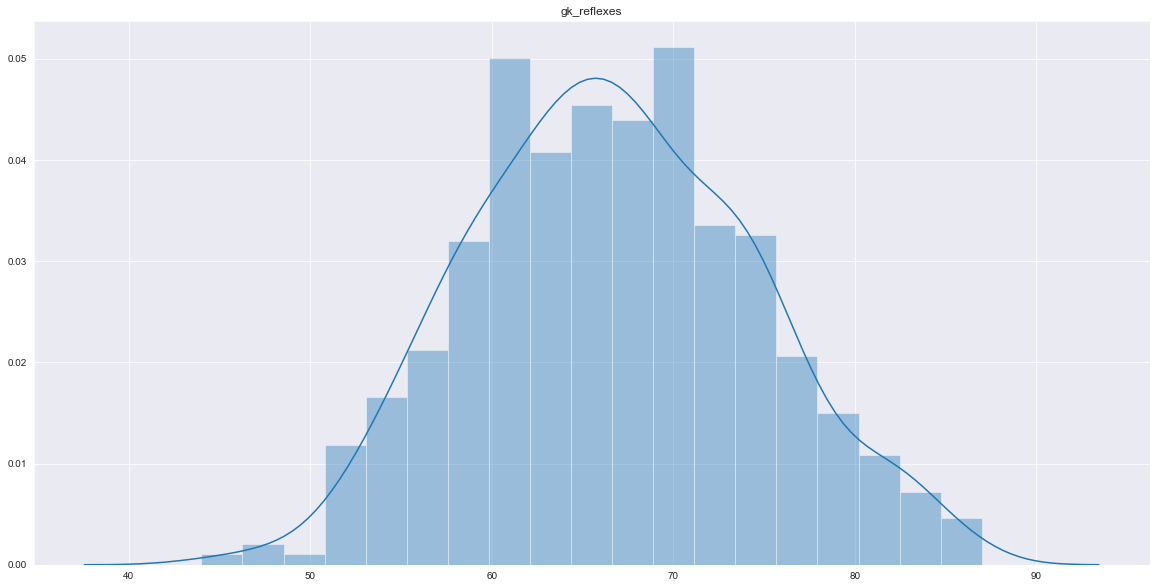

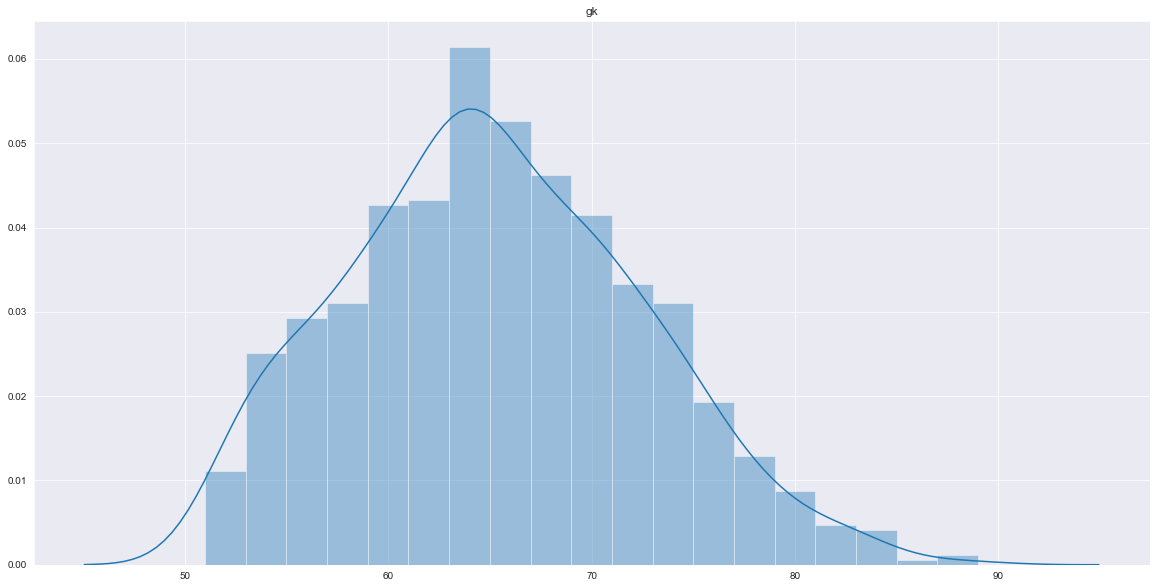

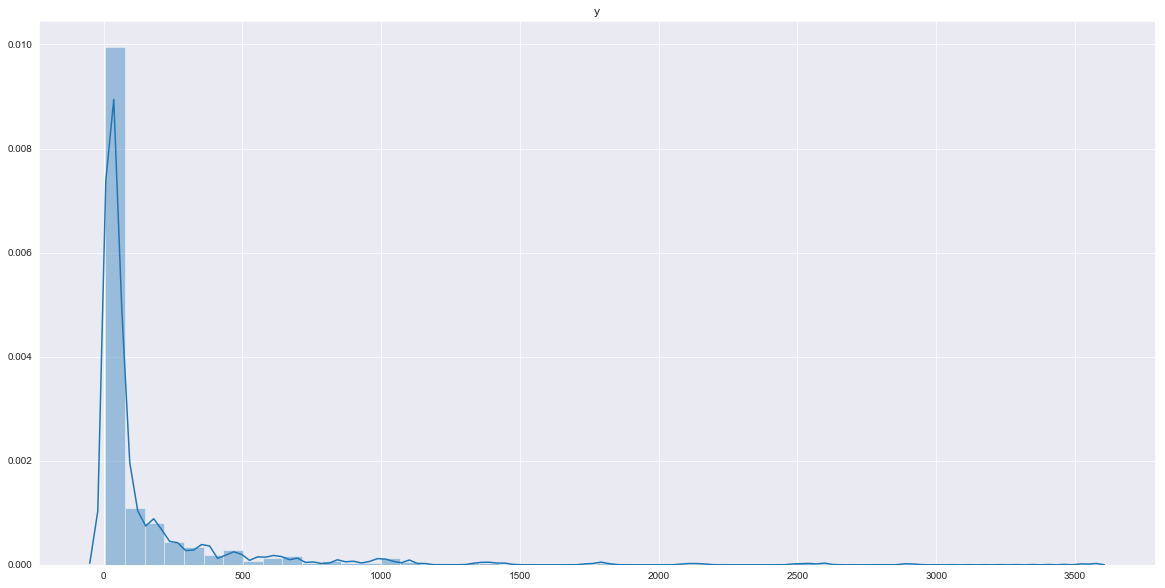

In [33]:
dataframe_distributions(df_gk,'gk\\')